In [1]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend as K
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.preprocessing import image

import pandas as pd
from keras.applications.vgg16 import decode_predictions

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, MaxPool2D, Lambda
from keras.applications.vgg16 import VGG16

import tensorflow.keras.layers

K.clear_session ()

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", name="conv2_2"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name="conv2_4"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name="conv2_7"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv2_10"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name="conv2_13"))
#model.add(Lambda(custom_layer_last, name="lambda_layer_last"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), name="last_max_pool"))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000, activation="softmax", name="predictions"))

print("Model created")

model.compile(loss='categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
print("Model compile")

VGGmodel = VGG16(weights='imagenet', include_top=True)
model.set_weights(VGGmodel.get_weights())
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_4 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168    
__________

###  This cell includes the importance of the 512 filters of conv2d_13, which are computed in VGG_Filters_Importance. Some classes are included here

In [1]:

##### Coffe mug
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
# [(54, (5.504739284515381, 1)), (358, (4.679852724075317, 1)), (359, (4.472297430038452, 1)), (272, (4.381990432739258, 1)), (227, (3.3827126026153564, 1)), (474, (2.8705716133117676, 1)), (32, (2.5779306888580322, 1)), (346, (2.517259120941162, 1)), (473, (2.5153398513793945, 1)), (396, (2.2959649562835693, 1)), (30, (2.2120416164398193, 1)), (173, (2.0696043968200684, 1)), (228, (2.0583927631378174, 1)), (231, (1.8846333026885986, 1)), (71, (1.6713857650756836, 1)), (213, (1.660609245300293, 1)), (440, (1.523745059967041, 1)), (129, (1.5113472938537598, 1)), (277, (1.4739811420440674, 1)), (488, (1.4665186405181885, 1)), (360, (1.4596939086914062, 1)), (319, (1.4522910118103027, 1)), (85, (1.3842105865478516, 1)), (12, (1.3276278972625732, 1)), (59, (1.3273835182189941, 1)), (317, (1.2876570224761963, 1)), (147, (1.2855231761932373, 1)), (402, (1.2629330158233643, 1)), (37, (1.261734962463379, 1)), (101, (1.2190937995910645, 1)), (95, (1.098555326461792, 1)), (316, (1.076418161392212, 1)), (14, (1.0057330131530762, 1)), (292, (0.9874224662780762, 1)), (415, (0.9869635105133057, 1)), (460, (0.8712828159332275, 1)), (482, (0.848621129989624, 1)), (381, (0.8463740348815918, 1)), (102, (0.777900218963623, 1)), (324, (0.7654547691345215, 1)), (456, (0.7602989673614502, 1)), (443, (0.7475912570953369, 1)), (394, (0.7408618927001953, 1)), (273, (0.7339060306549072, 1)), (479, (0.7271289825439453, 1)), (472, (0.6966054439544678, 1)), (508, (0.6806492805480957, 1)), (255, (0.6698489189147949, 1)), (67, (0.6598234176635742, 1)), (417, (0.6497800350189209, 1)), (107, (0.6390988826751709, 1)), (412, (0.6133735179901123, 1)), (240, (0.6101787090301514, 1)), (264, (0.595933198928833, 1)), (398, (0.594717264175415, 1)), (219, (0.5853354930877686, 1)), (377, (0.5777060985565186, 1)), (450, (0.5735695362091064, 1)), (341, (0.560152530670166, 1)), (487, (0.5563855171203613, 1)), (307, (0.5557358264923096, 1)), (416, (0.546497106552124, 1)), (372, (0.5401670932769775, 1)), (459, (0.5286931991577148, 1)), (9, (0.5015015602111816, 1)), (186, (0.47965049743652344, 1)), (365, (0.4725933074951172, 1)), (108, (0.4661738872528076, 1)), (505, (0.4574716091156006, 1)), (109, (0.4322528839111328, 1)), (471, (0.4163801670074463, 1)), (425, (0.41053295135498047, 1)), (407, (0.40177106857299805, 1)), (27, (0.3936648368835449, 1)), (121, (0.39311647415161133, 1)), (279, (0.3923475742340088, 1)), (353, (0.3620564937591553, 1)), (401, (0.351870059967041, 1)), (206, (0.346297025680542, 1)), (483, (0.3445625305175781, 1)), (314, (0.34197568893432617, 1)), (291, (0.3393232822418213, 1)), (23, (0.33214688301086426, 1)), (257, (0.3319084644317627, 1)), (386, (0.32993555068969727, 1)), (104, (0.32932162284851074, 1)), (457, (0.3284275531768799, 1)), (73, (0.3276407718658447, 1)), (281, (0.3195226192474365, 1)), (429, (0.31925439834594727, 1)), (410, (0.31182169914245605, 1)), (34, (0.3108501434326172, 1)), (242, (0.31003355979919434, 1)), (18, (0.30988454818725586, 1)), (50, (0.3058314323425293, 1)), (58, (0.30428171157836914, 1)), (7, (0.29706358909606934, 1)), (503, (0.29633641242980957, 1)), (172, (0.28484463691711426, 1)), (1, (0.2810359001159668, 1)), (140, (0.2767026424407959, 1)), (77, (0.274658203125, 1)), (40, (0.27163028717041016, 1)), (284, (0.2672731876373291, 1)), (103, (0.25784969329833984, 1)), (39, (0.2534151077270508, 1)), (303, (0.25182366371154785, 1)), (245, (0.24974346160888672, 1)), (163, (0.2451181411743164, 1)), (321, (0.2422928810119629, 1)), (355, (0.2369225025177002, 1)), (390, (0.23586750030517578, 1)), (452, (0.2347707748413086, 1)), (214, (0.2346813678741455, 1)), (499, (0.22509098052978516, 1)), (361, (0.22386908531188965, 1)), (418, (0.220566987991333, 1)), (451, (0.2041459083557129, 1)), (94, (0.19791126251220703, 1)), (357, (0.19377470016479492, 1)), (447, (0.19164085388183594, 1)), (278, (0.19158720970153809, 1)), (290, (0.190657377243042, 1)), (168, (0.1887679100036621, 1)), (262, (0.18621087074279785, 1)), (300, (0.18187165260314941, 1)), (126, (0.17830133438110352, 1)), (414, (0.17282962799072266, 1)), (42, (0.16888976097106934, 1)), (470, (0.16829967498779297, 1)), (269, (0.16605257987976074, 1)), (286, (0.15906691551208496, 1)), (159, (0.15549659729003906, 1)), (64, (0.15305280685424805, 1)), (122, (0.14914870262145996, 1)), (209, (0.14788508415222168, 1)), (498, (0.1469254493713379, 1)), (463, (0.1444697380065918, 1)), (305, (0.1394212245941162, 1)), (385, (0.13907551765441895, 1)), (267, (0.13420581817626953, 1)), (491, (0.12251138687133789, 1)), (154, (0.12150406837463379, 1)), (409, (0.1211702823638916, 1)), (80, (0.11642575263977051, 1)), (475, (0.10955929756164551, 1)), (388, (0.10673999786376953, 1)), (212, (0.10581016540527344, 1)), (424, (0.10523796081542969, 1)), (127, (0.10395050048828125, 1)), (117, (0.10210871696472168, 1)), (248, (0.1009821891784668, 1)), (430, (0.09852051734924316, 1)), (164, (0.09069442749023438, 1)), (178, (0.08504986763000488, 1)), (403, (0.0845789909362793, 1)), (215, (0.0838160514831543, 1)), (427, (0.08320212364196777, 1)), (61, (0.0827789306640625, 1)), (496, (0.07216930389404297, 1)), (124, (0.06908774375915527, 1)), (348, (0.06725192070007324, 1)), (455, (0.06691813468933105, 1)), (171, (0.06675124168395996, 1)), (92, (0.06598234176635742, 1)), (20, (0.06483197212219238, 1)), (205, (0.0644385814666748, 1)), (197, (0.06204843521118164, 1)), (36, (0.06115436553955078, 1)), (119, (0.05791783332824707, 1)), (35, (0.05614161491394043, 1)), (235, (0.05291104316711426, 1)), (120, (0.05134940147399902, 1)), (153, (0.045555830001831055, 1)), (51, (0.04527568817138672, 1)), (177, (0.04515647888183594, 1)), (232, (0.04442334175109863, 1)), (311, (0.04211068153381348, 1)), (489, (0.03987550735473633, 1)), (343, (0.03719925880432129, 1)), (223, (0.03210902214050293, 1)), (301, (0.03154277801513672, 1)), (149, (0.031048059463500977, 1)), (81, (0.030225515365600586, 1)), (510, (0.02701878547668457, 1)), (90, (0.026786327362060547, 1)), (477, (0.02625584602355957, 1)), (166, (0.02613663673400879, 1)), (110, (0.025832653045654297, 1)), (261, (0.02372264862060547, 1)), (75, (0.023370981216430664, 1)), (254, (0.022655725479125977, 1)), (157, (0.020176172256469727, 1)), (458, (0.019103288650512695, 1)), (66, (0.018292665481567383, 1)), (393, (0.017625093460083008, 1)), (45, (0.01735091209411621, 1)), (419, (0.01640915870666504, 1)), (467, (0.015676021575927734, 1)), (44, (0.014036893844604492, 1)), (137, (0.013965368270874023, 1)), (323, (0.013953447341918945, 1)), (246, (0.013917684555053711, 1)), (47, (0.013661384582519531, 1)), (433, (0.013440847396850586, 1)), (497, (0.012892484664916992, 1)), (49, (0.012165307998657227, 1)), (31, (0.011521577835083008, 1)), (369, (0.011360645294189453, 1)), (25, (0.011020898818969727, 1)), (432, (0.010859966278076172, 1)), (190, (0.010395050048828125, 1)), (392, (0.010031461715698242, 1)), (233, (0.009173154830932617, 1)), (135, (0.008940696716308594, 1)), (211, (0.008535385131835938, 1)), (338, (0.00787973403930664, 1)), (439, (0.007498264312744141, 1)), (237, (0.006204843521118164, 1)), (285, (0.005221366882324219, 1)), (133, (0.004667043685913086, 1)), (400, (0.0041484832763671875, 1)), (266, (0.003045797348022461, 1)), (225, (0.00247955322265625, 1)), (422, (0.002473592758178711, 1)), (182, (0.002300739288330078, 1)), (11, (0.0021398067474365234, 1)), (43, (0.0017940998077392578, 1)), (374, (0.0010371208190917969, 1)), (327, (0.0007808208465576172, 1)), (224, (0.0005304813385009766, 1)), (236, (6.556510925292969e-05, 1)), (0, (0.0, 1)), (3, (0.0, 1)), (10, (0.0, 1)), (13, (0.0, 1)), (16, (0.0, 1)), (21, (0.0, 1)), (28, (0.0, 1)), (33, (0.0, 1)), (38, (0.0, 1)), (41, (0.0, 1)), (48, (0.0, 1)), (53, (0.0, 1)), (60, (0.0, 1)), (69, (0.0, 1)), (70, (0.0, 1)), (84, (0.0, 1)), (91, (0.0, 1)), (100, (0.0, 1)), (111, (0.0, 1)), (112, (0.0, 1)), (115, (0.0, 1)), (116, (0.0, 1)), (132, (0.0, 1)), (136, (0.0, 1)), (139, (0.0, 1)), (141, (0.0, 1)), (143, (0.0, 1)), (145, (0.0, 1)), (146, (0.0, 1)), (150, (0.0, 1)), (151, (0.0, 1)), (158, (0.0, 1)), (161, (0.0, 1)), (167, (0.0, 1)), (169, (0.0, 1)), (174, (0.0, 1)), (187, (0.0, 1)), (188, (0.0, 1)), (189, (0.0, 1)), (195, (0.0, 1)), (198, (0.0, 1)), (199, (0.0, 1)), (200, (0.0, 1)), (203, (0.0, 1)), (208, (0.0, 1)), (217, (0.0, 1)), (218, (0.0, 1)), (220, (0.0, 1)), (238, (0.0, 1)), (239, (0.0, 1)), (247, (0.0, 1)), (265, (0.0, 1)), (268, (0.0, 1)), (274, (0.0, 1)), (275, (0.0, 1)), (280, (0.0, 1)), (282, (0.0, 1)), (295, (0.0, 1)), (297, (0.0, 1)), (299, (0.0, 1)), (302, (0.0, 1)), (304, (0.0, 1)), (308, (0.0, 1)), (310, (0.0, 1)), (313, (0.0, 1)), (318, (0.0, 1)), (325, (0.0, 1)), (329, (0.0, 1)), (330, (0.0, 1)), (332, (0.0, 1)), (336, (0.0, 1)), (337, (0.0, 1)), (339, (0.0, 1)), (349, (0.0, 1)), (351, (0.0, 1)), (364, (0.0, 1)), (368, (0.0, 1)), (370, (0.0, 1)), (376, (0.0, 1)), (379, (0.0, 1)), (380, (0.0, 1)), (383, (0.0, 1)), (391, (0.0, 1)), (395, (0.0, 1)), (399, (0.0, 1)), (404, (0.0, 1)), (411, (0.0, 1)), (421, (0.0, 1)), (423, (0.0, 1)), (426, (0.0, 1)), (437, (0.0, 1)), (442, (0.0, 1)), (445, (0.0, 1)), (446, (0.0, 1)), (466, (0.0, 1)), (476, (0.0, 1)), (484, (0.0, 1)), (485, (0.0, 1)), (490, (0.0, 1)), (501, (0.0, 1)), (504, (0.0, 1)), (2, (-0.0008404254913330078, 1)), (210, (-0.0009059906005859375, 1)), (373, (-0.0010669231414794922, 1)), (468, (-0.0013470649719238281, 1)), (389, (-0.0016868114471435547, 1)), (312, (-0.0019073486328125, 1)), (134, (-0.0020384788513183594, 1)), (397, (-0.002747774124145508, 1)), (93, (-0.0031232833862304688, 1)), (366, (-0.0050067901611328125, 1)), (63, (-0.005221366882324219, 1)), (234, (-0.005614757537841797, 1)), (249, (-0.005650520324707031, 1)), (478, (-0.005900859832763672, 1)), (431, (-0.007307529449462891, 1)), (405, (-0.008296966552734375, 1)), (435, (-0.008779764175415039, 1)), (500, (-0.011259317398071289, 1)), (148, (-0.011289119720458984, 1)), (191, (-0.011485815048217773, 1)), (378, (-0.01220703125, 1)), (448, (-0.013566017150878906, 1)), (444, (-0.013744831085205078, 1)), (118, (-0.014519691467285156, 1)), (114, (-0.014847517013549805, 1)), (202, (-0.016045570373535156, 1)), (160, (-0.018090009689331055, 1)), (88, (-0.01876354217529297, 1)), (56, (-0.01894831657409668, 1)), (128, (-0.02053380012512207, 1)), (453, (-0.021386146545410156, 1)), (24, (-0.02168416976928711, 1)), (183, (-0.023233890533447266, 1)), (156, (-0.023871660232543945, 1)), (495, (-0.02440810203552246, 1)), (87, (-0.024515390396118164, 1)), (105, (-0.0264585018157959, 1)), (438, (-0.02892613410949707, 1)), (8, (-0.030624866485595703, 1)), (294, (-0.031757354736328125, 1)), (511, (-0.03377795219421387, 1)), (340, (-0.034999847412109375, 1)), (19, (-0.03657341003417969, 1)), (165, (-0.04019737243652344, 1)), (506, (-0.04140138626098633, 1)), (326, (-0.04175901412963867, 1)), (78, (-0.04467368125915527, 1)), (306, (-0.04801750183105469, 1)), (96, (-0.048738718032836914, 1)), (259, (-0.05123019218444824, 1)), (270, (-0.054144859313964844, 1)), (493, (-0.05487799644470215, 1)), (4, (-0.05551576614379883, 1)), (192, (-0.05729198455810547, 1)), (130, (-0.05817413330078125, 1)), (260, (-0.05974173545837402, 1)), (76, (-0.06282329559326172, 1)), (46, (-0.07530450820922852, 1)), (83, (-0.07572770118713379, 1)), (461, (-0.07581710815429688, 1)), (79, (-0.0844419002532959, 1)), (434, (-0.09339451789855957, 1)), (371, (-0.0946342945098877, 1)), (185, (-0.09676218032836914, 1)), (207, (-0.10356903076171875, 1)), (29, (-0.11309981346130371, 1)), (276, (-0.11591911315917969, 1)), (449, (-0.12039542198181152, 1)), (55, (-0.12394189834594727, 1)), (408, (-0.1266002655029297, 1)), (287, (-0.1273810863494873, 1)), (176, (-0.13948678970336914, 1)), (194, (-0.14166831970214844, 1)), (175, (-0.14491677284240723, 1)), (72, (-0.14612674713134766, 1)), (180, (-0.1518726348876953, 1)), (201, (-0.15704035758972168, 1)), (283, (-0.1577615737915039, 1)), (170, (-0.1581430435180664, 1)), (345, (-0.15910863876342773, 1)), (462, (-0.1594066619873047, 1)), (344, (-0.1600801944732666, 1)), (367, (-0.16186237335205078, 1)), (288, (-0.16412734985351562, 1)), (22, (-0.17188787460327148, 1)), (216, (-0.17836689949035645, 1)), (492, (-0.17842650413513184, 1)), (5, (-0.1804649829864502, 1)), (99, (-0.1997828483581543, 1)), (241, (-0.2005159854888916, 1)), (221, (-0.20257830619812012, 1)), (106, (-0.2113819122314453, 1)), (363, (-0.22647380828857422, 1)), (271, (-0.22935867309570312, 1)), (98, (-0.23233890533447266, 1)), (193, (-0.23419857025146484, 1)), (252, (-0.23652315139770508, 1)), (74, (-0.24399757385253906, 1)), (138, (-0.24641752243041992, 1)), (296, (-0.24814605712890625, 1)), (464, (-0.2483367919921875, 1)), (6, (-0.2680361270904541, 1)), (196, (-0.2834439277648926, 1)), (406, (-0.2844870090484619, 1)), (328, (-0.30153393745422363, 1)), (309, (-0.30381083488464355, 1)), (420, (-0.31182169914245605, 1)), (179, (-0.34592151641845703, 1)), (333, (-0.35157203674316406, 1)), (454, (-0.35599470138549805, 1)), (469, (-0.35902857780456543, 1)), (428, (-0.36179423332214355, 1)), (320, (-0.3786444664001465, 1)), (181, (-0.3987908363342285, 1)), (65, (-0.40037035942077637, 1)), (436, (-0.40498971939086914, 1)), (15, (-0.4181325435638428, 1)), (375, (-0.42658448219299316, 1)), (243, (-0.43189525604248047, 1)), (258, (-0.4676222801208496, 1)), (131, (-0.48186779022216797, 1)), (486, (-0.4818916320800781, 1)), (17, (-0.5058050155639648, 1)), (387, (-0.5128204822540283, 1)), (68, (-0.522834062576294, 1)), (97, (-0.5279719829559326, 1)), (481, (-0.5708277225494385, 1)), (347, (-0.5910158157348633, 1)), (204, (-0.5943179130554199, 1)), (144, (-0.6063222885131836, 1)), (494, (-0.6067156791687012, 1)), (509, (-0.6077229976654053, 1)), (86, (-0.6269276142120361, 1)), (222, (-0.6818771362304688, 1)), (229, (-0.6834685802459717, 1)), (251, (-0.7003068923950195, 1)), (244, (-0.7062077522277832, 1)), (230, (-0.7484674453735352, 1)), (362, (-0.7778286933898926, 1)), (289, (-0.7823765277862549, 1)), (263, (-0.7840514183044434, 1)), (57, (-0.8036375045776367, 1)), (480, (-0.8723795413970947, 1)), (441, (-0.8784890174865723, 1)), (82, (-1.0101914405822754, 1)), (89, (-1.0445713996887207, 1)), (356, (-1.0662853717803955, 1)), (226, (-1.1098742485046387, 1)), (293, (-1.1757969856262207, 1)), (253, (-1.17684006690979, 1)), (52, (-1.1771023273468018, 1)), (315, (-1.2338876724243164, 1)), (352, (-1.2623727321624756, 1)), (152, (-1.3935983180999756, 1)), (502, (-1.4103829860687256, 1)), (184, (-1.5563547611236572, 1)), (250, (-1.5564501285552979, 1)), (342, (-1.6686439514160156, 1)), (382, (-1.7187535762786865, 1)), (113, (-1.7460286617279053, 1)), (162, (-1.8228590488433838, 1)), (123, (-1.8623888492584229, 1)), (354, (-1.9232094287872314, 1)), (334, (-1.9250988960266113, 1)), (350, (-2.0199954509735107, 1)), (413, (-2.0487844944000244, 1)), (62, (-2.5327205657958984, 1)), (142, (-2.9892444610595703, 1)), (26, (-3.2661914825439453, 1)), (298, (-3.689396381378174, 1)), (507, (-4.072922468185425, 1)), (335, (-4.937922954559326, 1)), (465, (-6.244862079620361, 1)), (331, (-6.947898864746094, 1)), (384, (-7.610893249511719, 1)), (256, (-15.101003646850586, 1)), (125, (-18.653565645217896, 1)), (155, (-19.432878494262695, 1)), (322, (-31.32525086402893, 1))]

# )

##### Egyptian Cat
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
# [(378, (-15.066134929656982, 1)), (442, (-11.511969566345215, 1)), (309, (-11.34943962097168, 1)), (95, (-9.398627281188965, 1)), (277, (-7.403743267059326, 1)), (101, (-6.584632396697998, 1)), (18, (-5.562567710876465, 1)), (456, (-5.428367853164673, 1)), (422, (-4.8851072788238525, 1)), (235, (-4.867631196975708, 1)), (291, (-4.766398668289185, 1)), (414, (-4.610264301300049, 1)), (497, (-4.570019245147705, 1)), (204, (-4.502224922180176, 1)), (17, (-4.3588340282440186, 1)), (105, (-3.975611925125122, 1)), (115, (-3.9125919342041016, 1)), (332, (-3.6739885807037354, 1)), (180, (-3.342413902282715, 1)), (475, (-3.3115386962890625, 1)), (317, (-3.2892584800720215, 1)), (236, (-3.202575445175171, 1)), (408, (-3.0994713306427, 1)), (310, (-3.0378103256225586, 1)), (155, (-3.0288994312286377, 1)), (195, (-2.9051244258880615, 1)), (8, (-2.874934673309326, 1)), (63, (-2.7745604515075684, 1)), (164, (-2.730381488800049, 1)), (29, (-2.6660799980163574, 1)), (460, (-2.661561965942383, 1)), (389, (-2.620077133178711, 1)), (168, (-2.6159048080444336, 1)), (219, (-2.586197853088379, 1)), (349, (-2.5252997875213623, 1)), (209, (-2.50166654586792, 1)), (227, (-2.4920284748077393, 1)), (99, (-2.449852228164673, 1)), (340, (-2.25716233253479, 1)), (250, (-2.246028184890747, 1)), (58, (-2.235543727874756, 1)), (114, (-2.23466157913208, 1)), (1, (-2.2320687770843506, 1)), (252, (-2.1842002868652344, 1)), (341, (-2.1671712398529053, 1)), (331, (-2.161628007888794, 1)), (149, (-2.1560728549957275, 1)), (487, (-2.1058976650238037, 1)), (122, (-2.086019515991211, 1)), (178, (-2.079033851623535, 1)), (133, (-2.0361363887786865, 1)), (208, (-2.0200610160827637, 1)), (166, (-2.0112812519073486, 1)), (274, (-1.9696295261383057, 1)), (150, (-1.9671738147735596, 1)), (403, (-1.939249038696289, 1)), (494, (-1.9244492053985596, 1)), (381, (-1.9224822521209717, 1)), (321, (-1.9132673740386963, 1)), (472, (-1.9008219242095947, 1)), (142, (-1.8636703491210938, 1)), (455, (-1.7403006553649902, 1)), (239, (-1.7088115215301514, 1)), (267, (-1.7040252685546875, 1)), (479, (-1.6963481903076172, 1)), (44, (-1.6878902912139893, 1)), (220, (-1.6825973987579346, 1)), (15, (-1.670217514038086, 1)), (362, (-1.570272445678711, 1)), (387, (-1.5612781047821045, 1)), (447, (-1.4840185642242432, 1)), (353, (-1.4356911182403564, 1)), (30, (-1.4345049858093262, 1)), (11, (-1.4310121536254883, 1)), (173, (-1.4290094375610352, 1)), (196, (-1.4220237731933594, 1)), (138, (-1.4055311679840088, 1)), (257, (-1.3920783996582031, 1)), (117, (-1.3875961303710938, 1)), (211, (-1.3869166374206543, 1)), (436, (-1.346677541732788, 1)), (347, (-1.341414451599121, 1)), (5, (-1.3239502906799316, 1)), (504, (-1.318281888961792, 1)), (354, (-1.297682523727417, 1)), (292, (-1.2881696224212646, 1)), (413, (-1.281881332397461, 1)), (74, (-1.2436926364898682, 1)), (463, (-1.2423276901245117, 1)), (467, (-1.2198269367218018, 1)), (172, (-1.2176454067230225, 1)), (493, (-1.192474365234375, 1)), (328, (-1.1865615844726562, 1)), (232, (-1.17606520652771, 1)), (509, (-1.152634620666504, 1)), (452, (-1.1485040187835693, 1)), (223, (-1.1446118354797363, 1)), (22, (-1.1318743228912354, 1)), (253, (-1.0707855224609375, 1)), (470, (-1.070094108581543, 1)), (322, (-1.0686278343200684, 1)), (183, (-1.063615083694458, 1)), (419, (-1.0499358177185059, 1)), (242, (-1.0482490062713623, 1)), (163, (-1.0205626487731934, 1)), (462, (-1.0110676288604736, 1)), (78, (-0.9979605674743652, 1)), (84, (-0.9755611419677734, 1)), (24, (-0.9569108486175537, 1)), (398, (-0.9497106075286865, 1)), (478, (-0.9408771991729736, 1)), (42, (-0.933992862701416, 1)), (197, (-0.9239912033081055, 1)), (409, (-0.9216189384460449, 1)), (399, (-0.9183704853057861, 1)), (244, (-0.9095072746276855, 1)), (179, (-0.9059131145477295, 1)), (212, (-0.8983612060546875, 1)), (259, (-0.8971214294433594, 1)), (333, (-0.8854925632476807, 1)), (207, (-0.8660554885864258, 1)), (35, (-0.8657693862915039, 1)), (375, (-0.8332550525665283, 1)), (136, (-0.831758975982666, 1)), (3, (-0.8277714252471924, 1)), (268, (-0.8193612098693848, 1)), (450, (-0.8166849613189697, 1)), (342, (-0.8134782314300537, 1)), (394, (-0.8105218410491943, 1)), (279, (-0.8069753646850586, 1)), (131, (-0.7988810539245605, 1)), (326, (-0.7934689521789551, 1)), (71, (-0.7797300815582275, 1)), (290, (-0.7667601108551025, 1)), (288, (-0.7605195045471191, 1)), (215, (-0.7493138313293457, 1)), (346, (-0.7371366024017334, 1)), (64, (-0.7317125797271729, 1)), (125, (-0.7223606109619141, 1)), (86, (-0.7053971290588379, 1)), (264, (-0.7030189037322998, 1)), (186, (-0.7003247737884521, 1)), (55, (-0.6933629512786865, 1)), (222, (-0.6919264793395996, 1)), (285, (-0.6536245346069336, 1)), (229, (-0.652700662612915, 1)), (298, (-0.6463289260864258, 1)), (510, (-0.637441873550415, 1)), (27, (-0.6253719329833984, 1)), (402, (-0.6192326545715332, 1)), (483, (-0.5943596363067627, 1)), (350, (-0.5889594554901123, 1)), (272, (-0.5795300006866455, 1)), (401, (-0.5611717700958252, 1)), (4, (-0.551140308380127, 1)), (488, (-0.5507051944732666, 1)), (296, (-0.5233526229858398, 1)), (185, (-0.5228519439697266, 1)), (251, (-0.5191981792449951, 1)), (165, (-0.5152404308319092, 1)), (14, (-0.5072057247161865, 1)), (273, (-0.5027115345001221, 1)), (311, (-0.4959523677825928, 1)), (325, (-0.4943251609802246, 1)), (492, (-0.49367547035217285, 1)), (293, (-0.47751665115356445, 1)), (368, (-0.4742562770843506, 1)), (62, (-0.47100186347961426, 1)), (355, (-0.4668891429901123, 1)), (249, (-0.4648745059967041, 1)), (16, (-0.4601716995239258, 1)), (181, (-0.4526495933532715, 1)), (334, (-0.44434666633605957, 1)), (486, (-0.41264891624450684, 1)), (28, (-0.4089176654815674, 1)), (323, (-0.40618181228637695, 1)), (377, (-0.4027068614959717, 1)), (439, (-0.4021644592285156, 1)), (59, (-0.3975033760070801, 1)), (89, (-0.392681360244751, 1)), (308, (-0.3923773765563965, 1)), (397, (-0.391542911529541, 1)), (153, (-0.39139389991760254, 1)), (306, (-0.39014220237731934, 1)), (336, (-0.3878951072692871, 1)), (476, (-0.3855705261230469, 1)), (69, (-0.3846287727355957, 1)), (444, (-0.3767967224121094, 1)), (128, (-0.3724992275238037, 1)), (406, (-0.37177205085754395, 1)), (473, (-0.3672957420349121, 1)), (139, (-0.3580033779144287, 1)), (187, (-0.357896089553833, 1)), (382, (-0.3489673137664795, 1)), (304, (-0.34821033477783203, 1)), (61, (-0.3458678722381592, 1)), (443, (-0.32904744148254395, 1)), (109, (-0.32903552055358887, 1)), (481, (-0.3266274929046631, 1)), (158, (-0.3227829933166504, 1)), (373, (-0.3211498260498047, 1)), (335, (-0.31749606132507324, 1)), (254, (-0.3091394901275635, 1)), (405, (-0.3050804138183594, 1)), (206, (-0.2913355827331543, 1)), (68, (-0.2859055995941162, 1)), (385, (-0.2794325351715088, 1)), (315, (-0.2741098403930664, 1)), (43, (-0.27177929878234863, 1)), (112, (-0.26793479919433594, 1)), (312, (-0.26671290397644043, 1)), (40, (-0.25500059127807617, 1)), (2, (-0.23362040519714355, 1)), (490, (-0.2334117889404297, 1)), (502, (-0.2328813076019287, 1)), (100, (-0.2278149127960205, 1)), (431, (-0.22704601287841797, 1)), (7, (-0.21052956581115723, 1)), (507, (-0.2033233642578125, 1)), (286, (-0.20320415496826172, 1)), (76, (-0.1837015151977539, 1)), (270, (-0.17455816268920898, 1)), (370, (-0.16810297966003418, 1)), (358, (-0.16158819198608398, 1)), (424, (-0.15411376953125, 1)), (464, (-0.1509249210357666, 1)), (10, (-0.14575719833374023, 1)), (225, (-0.13495087623596191, 1)), (85, (-0.13460516929626465, 1)), (278, (-0.1291334629058838, 1)), (39, (-0.12718439102172852, 1)), (269, (-0.1230478286743164, 1)), (148, (-0.12289881706237793, 1)), (396, (-0.10136961936950684, 1)), (366, (-0.09526610374450684, 1)), (434, (-0.09207725524902344, 1)), (51, (-0.08616447448730469, 1)), (169, (-0.08304119110107422, 1)), (418, (-0.08176565170288086, 1)), (210, (-0.0810086727142334, 1)), (303, (-0.07150769233703613, 1)), (19, (-0.06838440895080566, 1)), (458, (-0.06066560745239258, 1)), (38, (-0.05939006805419922, 1)), (280, (-0.05176663398742676, 1)), (262, (-0.05149245262145996, 1)), (388, (-0.0437319278717041, 1)), (230, (-0.04037022590637207, 1)), (339, (-0.03908872604370117, 1)), (156, (-0.03896355628967285, 1)), (295, (-0.024008750915527344, 1)), (205, (-0.017321109771728516, 1)), (176, (-0.0041484832763671875, 1)), (32, (0.0029802322387695312, 1)), (319, (0.003969669342041016, 1)), (0, (0.004458427429199219, 1)), (48, (0.005751848220825195, 1)), (34, (0.006872415542602539, 1)), (485, (0.007915496826171875, 1)), (6, (0.008875131607055664, 1)), (96, (0.009447336196899414, 1)), (134, (0.009542703628540039, 1)), (49, (0.011593103408813477, 1)), (465, (0.014460086822509766, 1)), (200, (0.02015233039855957, 1)), (440, (0.024253129959106445, 1)), (129, (0.028187036514282227, 1)), (167, (0.02872943878173828, 1)), (305, (0.029402971267700195, 1)), (256, (0.02969503402709961, 1)), (499, (0.040090084075927734, 1)), (118, (0.040155649185180664, 1)), (73, (0.04156827926635742, 1)), (245, (0.04780888557434082, 1)), (47, (0.04871487617492676, 1)), (60, (0.051081180572509766, 1)), (123, (0.0569462776184082, 1)), (343, (0.06885528564453125, 1)), (21, (0.07280707359313965, 1)), (384, (0.07408261299133301, 1)), (90, (0.07792115211486816, 1)), (171, (0.08484125137329102, 1)), (175, (0.0864863395690918, 1)), (313, (0.0875234603881836, 1)), (417, (0.08926987648010254, 1)), (50, (0.09009242057800293, 1)), (386, (0.09347796440124512, 1)), (107, (0.10239481925964355, 1)), (282, (0.10784268379211426, 1)), (412, (0.1229703426361084, 1)), (300, (0.12363791465759277, 1)), (237, (0.13298392295837402, 1)), (469, (0.13303756713867188, 1)), (459, (0.13555288314819336, 1)), (108, (0.1357555389404297, 1)), (448, (0.1456737518310547, 1)), (491, (0.14751553535461426, 1)), (216, (0.15141963958740234, 1)), (299, (0.15420913696289062, 1)), (435, (0.16213655471801758, 1)), (337, (0.16241669654846191, 1)), (345, (0.17076730728149414, 1)), (188, (0.17107725143432617, 1)), (360, (0.17653703689575195, 1)), (411, (0.18894076347351074, 1)), (132, (0.19058585166931152, 1)), (289, (0.1983046531677246, 1)), (87, (0.20447373390197754, 1)), (271, (0.20846128463745117, 1)), (162, (0.21582841873168945, 1)), (344, (0.21654963493347168, 1)), (482, (0.21836161613464355, 1)), (102, (0.2313077449798584, 1)), (283, (0.2377927303314209, 1)), (194, (0.24005770683288574, 1)), (489, (0.24915337562561035, 1)), (241, (0.25751590728759766, 1)), (314, (0.2602040767669678, 1)), (505, (0.26113390922546387, 1)), (141, (0.2730846405029297, 1)), (12, (0.2748847007751465, 1)), (193, (0.27663111686706543, 1)), (426, (0.27883052825927734, 1)), (56, (0.2824544906616211, 1)), (266, (0.2846062183380127, 1)), (33, (0.2883613109588623, 1)), (57, (0.2928435802459717, 1)), (106, (0.2932429313659668, 1)), (75, (0.30139684677124023, 1)), (376, (0.30229687690734863, 1)), (379, (0.305253267288208, 1)), (359, (0.3167688846588135, 1)), (348, (0.32666921615600586, 1)), (477, (0.3335118293762207, 1)), (202, (0.33364295959472656, 1)), (449, (0.34459829330444336, 1)), (240, (0.35191774368286133, 1)), (281, (0.35451650619506836, 1)), (70, (0.3637850284576416, 1)), (338, (0.3654003143310547, 1)), (395, (0.3666222095489502, 1)), (157, (0.3737449645996094, 1)), (147, (0.3883957862854004, 1)), (429, (0.3888845443725586, 1)), (390, (0.39177536964416504, 1)), (480, (0.3977060317993164, 1)), (320, (0.39995312690734863, 1)), (495, (0.40082335472106934, 1)), (143, (0.4032254219055176, 1)), (425, (0.4124641418457031, 1)), (66, (0.41678547859191895, 1)), (46, (0.4214346408843994, 1)), (79, (0.43459534645080566, 1)), (302, (0.4358351230621338, 1)), (430, (0.44228434562683105, 1)), (94, (0.45410990715026855, 1)), (36, (0.45592784881591797, 1)), (318, (0.4614114761352539, 1)), (484, (0.46448707580566406, 1)), (103, (0.4806399345397949, 1)), (367, (0.48085451126098633, 1)), (54, (0.4832744598388672, 1)), (357, (0.5079567432403564, 1)), (365, (0.5098938941955566, 1)), (20, (0.5221962928771973, 1)), (224, (0.5339145660400391, 1)), (83, (0.5376338958740234, 1)), (88, (0.5378961563110352, 1)), (23, (0.5380868911743164, 1)), (255, (0.5420327186584473, 1)), (297, (0.5479872226715088, 1)), (438, (0.5520164966583252, 1)), (371, (0.5706191062927246, 1)), (226, (0.5866169929504395, 1)), (466, (0.588148832321167, 1)), (248, (0.5883216857910156, 1)), (400, (0.6115615367889404, 1)), (121, (0.6120443344116211, 1)), (151, (0.614011287689209, 1)), (26, (0.6170272827148438, 1)), (307, (0.6171882152557373, 1)), (233, (0.6206989288330078, 1)), (67, (0.6245017051696777, 1)), (363, (0.6404101848602295, 1)), (294, (0.6415784358978271, 1)), (37, (0.6503760814666748, 1)), (301, (0.6590068340301514, 1)), (218, (0.6653785705566406, 1)), (53, (0.6733477115631104, 1)), (445, (0.6750881671905518, 1)), (98, (0.691378116607666, 1)), (213, (0.6991386413574219, 1)), (126, (0.7153928279876709, 1)), (77, (0.7173418998718262, 1)), (329, (0.7275104522705078, 1)), (45, (0.7277369499206543, 1)), (82, (0.7318615913391113, 1)), (199, (0.7343292236328125, 1)), (391, (0.7367968559265137, 1)), (160, (0.7374405860900879, 1)), (201, (0.7376909255981445, 1)), (247, (0.7431268692016602, 1)), (135, (0.7504463195800781, 1)), (92, (0.7527351379394531, 1)), (97, (0.7538735866546631, 1)), (454, (0.7554829120635986, 1)), (351, (0.7597744464874268, 1)), (258, (0.7681846618652344, 1)), (234, (0.7688760757446289, 1)), (461, (0.7735610008239746, 1)), (383, (0.7834136486053467, 1)), (427, (0.8087277412414551, 1)), (116, (0.8101463317871094, 1)), (392, (0.822979211807251, 1)), (41, (0.8433282375335693, 1)), (65, (0.8447885513305664, 1)), (506, (0.8509576320648193, 1)), (501, (0.8757233619689941, 1)), (228, (0.8920192718505859, 1)), (369, (0.9161233901977539, 1)), (265, (0.931328535079956, 1)), (144, (0.9403824806213379, 1)), (372, (0.9408235549926758, 1)), (415, (0.9721040725708008, 1)), (214, (0.9931802749633789, 1)), (261, (1.018822193145752, 1)), (130, (1.0324180126190186, 1)), (275, (1.0648727416992188, 1)), (416, (1.0763704776763916, 1)), (140, (1.0763883590698242, 1)), (496, (1.1007368564605713, 1)), (446, (1.1116325855255127, 1)), (468, (1.1421561241149902, 1)), (9, (1.151508092880249, 1)), (161, (1.1626660823822021, 1)), (243, (1.189589500427246, 1)), (352, (1.199263334274292, 1)), (177, (1.202923059463501, 1)), (120, (1.2135803699493408, 1)), (284, (1.22184157371521, 1)), (500, (1.223832368850708, 1)), (393, (1.2240827083587646, 1)), (127, (1.2831687927246094, 1)), (457, (1.2885212898254395, 1)), (327, (1.3096034526824951, 1)), (361, (1.3340294361114502, 1)), (190, (1.359790563583374, 1)), (508, (1.3615906238555908, 1)), (471, (1.3812363147735596, 1)), (217, (1.3852894306182861, 1)), (420, (1.447826623916626, 1)), (81, (1.455700397491455, 1)), (145, (1.4893174171447754, 1)), (324, (1.5175461769104004, 1)), (404, (1.5483617782592773, 1)), (428, (1.565253734588623, 1)), (423, (1.5785634517669678, 1)), (238, (1.5833497047424316, 1)), (25, (1.6674280166625977, 1)), (93, (1.7083227634429932, 1)), (374, (1.7176389694213867, 1)), (503, (1.7285645008087158, 1)), (159, (1.7791986465454102, 1)), (192, (1.805812120437622, 1)), (111, (1.8388867378234863, 1)), (146, (1.8451690673828125, 1)), (52, (1.8764972686767578, 1)), (474, (1.8828213214874268, 1)), (276, (1.9148707389831543, 1)), (364, (1.9762277603149414, 1)), (441, (2.0343422889709473, 1)), (316, (2.054011821746826, 1)), (80, (2.1620988845825195, 1)), (174, (2.170759439468384, 1)), (113, (2.187836170196533, 1)), (91, (2.2059857845306396, 1)), (154, (2.218043804168701, 1)), (498, (2.2231340408325195, 1)), (189, (2.246946096420288, 1)), (263, (2.289736270904541, 1)), (221, (2.34072208404541, 1)), (421, (2.3700356483459473, 1)), (182, (2.41052508354187, 1)), (432, (2.459460496902466, 1)), (124, (2.46734619140625, 1)), (137, (2.5064826011657715, 1)), (380, (2.520185708999634, 1)), (184, (2.577775716781616, 1)), (451, (2.6757001876831055, 1)), (287, (2.8153061866760254, 1)), (31, (2.899259328842163, 1)), (231, (2.9431045055389404, 1)), (110, (3.1294405460357666, 1)), (203, (3.484654426574707, 1)), (170, (3.5429060459136963, 1)), (72, (3.559386730194092, 1)), (198, (3.6541998386383057, 1)), (410, (3.863900899887085, 1)), (356, (3.888845443725586, 1)), (246, (3.956097364425659, 1)), (433, (4.019635915756226, 1)), (191, (4.3061912059783936, 1)), (104, (4.662299156188965, 1)), (511, (4.6911537647247314, 1)), (453, (4.8250555992126465, 1)), (437, (4.950743913650513, 1)), (330, (5.858087539672852, 1)), (152, (5.909407138824463, 1)), (407, (6.329560279846191, 1)), (260, (6.801384687423706, 1)), (13, (8.848249912261963, 1)), (119, (13.681280612945557, 1))]

# )

##### Hummingbird
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
# [(418, (0.017570019, 1)), (41, (0.014584243, 1)), (455, (0.012359321, 1)), (397, (0.012108624, 1)), (214, (0.0076738, 1)), (497, (0.0072777867, 1)), (280, (0.006528437, 1)), (502, (0.003861308, 1)), (141, (0.0036373734, 1)), (23, (0.0029648542, 1)), (155, (0.0027391315, 1)), (48, (0.002602458, 1)), (10, (0.00258559, 1)), (303, (0.0025827885, 1)), (434, (0.0023953319, 1)), (198, (0.002082646, 1)), (313, (0.0020617843, 1)), (157, (0.0019035339, 1)), (222, (0.0017729998, 1)), (501, (0.001737535, 1)), (145, (0.0016837716, 1)), (238, (0.0013659, 1)), (404, (0.001278162, 1)), (61, (0.0011773705, 1)), (262, (0.0011390448, 1)), (53, (0.0011032224, 1)), (30, (0.0010186434, 1)), (58, (0.00093507767, 1)), (182, (0.0008676052, 1)), (125, (0.0007644892, 1)), (446, (0.00075930357, 1)), (330, (0.00075131655, 1)), (367, (0.0007292032, 1)), (450, (0.0007289648, 1)), (234, (0.00068724155, 1)), (402, (0.0006495118, 1)), (223, (0.00063478947, 1)), (40, (0.0006312728, 1)), (279, (0.00061798096, 1)), (441, (0.0005941987, 1)), (425, (0.00058984756, 1)), (113, (0.0005478859, 1)), (29, (0.0005329251, 1)), (423, (0.000521183, 1)), (56, (0.00051778555, 1)), (320, (0.00050741434, 1)), (290, (0.0004965663, 1)), (206, (0.00044506788, 1)), (298, (0.00042927265, 1)), (495, (0.0004274249, 1)), (101, (0.00042295456, 1)), (352, (0.00041413307, 1)), (372, (0.00040578842, 1)), (432, (0.00040137768, 1)), (172, (0.00039494038, 1)), (111, (0.00038647652, 1)), (468, (0.00038313866, 1)), (168, (0.00038081408, 1)), (102, (0.0003798604, 1)), (80, (0.00037682056, 1)), (277, (0.00036609173, 1)), (229, (0.00036364794, 1)), (392, (0.0003618598, 1)), (197, (0.00035583973, 1)), (431, (0.00031524897, 1)), (128, (0.00030714273, 1)), (363, (0.00029104948, 1)), (429, (0.00027692318, 1)), (185, (0.00027644634, 1)), (119, (0.00027269125, 1)), (276, (0.00027161837, 1)), (489, (0.00026208162, 1)), (370, (0.0002580881, 1)), (137, (0.0002526641, 1)), (395, (0.0002464056, 1)), (227, (0.00023889542, 1)), (460, (0.00023686886, 1)), (178, (0.0002361536, 1)), (410, (0.0002246499, 1)), (308, (0.0002220273, 1)), (138, (0.00020885468, 1)), (65, (0.00020229816, 1)), (459, (0.00019347668, 1)), (109, (0.00019276142, 1)), (456, (0.00019228458, 1)), (50, (0.000184834, 1)), (324, (0.00018322468, 1)), (200, (0.00017648935, 1)), (25, (0.00017553568, 1)), (171, (0.00017380714, 1)), (344, (0.0001733303, 1)), (46, (0.00017154217, 1)), (371, (0.00016909838, 1)), (479, (0.00016200542, 1)), (42, (0.00014930964, 1)), (445, (0.00014919043, 1)), (284, (0.0001475215, 1)), (315, (0.00014740229, 1)), (27, (0.00014328957, 1)), (416, (0.0001410842, 1)), (71, (0.0001360178, 1)), (447, (0.00013458729, 1)), (343, (0.00012940168, 1)), (216, (0.00012880564, 1)), (245, (0.00012868643, 1)), (251, (0.00012564659, 1)), (207, (0.00012350082, 1)), (426, (0.00012022257, 1)), (52, (0.0001193881, 1)), (146, (0.00011879206, 1)), (235, (0.00011575222, 1)), (92, (0.000110805035, 1)), (236, (0.00010693073, 1)), (351, (0.00010609627, 1)), (257, (0.00010365248, 1)), (174, (0.000102579594, 1)), (403, (0.00010186434, 1)), (124, (9.959936e-05, 1)), (347, (9.6321106e-05, 1)), (94, (9.4115734e-05, 1)), (382, (9.3758106e-05, 1)), (258, (9.292364e-05, 1)), (302, (9.256601e-05, 1)), (67, (9.018183e-05, 1)), (231, (9.006262e-05, 1)), (135, (8.9764595e-05, 1)), (132, (8.869171e-05, 1)), (306, (8.714199e-05, 1)), (213, (8.571148e-05, 1)), (329, (8.2194805e-05, 1)), (7, (8.171797e-05, 1)), (110, (8.034706e-05, 1)), (66, (7.593632e-05, 1)), (196, (7.432699e-05, 1)), (275, (7.349253e-05, 1)), (15, (7.337332e-05, 1)), (212, (7.325411e-05, 1)), (59, (7.122755e-05, 1)), (99, (7.122755e-05, 1)), (442, (7.081032e-05, 1)), (440, (6.455183e-05, 1)), (87, (6.335974e-05, 1)), (503, (6.2167645e-05, 1)), (47, (6.1154366e-05, 1)), (202, (5.9962273e-05, 1)), (388, (5.9604645e-05, 1)), (228, (5.7697296e-05, 1)), (158, (5.722046e-05, 1)), (490, (5.5491924e-05, 1)), (436, (5.477667e-05, 1)), (189, (5.465746e-05, 1)), (117, (5.0902367e-05, 1)), (281, (5.0783157e-05, 1)), (239, (5.00679e-05, 1)), (83, (4.9114227e-05, 1)), (244, (4.7326088e-05, 1)), (415, (4.6789646e-05, 1)), (354, (4.595518e-05, 1)), (485, (4.3332577e-05, 1)), (265, (4.297495e-05, 1)), (5, (4.2378902e-05, 1)), (474, (4.2259693e-05, 1)), (18, (4.184246e-05, 1)), (224, (3.9696693e-05, 1)), (114, (3.6656857e-05, 1)), (340, (3.59416e-05, 1)), (369, (3.3676624e-05, 1)), (226, (3.1352043e-05, 1)), (118, (2.9921532e-05, 1)), (241, (2.9563904e-05, 1)), (221, (2.7775764e-05, 1)), (510, (2.7477741e-05, 1)), (9, (2.6166439e-05, 1)), (411, (2.5570393e-05, 1)), (191, (2.3782253e-05, 1)), (82, (2.2947788e-05, 1)), (44, (2.1338463e-05, 1)), (507, (2.1338463e-05, 1)), (107, (2.0503998e-05, 1)), (504, (2.0503998e-05, 1)), (272, (2.0384789e-05, 1)), (286, (1.9550323e-05, 1)), (116, (1.9192696e-05, 1)), (106, (1.847744e-05, 1)), (342, (1.847744e-05, 1)), (349, (1.8239021e-05, 1)), (398, (1.6152859e-05, 1)), (274, (1.591444e-05, 1)), (88, (1.5437603e-05, 1)), (390, (1.4126301e-05, 1)), (437, (1.3887882e-05, 1)), (296, (1.2993813e-05, 1)), (488, (1.2397766e-05, 1)), (237, (1.2278557e-05, 1)), (461, (1.2278557e-05, 1)), (163, (1.1563301e-05, 1)), (86, (1.04904175e-05, 1)), (362, (1.0251999e-05, 1)), (105, (1.001358e-05, 1)), (294, (9.655952e-06, 1)), (51, (9.179115e-06, 1)), (12, (8.285046e-06, 1)), (452, (6.6161156e-06, 1)), (55, (5.90086e-06, 1)), (278, (3.7550926e-06, 1)), (38, (3.5762787e-06, 1)), (193, (3.4570694e-06, 1)), (380, (3.4570694e-06, 1)), (255, (3.2186508e-06, 1)), (377, (3.2186508e-06, 1)), (194, (2.861023e-06, 1)), (430, (2.6226044e-06, 1)), (346, (2.503395e-06, 1)), (378, (2.503395e-06, 1)), (462, (2.503395e-06, 1)), (316, (1.4305115e-06, 1)), (35, (1.3113022e-06, 1)), (457, (1.3113022e-06, 1)), (499, (5.9604645e-07, 1)), (508, (4.7683716e-07, 1)), (310, (2.3841858e-07, 1)), (69, (1.1920929e-07, 1)), (2, (0.0, 1)), (11, (0.0, 1)), (13, (0.0, 1)), (17, (0.0, 1)), (26, (0.0, 1)), (31, (0.0, 1)), (34, (0.0, 1)), (36, (0.0, 1)), (39, (0.0, 1)), (54, (0.0, 1)), (74, (0.0, 1)), (77, (0.0, 1)), (85, (0.0, 1)), (115, (0.0, 1)), (120, (0.0, 1)), (123, (0.0, 1)), (129, (0.0, 1)), (130, (0.0, 1)), (140, (0.0, 1)), (143, (0.0, 1)), (150, (0.0, 1)), (154, (0.0, 1)), (156, (0.0, 1)), (162, (0.0, 1)), (165, (0.0, 1)), (167, (0.0, 1)), (173, (0.0, 1)), (175, (0.0, 1)), (176, (0.0, 1)), (184, (0.0, 1)), (190, (0.0, 1)), (205, (0.0, 1)), (220, (0.0, 1)), (225, (0.0, 1)), (232, (0.0, 1)), (243, (0.0, 1)), (247, (0.0, 1)), (253, (0.0, 1)), (261, (0.0, 1)), (268, (0.0, 1)), (271, (0.0, 1)), (273, (0.0, 1)), (282, (0.0, 1)), (291, (0.0, 1)), (300, (0.0, 1)), (305, (0.0, 1)), (309, (0.0, 1)), (312, (0.0, 1)), (317, (0.0, 1)), (318, (0.0, 1)), (323, (0.0, 1)), (326, (0.0, 1)), (332, (0.0, 1)), (335, (0.0, 1)), (338, (0.0, 1)), (350, (0.0, 1)), (353, (0.0, 1)), (360, (0.0, 1)), (366, (0.0, 1)), (375, (0.0, 1)), (384, (0.0, 1)), (386, (0.0, 1)), (401, (0.0, 1)), (406, (0.0, 1)), (408, (0.0, 1)), (419, (0.0, 1)), (420, (0.0, 1)), (427, (0.0, 1)), (433, (0.0, 1)), (438, (0.0, 1)), (443, (0.0, 1)), (449, (0.0, 1)), (466, (0.0, 1)), (469, (0.0, 1)), (471, (0.0, 1)), (476, (0.0, 1)), (481, (0.0, 1)), (482, (0.0, 1)), (483, (0.0, 1)), (492, (0.0, 1)), (493, (0.0, 1)), (3, (-1.1920929e-07, 1)), (334, (-2.3841858e-07, 1)), (345, (-3.5762787e-07, 1)), (217, (-5.9604645e-07, 1)), (33, (-8.34465e-07, 1)), (400, (-1.7285347e-06, 1)), (57, (-1.847744e-06, 1)), (203, (-2.0861626e-06, 1)), (511, (-2.3245811e-06, 1)), (195, (-2.8014183e-06, 1)), (414, (-2.9206276e-06, 1)), (100, (-3.3974648e-06, 1)), (121, (-3.7550926e-06, 1)), (259, (-4.1127205e-06, 1)), (454, (-4.23193e-06, 1)), (169, (-4.5895576e-06, 1)), (314, (-4.708767e-06, 1)), (299, (-5.4240227e-06, 1)), (327, (-5.4240227e-06, 1)), (413, (-5.90086e-06, 1)), (73, (-6.4373016e-06, 1)), (359, (-6.4373016e-06, 1)), (328, (-6.914139e-06, 1)), (248, (-9.298325e-06, 1)), (153, (-9.655952e-06, 1)), (166, (-1.090765e-05, 1)), (464, (-1.090765e-05, 1)), (451, (-1.1265278e-05, 1)), (333, (-1.1622906e-05, 1)), (480, (-1.3411045e-05, 1)), (391, (-1.4841557e-05, 1)), (131, (-1.5199184e-05, 1)), (186, (-1.5318394e-05, 1)), (204, (-1.5437603e-05, 1)), (91, (-1.5556812e-05, 1)), (283, (-1.5676022e-05, 1)), (139, (-1.5735626e-05, 1)), (337, (-1.6331673e-05, 1)), (81, (-1.7642975e-05, 1)), (192, (-1.7642975e-05, 1)), (70, (-1.7762184e-05, 1)), (509, (-1.7762184e-05, 1)), (407, (-1.847744e-05, 1)), (218, (-1.859665e-05, 1)), (179, (-2.0563602e-05, 1)), (20, (-2.092123e-05, 1)), (435, (-2.2470951e-05, 1)), (267, (-2.3663044e-05, 1)), (289, (-2.425909e-05, 1)), (409, (-2.4735928e-05, 1)), (256, (-2.5093555e-05, 1)), (79, (-2.5868416e-05, 1)), (292, (-2.7298927e-05, 1)), (374, (-2.9087067e-05, 1)), (84, (-2.9206276e-05, 1)), (78, (-2.9325485e-05, 1)), (211, (-3.093481e-05, 1)), (108, (-3.105402e-05, 1)), (16, (-3.1411648e-05, 1)), (472, (-3.272295e-05, 1)), (381, (-3.3318996e-05, 1)), (358, (-3.3915043e-05, 1)), (104, (-3.439188e-05, 1)), (159, (-3.4749508e-05, 1)), (470, (-3.5643578e-05, 1)), (385, (-3.6358833e-05, 1)), (149, (-3.8981438e-05, 1)), (505, (-4.0233135e-05, 1)), (230, (-4.1425228e-05, 1)), (266, (-4.4941902e-05, 1)), (76, (-4.529953e-05, 1)), (208, (-4.553795e-05, 1)), (348, (-4.5776367e-05, 1)), (233, (-4.6014786e-05, 1)), (307, (-4.6372414e-05, 1)), (152, (-4.8041344e-05, 1)), (496, (-4.8995018e-05, 1)), (341, (-5.143881e-05, 1)), (160, (-5.298853e-05, 1)), (325, (-5.298853e-05, 1)), (424, (-5.465746e-05, 1)), (246, (-5.4955482e-05, 1)), (249, (-5.567074e-05, 1)), (399, (-5.6266785e-05, 1)), (263, (-5.8174133e-05, 1)), (387, (-5.8412552e-05, 1)), (19, (-6.54459e-05, 1)), (1, (-6.943941e-05, 1)), (136, (-6.943941e-05, 1)), (383, (-7.4625015e-05, 1)), (170, (-7.4863434e-05, 1)), (478, (-7.510185e-05, 1)), (444, (-7.6174736e-05, 1)), (22, (-7.760525e-05, 1)), (164, (-7.855892e-05, 1)), (494, (-8.147955e-05, 1)), (60, (-8.2075596e-05, 1)), (6, (-8.314848e-05, 1)), (405, (-8.362532e-05, 1)), (181, (-8.499622e-05, 1)), (421, (-8.535385e-05, 1)), (63, (-8.6307526e-05, 1)), (453, (-8.773804e-05, 1)), (500, (-9.340048e-05, 1)), (62, (-9.560585e-05, 1)), (21, (-9.858608e-05, 1)), (96, (-0.00010454655, 1)), (412, (-0.00010716915, 1)), (144, (-0.000115036964, 1)), (127, (-0.0001155138, 1)), (95, (-0.00011563301, 1)), (161, (-0.000116705894, 1)), (319, (-0.00011742115, 1)), (311, (-0.000118136406, 1)), (250, (-0.00012141466, 1)), (394, (-0.00012153387, 1)), (4, (-0.00012212992, 1)), (264, (-0.00012338161, 1)), (379, (-0.00012814999, 1)), (134, (-0.00012880564, 1)), (297, (-0.00013554096, 1)), (428, (-0.00014060736, 1)), (133, (-0.00014686584, 1)), (45, (-0.00014710426, 1)), (8, (-0.00015228987, 1)), (43, (-0.00015568733, 1)), (322, (-0.00015616417, 1)), (24, (-0.00015735626, 1)), (270, (-0.00015759468, 1)), (393, (-0.0001578331, 1)), (301, (-0.00015795231, 1)), (365, (-0.00016051531, 1)), (90, (-0.00016307831, 1)), (215, (-0.000166893, 1)), (151, (-0.00017160177, 1)), (269, (-0.00017219782, 1)), (252, (-0.00017344952, 1)), (364, (-0.00017416477, 1)), (209, (-0.00017678738, 1)), (287, (-0.00018149614, 1)), (376, (-0.00018960238, 1)), (75, (-0.00020337105, 1)), (64, (-0.00021106005, 1)), (201, (-0.00021916628, 1)), (484, (-0.00022274256, 1)), (147, (-0.00023013353, 1)), (112, (-0.00024300814, 1)), (72, (-0.00024437904, 1)), (126, (-0.00024873018, 1)), (293, (-0.00025331974, 1)), (187, (-0.0002670288, 1)), (0, (-0.0002706647, 1)), (98, (-0.00027936697, 1)), (506, (-0.00029057264, 1)), (473, (-0.00029456615, 1)), (32, (-0.00030106306, 1)), (417, (-0.00030308962, 1)), (465, (-0.0003169775, 1)), (219, (-0.00032532215, 1)), (177, (-0.00033277273, 1)), (331, (-0.00033652782, 1)), (97, (-0.0003451109, 1)), (199, (-0.00035244226, 1)), (285, (-0.0003708005, 1)), (422, (-0.00038343668, 1)), (103, (-0.00038474798, 1)), (148, (-0.00041598082, 1)), (68, (-0.00042176247, 1)), (210, (-0.00045341253, 1)), (260, (-0.00045967102, 1)), (475, (-0.00046414137, 1)), (486, (-0.00049448013, 1)), (389, (-0.00054609776, 1)), (142, (-0.00054705143, 1)), (89, (-0.0005580187, 1)), (491, (-0.00055861473, 1)), (448, (-0.00063699484, 1)), (49, (-0.00063979626, 1)), (321, (-0.00064843893, 1)), (288, (-0.0006663799, 1)), (188, (-0.0007277727, 1)), (463, (-0.0007427931, 1)), (37, (-0.00074344873, 1)), (122, (-0.0008043051, 1)), (439, (-0.000813663, 1)), (373, (-0.0008696914, 1)), (477, (-0.0008831024, 1)), (180, (-0.00090390444, 1)), (357, (-0.0009099245, 1)), (356, (-0.00097185373, 1)), (28, (-0.00097233057, 1)), (458, (-0.0010610223, 1)), (254, (-0.0010813475, 1)), (368, (-0.0010939837, 1)), (295, (-0.0011178255, 1)), (240, (-0.0011610389, 1)), (339, (-0.0011903048, 1)), (304, (-0.0012817979, 1)), (14, (-0.001337409, 1)), (242, (-0.0013840199, 1)), (93, (-0.0014203787, 1)), (361, (-0.0014874935, 1)), (355, (-0.0017331243, 1)), (336, (-0.0019009113, 1)), (183, (-0.0022734404, 1)), (467, (-0.0024937391, 1)), (498, (-0.0026096106, 1)), (396, (-0.0041235685, 1)), (487, (-0.005685389, 1))]
# )

##### Tiger
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(372, (0.2689429, 1)), (263, (0.219264, 1)), (155, (0.1720227, 1)), (68, (0.14612964, 1)), (454, (0.14102599, 1)), (104, (0.13158709, 1)), (88, (0.123945594, 1)), (202, (0.11374521, 1)), (373, (0.10987103, 1)), (426, (0.10896927, 1)), (477, (0.10185027, 1)), (261, (0.09386349, 1)), (462, (0.091983736, 1)), (398, (0.085433185, 1)), (79, (0.07786435, 1)), (30, (0.07716107, 1)), (330, (0.07284677, 1)), (70, (0.06474477, 1)), (286, (0.06454903, 1)), (7, (0.064537525, 1)), (96, (0.05951321, 1)), (321, (0.053300023, 1)), (432, (0.05305201, 1)), (422, (0.05228001, 1)), (316, (0.04771954, 1)), (365, (0.047460377, 1)), (113, (0.046607435, 1)), (338, (0.045060992, 1)), (412, (0.038726747, 1)), (117, (0.038601637, 1)), (419, (0.03827578, 1)), (12, (0.03809738, 1)), (451, (0.03716719, 1)), (40, (0.036624968, 1)), (394, (0.03535527, 1)), (111, (0.03463459, 1)), (28, (0.033525705, 1)), (159, (0.032944858, 1)), (269, (0.03151393, 1)), (272, (0.030791938, 1)), (277, (0.030485392, 1)), (354, (0.029574335, 1)), (164, (0.028526306, 1)), (280, (0.026735902, 1)), (504, (0.025508225, 1)), (81, (0.024581552, 1)), (168, (0.02427411, 1)), (329, (0.023456156, 1)), (415, (0.022112131, 1)), (89, (0.021845162, 1)), (348, (0.021352053, 1)), (279, (0.021290183, 1)), (141, (0.020472407, 1)), (212, (0.019406974, 1)), (417, (0.018872738, 1)), (8, (0.017671585, 1)), (0, (0.017134666, 1)), (38, (0.01664865, 1)), (315, (0.016512156, 1)), (238, (0.016456187, 1)), (360, (0.016212702, 1)), (63, (0.016198516, 1)), (371, (0.015734255, 1)), (281, (0.015642107, 1)), (414, (0.01558882, 1)), (200, (0.01502651, 1)), (134, (0.014166474, 1)), (500, (0.0137319565, 1)), (76, (0.013455808, 1)), (244, (0.011898339, 1)), (9, (0.011218548, 1)), (476, (0.011103988, 1)), (166, (0.011096716, 1)), (467, (0.010462463, 1)), (406, (0.010326028, 1)), (154, (0.010053396, 1)), (427, (0.009890974, 1)), (56, (0.009797156, 1)), (440, (0.009653509, 1)), (461, (0.009339631, 1)), (148, (0.009146988, 1)), (304, (0.008676648, 1)), (505, (0.008639514, 1)), (218, (0.0086236, 1)), (1, (0.008603573, 1)), (271, (0.007965028, 1)), (61, (0.0076732635, 1)), (268, (0.007482052, 1)), (449, (0.00742507, 1)), (178, (0.0074223876, 1)), (270, (0.0074077845, 1)), (499, (0.007304609, 1)), (36, (0.007246554, 1)), (228, (0.007073164, 1)), (378, (0.007061839, 1)), (86, (0.0066990256, 1)), (127, (0.0066121817, 1)), (49, (0.0065553784, 1)), (16, (0.00645566, 1)), (251, (0.005879402, 1)), (493, (0.005839467, 1)), (91, (0.0057878494, 1)), (173, (0.0057849884, 1)), (62, (0.0055636764, 1)), (376, (0.0050936937, 1)), (189, (0.005091727, 1)), (156, (0.005054891, 1)), (429, (0.004644394, 1)), (475, (0.0044881105, 1)), (392, (0.0043794513, 1)), (215, (0.0041897297, 1)), (388, (0.004180193, 1)), (120, (0.0041711926, 1)), (420, (0.0041617155, 1)), (57, (0.0037711859, 1)), (384, (0.0037671328, 1)), (488, (0.0036504865, 1)), (99, (0.0034924746, 1)), (287, (0.003492415, 1)), (17, (0.0032612681, 1)), (380, (0.003229022, 1)), (389, (0.0031277537, 1)), (247, (0.0030907393, 1)), (248, (0.0030487776, 1)), (105, (0.003027916, 1)), (256, (0.0029264092, 1)), (425, (0.002830863, 1)), (491, (0.0028150678, 1)), (285, (0.0027600527, 1)), (255, (0.0023704767, 1)), (328, (0.0023005605, 1)), (495, (0.0022150874, 1)), (198, (0.0021840334, 1)), (254, (0.002031684, 1)), (245, (0.0019938946, 1)), (59, (0.0018921494, 1)), (10, (0.0018649101, 1)), (25, (0.0017938614, 1)), (343, (0.0017621517, 1)), (52, (0.0017447472, 1)), (377, (0.0017447472, 1)), (236, (0.0016999245, 1)), (444, (0.0016358495, 1)), (327, (0.0015774965, 1)), (464, (0.0014300942, 1)), (485, (0.0014004707, 1)), (72, (0.0013505816, 1)), (290, (0.0012351274, 1)), (390, (0.0012085438, 1)), (450, (0.0011968613, 1)), (317, (0.0011812449, 1)), (397, (0.0011088848, 1)), (231, (0.0010582805, 1)), (253, (0.0010480881, 1)), (510, (0.0010324717, 1)), (183, (0.0010169148, 1)), (146, (0.0010131001, 1)), (213, (0.00097095966, 1)), (225, (0.00095778704, 1)), (83, (0.0009201765, 1)), (469, (0.00091671944, 1)), (175, (0.00087326765, 1)), (92, (0.0008068681, 1)), (186, (0.0008059144, 1)), (276, (0.00079762936, 1)), (266, (0.00074005127, 1)), (411, (0.0007223487, 1)), (457, (0.00067812204, 1)), (192, (0.0005978942, 1)), (170, (0.0005957484, 1)), (85, (0.0005611181, 1)), (395, (0.0005502105, 1)), (487, (0.00055003166, 1)), (381, (0.0005248785, 1)), (27, (0.00049573183, 1)), (33, (0.0004746318, 1)), (203, (0.00045871735, 1)), (503, (0.00041413307, 1)), (310, (0.0003888011, 1)), (303, (0.0003785491, 1)), (302, (0.00034803152, 1)), (133, (0.00032651424, 1)), (386, (0.00031119585, 1)), (153, (0.00029873848, 1)), (2, (0.00027740002, 1)), (140, (0.00025093555, 1)), (446, (0.00024956465, 1)), (226, (0.00021529198, 1)), (138, (0.00019186735, 1)), (227, (0.00015950203, 1)), (382, (0.0001591444, 1)), (130, (0.00015413761, 1)), (157, (0.0001385212, 1)), (149, (0.00011962652, 1)), (15, (0.000110030174, 1)), (21, (9.703636e-05, 1)), (435, (9.417534e-05, 1)), (150, (8.034706e-05, 1)), (278, (7.891655e-05, 1)), (160, (6.41346e-05, 1)), (368, (4.6372414e-05, 1)), (481, (3.9815903e-05, 1)), (265, (3.862381e-05, 1)), (194, (3.1411648e-05, 1)), (325, (2.95043e-05, 1)), (246, (1.013279e-06, 1)), (403, (2.3841858e-07, 1)), (400, (1.1920929e-07, 1)), (401, (1.1920929e-07, 1)), (129, (5.9604645e-08, 1)), (431, (0.0, 1)), (433, (0.0, 1)), (22, (-5.9604645e-08, 1)), (187, (-5.9604645e-08, 1)), (282, (-5.9604645e-08, 1)), (291, (-5.9604645e-08, 1)), (293, (-5.9604645e-08, 1)), (350, (-5.9604645e-08, 1)), (351, (-5.9604645e-08, 1)), (352, (-5.9604645e-08, 1)), (353, (-5.9604645e-08, 1)), (361, (-5.9604645e-08, 1)), (364, (-5.9604645e-08, 1)), (396, (-5.9604645e-08, 1)), (436, (-5.9604645e-08, 1)), (31, (-1.1920929e-07, 1)), (32, (-1.1920929e-07, 1)), (35, (-1.1920929e-07, 1)), (67, (-1.1920929e-07, 1)), (94, (-1.1920929e-07, 1)), (107, (-1.1920929e-07, 1)), (109, (-1.1920929e-07, 1)), (300, (-1.1920929e-07, 1)), (337, (-1.1920929e-07, 1)), (339, (-1.1920929e-07, 1)), (340, (-1.1920929e-07, 1)), (357, (-1.1920929e-07, 1)), (358, (-1.1920929e-07, 1)), (374, (-1.1920929e-07, 1)), (418, (-1.1920929e-07, 1)), (193, (-1.7881393e-07, 1)), (195, (-1.7881393e-07, 1)), (196, (-1.7881393e-07, 1)), (239, (-1.7881393e-07, 1)), (242, (-1.7881393e-07, 1)), (274, (-1.7881393e-07, 1)), (275, (-1.7881393e-07, 1)), (312, (-1.7881393e-07, 1)), (346, (-1.7881393e-07, 1)), (366, (-1.7881393e-07, 1)), (408, (-1.7881393e-07, 1)), (494, (-1.7881393e-07, 1)), (264, (-2.3841858e-07, 1)), (318, (-2.3841858e-07, 1)), (385, (-2.3841858e-07, 1)), (13, (-2.9802322e-07, 1)), (50, (-2.9802322e-07, 1)), (51, (-2.9802322e-07, 1)), (55, (-2.9802322e-07, 1)), (221, (-2.9802322e-07, 1)), (222, (-2.9802322e-07, 1)), (230, (-2.9802322e-07, 1)), (232, (-2.9802322e-07, 1)), (320, (-2.9802322e-07, 1)), (324, (-2.9802322e-07, 1)), (448, (-2.9802322e-07, 1)), (452, (-2.9802322e-07, 1)), (3, (-3.5762787e-07, 1)), (6, (-3.5762787e-07, 1)), (19, (-3.5762787e-07, 1)), (162, (-3.5762787e-07, 1)), (443, (-3.5762787e-07, 1)), (459, (-3.5762787e-07, 1)), (466, (-3.5762787e-07, 1)), (468, (-3.5762787e-07, 1)), (484, (-3.5762787e-07, 1)), (492, (-3.5762787e-07, 1)), (508, (-3.5762787e-07, 1)), (26, (-4.172325e-07, 1)), (74, (-4.172325e-07, 1)), (77, (-4.172325e-07, 1)), (78, (-4.172325e-07, 1)), (137, (-4.172325e-07, 1)), (139, (-4.172325e-07, 1)), (145, (-4.172325e-07, 1)), (147, (-4.172325e-07, 1)), (181, (-4.172325e-07, 1)), (258, (-4.172325e-07, 1)), (262, (-4.172325e-07, 1)), (331, (-4.172325e-07, 1)), (335, (-4.172325e-07, 1)), (479, (-4.7683716e-07, 1)), (480, (-4.7683716e-07, 1)), (482, (-4.7683716e-07, 1)), (216, (-1.7404556e-05, 1)), (54, (-1.9073486e-05, 1)), (416, (-2.4914742e-05, 1)), (490, (-2.7775764e-05, 1)), (73, (-4.005432e-05, 1)), (169, (-4.0650368e-05, 1)), (362, (-5.0127506e-05, 1)), (237, (-5.2154064e-05, 1)), (260, (-5.3465366e-05, 1)), (41, (-7.176399e-05, 1)), (136, (-7.5638294e-05, 1)), (333, (-9.5427036e-05, 1)), (87, (-9.62615e-05, 1)), (208, (-0.00010699034, 1)), (250, (-0.00011384487, 1)), (292, (-0.00011456013, 1)), (342, (-0.00011628866, 1)), (428, (-0.00014424324, 1)), (152, (-0.00014859438, 1)), (267, (-0.00017005205, 1)), (101, (-0.00019288063, 1)), (404, (-0.00020849705, 1)), (53, (-0.0002554059, 1)), (98, (-0.0002632141, 1)), (369, (-0.00026643276, 1)), (217, (-0.0002670288, 1)), (296, (-0.00026929379, 1)), (177, (-0.00028514862, 1)), (144, (-0.00029969215, 1)), (108, (-0.0003029108, 1)), (100, (-0.0003052354, 1)), (439, (-0.00035393238, 1)), (132, (-0.00035625696, 1)), (188, (-0.00035637617, 1)), (463, (-0.0003694296, 1)), (151, (-0.00037252903, 1)), (502, (-0.0004374981, 1)), (125, (-0.0004864931, 1)), (313, (-0.00049364567, 1)), (273, (-0.0005013943, 1)), (205, (-0.00050365925, 1)), (210, (-0.0005198717, 1)), (301, (-0.0005275607, 1)), (410, (-0.00053560734, 1)), (455, (-0.00054234266, 1)), (131, (-0.00054603815, 1)), (483, (-0.00055140257, 1)), (47, (-0.00058948994, 1)), (447, (-0.0006019473, 1)), (201, (-0.000605762, 1)), (18, (-0.0006182194, 1)), (29, (-0.0006417632, 1)), (240, (-0.0006608367, 1)), (442, (-0.00067305565, 1)), (472, (-0.0006762147, 1)), (387, (-0.0007253289, 1)), (223, (-0.00074088573, 1)), (43, (-0.0007715225, 1)), (249, (-0.0007765293, 1)), (456, (-0.0008227825, 1)), (124, (-0.00086051226, 1)), (334, (-0.00086194277, 1)), (66, (-0.00092965364, 1)), (106, (-0.0009329319, 1)), (207, (-0.001019001, 1)), (128, (-0.0010524392, 1)), (161, (-0.001134932, 1)), (37, (-0.0012987852, 1)), (308, (-0.0013162494, 1)), (143, (-0.0013212562, 1)), (453, (-0.0014713407, 1)), (474, (-0.0014850497, 1)), (363, (-0.0014851689, 1)), (97, (-0.0015079379, 1)), (507, (-0.0015662909, 1)), (402, (-0.0015950799, 1)), (142, (-0.0016024709, 1)), (185, (-0.0016055703, 1)), (370, (-0.0016079545, 1)), (46, (-0.001624763, 1)), (405, (-0.0016438961, 1)), (345, (-0.0017188787, 1)), (295, (-0.0017533302, 1)), (234, (-0.0020326376, 1)), (110, (-0.0023082495, 1)), (219, (-0.0023444295, 1)), (283, (-0.0023925304, 1)), (44, (-0.0024152994, 1)), (257, (-0.0024217963, 1)), (23, (-0.0024777055, 1)), (375, (-0.0025122166, 1)), (184, (-0.0025898218, 1)), (197, (-0.0027782917, 1)), (478, (-0.0027909875, 1)), (326, (-0.0028019547, 1)), (288, (-0.002804935, 1)), (180, (-0.0029702783, 1)), (438, (-0.0029827356, 1)), (252, (-0.0029964447, 1)), (45, (-0.00308609, 1)), (306, (-0.0031621456, 1)), (383, (-0.003209293, 1)), (424, (-0.0032096505, 1)), (322, (-0.0032975674, 1)), (165, (-0.003874004, 1)), (199, (-0.0040283203, 1)), (391, (-0.00406003, 1)), (121, (-0.0040709972, 1)), (498, (-0.0042811036, 1)), (393, (-0.004312873, 1)), (34, (-0.0045321584, 1)), (224, (-0.004549384, 1)), (11, (-0.0045600533, 1)), (95, (-0.0045691133, 1)), (75, (-0.0048184395, 1)), (82, (-0.004963279, 1)), (509, (-0.0049985647, 1)), (24, (-0.0051460266, 1)), (14, (-0.0052458644, 1)), (460, (-0.0052963495, 1)), (506, (-0.0053169727, 1)), (294, (-0.0056303144, 1)), (191, (-0.005833924, 1)), (305, (-0.005858898, 1)), (496, (-0.0060168505, 1)), (167, (-0.0062796474, 1)), (421, (-0.006488025, 1)), (501, (-0.006567538, 1)), (123, (-0.0066649914, 1)), (229, (-0.006707132, 1)), (84, (-0.0067203045, 1)), (103, (-0.0069190264, 1)), (48, (-0.00699538, 1)), (314, (-0.0070133805, 1)), (332, (-0.0070748925, 1)), (497, (-0.0071068406, 1)), (359, (-0.0071561337, 1)), (473, (-0.0072755218, 1)), (367, (-0.0076075196, 1)), (399, (-0.007716179, 1)), (489, (-0.0083780885, 1)), (465, (-0.00847441, 1)), (307, (-0.008513033, 1)), (235, (-0.008665979, 1)), (163, (-0.008731186, 1)), (413, (-0.009117961, 1)), (458, (-0.009266794, 1)), (135, (-0.009292066, 1)), (80, (-0.009556115, 1)), (259, (-0.009573519, 1)), (243, (-0.009918869, 1)), (118, (-0.01019448, 1)), (471, (-0.010501862, 1)), (356, (-0.010502934, 1)), (42, (-0.01075542, 1)), (511, (-0.0112653375, 1)), (39, (-0.011322379, 1)), (119, (-0.011397839, 1)), (176, (-0.011581361, 1)), (441, (-0.011814237, 1)), (220, (-0.0118842125, 1)), (341, (-0.012209833, 1)), (347, (-0.012548149, 1)), (116, (-0.012600064, 1)), (158, (-0.013104916, 1)), (206, (-0.013228774, 1)), (115, (-0.013249457, 1)), (336, (-0.01349318, 1)), (211, (-0.0135349035, 1)), (355, (-0.013571143, 1)), (71, (-0.014015615, 1)), (349, (-0.01468271, 1)), (4, (-0.015493095, 1)), (20, (-0.015586793, 1)), (430, (-0.016051412, 1)), (298, (-0.01660645, 1)), (241, (-0.017175257, 1)), (344, (-0.017479599, 1)), (64, (-0.0176363, 1)), (297, (-0.017942369, 1)), (126, (-0.01830548, 1)), (171, (-0.019163966, 1)), (379, (-0.019875348, 1)), (114, (-0.020320952, 1)), (174, (-0.02062416, 1)), (434, (-0.02093774, 1)), (65, (-0.021433711, 1)), (311, (-0.021953285, 1)), (60, (-0.022280514, 1)), (470, (-0.022353828, 1)), (93, (-0.023422122, 1)), (204, (-0.023552716, 1)), (58, (-0.02358824, 1)), (437, (-0.024055183, 1)), (299, (-0.024106443, 1)), (323, (-0.024209559, 1)), (214, (-0.024682939, 1)), (233, (-0.02529335, 1)), (289, (-0.025600255, 1)), (172, (-0.026076376, 1)), (319, (-0.027222037, 1)), (190, (-0.027824342, 1)), (407, (-0.029512465, 1)), (102, (-0.029891372, 1)), (423, (-0.031461775, 1)), (309, (-0.034668505, 1)), (486, (-0.037889957, 1)), (445, (-0.039946318, 1)), (90, (-0.043830335, 1)), (112, (-0.045757234, 1)), (69, (-0.047648966, 1)), (209, (-0.050242484, 1)), (5, (-0.054512143, 1)), (179, (-0.06398183, 1)), (409, (-0.06575096, 1)), (122, (-0.0678516, 1)), (182, (-0.1020329, 1)), (284, (-0.23904878, 1))]
# )    

# ##### Deer Gazeel
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(446, (0.43727392, 1)), (155, (0.1466533, 1)), (21, (0.11841583, 1)), (102, (0.093515754, 1)), (353, (0.07594854, 1)), (268, (0.043333173, 1)), (316, (0.04074341, 1)), (76, (0.039090812, 1)), (441, (0.038941085, 1)), (233, (0.038204134, 1)), (497, (0.030136704, 1)), (304, (0.030057251, 1)), (77, (0.026855648, 1)), (393, (0.022758186, 1)), (45, (0.02121371, 1)), (315, (0.020680726, 1)), (410, (0.020532966, 1)), (31, (0.018762708, 1)), (238, (0.017509758, 1)), (170, (0.015824437, 1)), (263, (0.015611768, 1)), (414, (0.015248835, 1)), (365, (0.014922142, 1)), (338, (0.013893306, 1)), (111, (0.013518035, 1)), (37, (0.013509631, 1)), (81, (0.013047576, 1)), (309, (0.012842417, 1)), (159, (0.011957824, 1)), (407, (0.011894047, 1)), (157, (0.011799574, 1)), (298, (0.01127398, 1)), (12, (0.010858595, 1)), (36, (0.010790765, 1)), (434, (0.009983242, 1)), (458, (0.009747446, 1)), (182, (0.009065449, 1)), (305, (0.008917391, 1)), (467, (0.008850753, 1)), (415, (0.00871551, 1)), (317, (0.007977545, 1)), (498, (0.007964611, 1)), (13, (0.007893026, 1)), (278, (0.0074905753, 1)), (293, (0.006943822, 1)), (59, (0.0068185925, 1)), (250, (0.0066001415, 1)), (191, (0.006406069, 1)), (132, (0.006341338, 1)), (289, (0.006210506, 1)), (108, (0.0062028766, 1)), (499, (0.0060663223, 1)), (194, (0.005919218, 1)), (496, (0.0059143305, 1)), (370, (0.0058321953, 1)), (257, (0.0057396293, 1)), (179, (0.0057219863, 1)), (222, (0.005263984, 1)), (113, (0.004555106, 1)), (42, (0.0045039654, 1)), (363, (0.0044849515, 1)), (197, (0.004162729, 1)), (505, (0.0040612817, 1)), (319, (0.0039830804, 1)), (109, (0.003959894, 1)), (39, (0.0038644075, 1)), (490, (0.0037772655, 1)), (277, (0.003476739, 1)), (475, (0.0030823946, 1)), (8, (0.00287354, 1)), (169, (0.0027726889, 1)), (484, (0.0027450323, 1)), (195, (0.0026378036, 1)), (428, (0.0025249124, 1)), (510, (0.0025060773, 1)), (248, (0.00236243, 1)), (173, (0.0023329854, 1)), (92, (0.0023317933, 1)), (395, (0.0023189187, 1)), (465, (0.0023146272, 1)), (281, (0.0022982955, 1)), (308, (0.0022018552, 1)), (307, (0.002180338, 1)), (140, (0.0021451116, 1)), (47, (0.0020495653, 1)), (306, (0.0020279288, 1)), (255, (0.0019976497, 1)), (198, (0.0019773245, 1)), (431, (0.0019651055, 1)), (68, (0.0019627213, 1)), (136, (0.0018365979, 1)), (6, (0.0018261075, 1)), (74, (0.0017195344, 1)), (229, (0.0017068386, 1)), (246, (0.0017043352, 1)), (509, (0.0016639233, 1)), (275, (0.0016189218, 1)), (328, (0.0015493631, 1)), (433, (0.0015322566, 1)), (479, (0.0015319586, 1)), (442, (0.0014797449, 1)), (240, (0.0014777184, 1)), (120, (0.0014243126, 1)), (215, (0.0014224648, 1)), (10, (0.0014119744, 1)), (40, (0.0013692975, 1)), (205, (0.0013419986, 1)), (210, (0.0013347864, 1)), (451, (0.0013216138, 1)), (274, (0.0012518764, 1)), (32, (0.0012208223, 1)), (172, (0.0011504292, 1)), (335, (0.0011495948, 1)), (99, (0.0011478662, 1)), (464, (0.0011086464, 1)), (20, (0.001104176, 1)), (235, (0.0010856986, 1)), (139, (0.0009874701, 1)), (100, (0.0009868145, 1)), (456, (0.00095146894, 1)), (168, (0.00093972683, 1)), (55, (0.0008582473, 1)), (477, (0.0008560419, 1)), (326, (0.0008546114, 1)), (256, (0.0008469224, 1)), (93, (0.0008241534, 1)), (493, (0.0008082986, 1)), (367, (0.00077849627, 1)), (97, (0.0007247925, 1)), (411, (0.00069862604, 1)), (300, (0.00068849325, 1)), (94, (0.00068229437, 1)), (371, (0.0006650686, 1)), (287, (0.0005840063, 1)), (387, (0.00055354834, 1)), (346, (0.00053584576, 1)), (334, (0.0005145073, 1)), (462, (0.0004775524, 1)), (221, (0.00046741962, 1)), (345, (0.00045466423, 1)), (359, (0.00045448542, 1)), (487, (0.0004388094, 1)), (178, (0.00043088198, 1)), (183, (0.00042164326, 1)), (296, (0.0004182458, 1)), (106, (0.00039470196, 1)), (72, (0.000385046, 1)), (82, (0.00038021803, 1)), (492, (0.00037878752, 1)), (482, (0.00037622452, 1)), (156, (0.0003285408, 1)), (128, (0.0003209114, 1)), (302, (0.00029540062, 1)), (16, (0.0002836585, 1)), (337, (0.0002824664, 1)), (153, (0.00027930737, 1)), (232, (0.0002720952, 1)), (472, (0.00026249886, 1)), (151, (0.00023984909, 1)), (129, (0.00023448467, 1)), (185, (0.00022816658, 1)), (406, (0.00022530556, 1)), (50, (0.00021523237, 1)), (470, (0.00021493435, 1)), (265, (0.00019657612, 1)), (52, (0.00019550323, 1)), (17, (0.0001951456, 1)), (491, (0.00018584728, 1)), (502, (0.00018244982, 1)), (440, (0.00017797947, 1)), (286, (0.00017595291, 1)), (103, (0.00017482042, 1)), (15, (0.00017285347, 1)), (344, (0.00016015768, 1)), (453, (0.00014013052, 1)), (282, (0.0001398921, 1)), (436, (0.00013369322, 1)), (403, (0.00012087822, 1)), (87, (0.000120162964, 1)), (26, (0.00011831522, 1)), (186, (0.00011044741, 1)), (506, (0.00010740757, 1)), (199, (9.608269e-05, 1)), (361, (9.089708e-05, 1)), (508, (8.869171e-05, 1)), (382, (8.1539154e-05, 1)), (454, (6.312132e-05, 1)), (373, (6.169081e-05, 1)), (75, (5.5909157e-05, 1)), (295, (4.7445297e-05, 1)), (223, (4.7028065e-05, 1)), (312, (4.4345856e-05, 1)), (488, (3.9041042e-05, 1)), (123, (3.2663345e-05, 1)), (355, (3.2663345e-05, 1)), (209, (2.9325485e-05, 1)), (283, (2.9206276e-05, 1)), (343, (2.7537346e-05, 1)), (358, (2.4497509e-05, 1)), (67, (2.348423e-05, 1)), (260, (2.1159649e-05, 1)), (384, (2.0623207e-05, 1)), (424, (1.9311905e-05, 1)), (266, (1.5258789e-05, 1)), (427, (1.3232231e-05, 1)), (457, (1.1742115e-05, 1)), (51, (7.867813e-06, 1)), (418, (1.9669533e-06, 1)), (290, (1.013279e-06, 1)), (258, (9.536743e-07, 1)), (262, (9.536743e-07, 1)), (276, (9.536743e-07, 1)), (18, (5.9604645e-07, 1)), (83, (5.9604645e-07, 1)), (85, (5.9604645e-07, 1)), (86, (5.9604645e-07, 1)), (89, (5.9604645e-07, 1)), (107, (5.9604645e-07, 1)), (264, (5.9604645e-07, 1)), (130, (5.364418e-07, 1)), (133, (5.364418e-07, 1)), (137, (5.364418e-07, 1)), (190, (5.364418e-07, 1)), (324, (5.364418e-07, 1)), (340, (5.364418e-07, 1)), (342, (5.364418e-07, 1)), (388, (5.364418e-07, 1)), (474, (5.364418e-07, 1)), (3, (4.7683716e-07, 1)), (22, (4.7683716e-07, 1)), (24, (4.7683716e-07, 1)), (25, (4.7683716e-07, 1)), (29, (3.5762787e-07, 1)), (34, (3.5762787e-07, 1)), (38, (3.5762787e-07, 1)), (65, (3.5762787e-07, 1)), (201, (3.5762787e-07, 1)), (494, (3.5762787e-07, 1)), (78, (2.9802322e-07, 1)), (217, (2.9802322e-07, 1)), (219, (2.9802322e-07, 1)), (225, (2.9802322e-07, 1)), (228, (2.9802322e-07, 1)), (230, (2.9802322e-07, 1)), (9, (2.3841858e-07, 1)), (192, (2.3841858e-07, 1)), (196, (2.3841858e-07, 1)), (331, (2.3841858e-07, 1)), (332, (2.3841858e-07, 1)), (357, (2.3841858e-07, 1)), (362, (2.3841858e-07, 1)), (385, (2.3841858e-07, 1)), (386, (2.3841858e-07, 1)), (394, (2.3841858e-07, 1)), (404, (2.3841858e-07, 1)), (413, (2.3841858e-07, 1)), (53, (1.1920929e-07, 1)), (124, (1.1920929e-07, 1)), (126, (1.1920929e-07, 1)), (176, (1.1920929e-07, 1)), (184, (1.1920929e-07, 1)), (507, (1.1920929e-07, 1)), (115, (5.9604645e-08, 1)), (146, (5.9604645e-08, 1)), (147, (5.9604645e-08, 1)), (447, (5.9604645e-08, 1)), (448, (5.9604645e-08, 1)), (449, (5.9604645e-08, 1)), (57, (0.0, 1)), (435, (0.0, 1)), (438, (0.0, 1)), (101, (-1.1920929e-07, 1)), (162, (-1.1920929e-07, 1)), (163, (-1.1920929e-07, 1)), (166, (-1.1920929e-07, 1)), (206, (-1.1920929e-07, 1)), (243, (-1.1920929e-07, 1)), (244, (-1.1920929e-07, 1)), (350, (-1.7881393e-07, 1)), (351, (-1.7881393e-07, 1)), (483, (-1.7881393e-07, 1)), (400, (-2.3841858e-07, 1)), (152, (-2.026558e-06, 1)), (443, (-2.3245811e-06, 1)), (19, (-6.2584877e-06, 1)), (339, (-1.5199184e-05, 1)), (227, (-1.6093254e-05, 1)), (481, (-1.7940998e-05, 1)), (461, (-1.8775463e-05, 1)), (425, (-3.373623e-05, 1)), (455, (-3.3795834e-05, 1)), (366, (-3.8981438e-05, 1)), (360, (-3.9696693e-05, 1)), (98, (-4.6908855e-05, 1)), (396, (-4.8995018e-05, 1)), (273, (-4.941225e-05, 1)), (187, (-5.364418e-05, 1)), (420, (-6.866455e-05, 1)), (459, (-8.010864e-05, 1)), (333, (-0.000105023384, 1)), (354, (-0.00011020899, 1)), (378, (-0.000113487244, 1)), (303, (-0.00011378527, 1)), (33, (-0.00013417006, 1)), (369, (-0.00013560057, 1)), (193, (-0.00014537573, 1)), (251, (-0.00014686584, 1)), (84, (-0.00016981363, 1)), (310, (-0.00018334389, 1)), (7, (-0.00018882751, 1)), (412, (-0.00023978949, 1)), (368, (-0.00024223328, 1)), (165, (-0.000248909, 1)), (495, (-0.0002681017, 1)), (318, (-0.00027543306, 1)), (341, (-0.00027680397, 1)), (352, (-0.0002914071, 1)), (35, (-0.00029623508, 1)), (280, (-0.00029867887, 1)), (231, (-0.00031334162, 1)), (452, (-0.00032055378, 1)), (375, (-0.00035083294, 1)), (70, (-0.00038951635, 1)), (323, (-0.00038951635, 1)), (419, (-0.0004016161, 1)), (381, (-0.00042259693, 1)), (143, (-0.00045359135, 1)), (1, (-0.00046294928, 1)), (112, (-0.0004657507, 1)), (320, (-0.00049471855, 1)), (511, (-0.00050890446, 1)), (247, (-0.00050991774, 1)), (149, (-0.00052791834, 1)), (158, (-0.00054973364, 1)), (58, (-0.0005527139, 1)), (127, (-0.00056910515, 1)), (60, (-0.00059485435, 1)), (189, (-0.00061398745, 1)), (54, (-0.0006788969, 1)), (220, (-0.0006945729, 1)), (272, (-0.0007007718, 1)), (292, (-0.0007159114, 1)), (114, (-0.00072455406, 1)), (259, (-0.0007252693, 1)), (241, (-0.0007311106, 1)), (322, (-0.0007311106, 1)), (294, (-0.0007711649, 1)), (164, (-0.00080907345, 1)), (236, (-0.00084626675, 1)), (468, (-0.00086063147, 1)), (480, (-0.000897944, 1)), (234, (-0.0009024143, 1)), (460, (-0.00091320276, 1)), (96, (-0.0009241104, 1)), (383, (-0.00092595816, 1)), (2, (-0.00094258785, 1)), (364, (-0.00097197294, 1)), (288, (-0.0009883642, 1)), (439, (-0.0009945035, 1)), (253, (-0.0010117292, 1)), (211, (-0.0010381341, 1)), (254, (-0.0010995269, 1)), (379, (-0.0011083484, 1)), (48, (-0.0011349916, 1)), (11, (-0.0011409521, 1)), (226, (-0.0011540651, 1)), (224, (-0.0011584759, 1)), (203, (-0.0011711717, 1)), (66, (-0.001185, 1)), (374, (-0.0011947155, 1)), (208, (-0.0012912154, 1)), (397, (-0.0013120174, 1)), (327, (-0.0013136864, 1)), (486, (-0.0013834834, 1)), (28, (-0.0014485717, 1)), (204, (-0.0014528632, 1)), (134, (-0.0014532804, 1)), (402, (-0.0014585853, 1)), (154, (-0.001465261, 1)), (122, (-0.0015026927, 1)), (242, (-0.0015414357, 1)), (299, (-0.0015812516, 1)), (213, (-0.0016370416, 1)), (417, (-0.0016397238, 1)), (329, (-0.0016561747, 1)), (485, (-0.0016842484, 1)), (181, (-0.0016902089, 1)), (110, (-0.0016946793, 1)), (301, (-0.0018014908, 1)), (237, (-0.0018670559, 1)), (422, (-0.001908958, 1)), (80, (-0.001926899, 1)), (450, (-0.0019304752, 1)), (105, (-0.0019706488, 1)), (23, (-0.001985848, 1)), (214, (-0.002021134, 1)), (175, (-0.0020381212, 1)), (174, (-0.002039969, 1)), (218, (-0.0020507574, 1)), (269, (-0.002073586, 1)), (138, (-0.0021007657, 1)), (416, (-0.0021224022, 1)), (43, (-0.0021468997, 1)), (398, (-0.002150476, 1)), (267, (-0.0021631122, 1)), (0, (-0.002247274, 1)), (144, (-0.002286911, 1)), (285, (-0.0023056269, 1)), (88, (-0.0023428202, 1)), (207, (-0.0023499727, 1)), (27, (-0.0023640394, 1)), (463, (-0.0023843646, 1)), (150, (-0.002425909, 1)), (200, (-0.0024969578, 1)), (409, (-0.0025496483, 1)), (466, (-0.002567947, 1)), (90, (-0.0025743842, 1)), (401, (-0.002580583, 1)), (503, (-0.002665639, 1)), (116, (-0.0027301311, 1)), (270, (-0.0027335286, 1)), (321, (-0.0027740598, 1)), (478, (-0.002805531, 1)), (171, (-0.0028437972, 1)), (73, (-0.0029874444, 1)), (249, (-0.0030264854, 1)), (297, (-0.0031112432, 1)), (471, (-0.0031769276, 1)), (392, (-0.0032369494, 1)), (408, (-0.0032414794, 1)), (160, (-0.003246367, 1)), (444, (-0.003276348, 1)), (279, (-0.003279388, 1)), (239, (-0.0032853484, 1)), (44, (-0.0033878684, 1)), (330, (-0.0034169555, 1)), (64, (-0.0034478307, 1)), (429, (-0.0034543276, 1)), (311, (-0.0034849048, 1)), (202, (-0.003486514, 1)), (30, (-0.0035002828, 1)), (348, (-0.0035105944, 1)), (62, (-0.0035437346, 1)), (71, (-0.0035765767, 1)), (501, (-0.003688395, 1)), (63, (-0.0038121939, 1)), (118, (-0.0039577484, 1)), (314, (-0.00420326, 1)), (399, (-0.0044487715, 1)), (41, (-0.0045481324, 1)), (216, (-0.0047126412, 1)), (141, (-0.0048317313, 1)), (61, (-0.004851103, 1)), (380, (-0.0048514605, 1)), (252, (-0.004940331, 1)), (356, (-0.0049908757, 1)), (46, (-0.005165398, 1)), (167, (-0.0053730607, 1)), (5, (-0.005412936, 1)), (125, (-0.005613029, 1)), (95, (-0.0056298375, 1)), (177, (-0.0056774616, 1)), (117, (-0.0056809783, 1)), (391, (-0.005755186, 1)), (349, (-0.00576669, 1)), (119, (-0.0058395267, 1)), (390, (-0.0060508847, 1)), (469, (-0.0067089796, 1)), (389, (-0.0067576766, 1)), (180, (-0.0068417788, 1)), (291, (-0.007090986, 1)), (104, (-0.007109463, 1)), (14, (-0.0071237683, 1)), (445, (-0.007491946, 1)), (188, (-0.007600248, 1)), (504, (-0.0076118708, 1)), (336, (-0.0076120496, 1)), (91, (-0.007937074, 1)), (212, (-0.008122444, 1)), (79, (-0.008357465, 1)), (131, (-0.008626103, 1)), (161, (-0.008853078, 1)), (430, (-0.009436607, 1)), (423, (-0.009671569, 1)), (421, (-0.009815216, 1)), (313, (-0.010168254, 1)), (473, (-0.01046747, 1)), (377, (-0.010780454, 1)), (284, (-0.01165241, 1)), (4, (-0.01204288, 1)), (49, (-0.012463808, 1)), (347, (-0.012500465, 1)), (245, (-0.012600601, 1)), (142, (-0.012864709, 1)), (376, (-0.014727354, 1)), (261, (-0.01570344, 1)), (145, (-0.019182265, 1)), (405, (-0.019199729, 1)), (135, (-0.020675004, 1)), (426, (-0.023059428, 1)), (148, (-0.023992836, 1)), (476, (-0.025857568, 1)), (432, (-0.028559744, 1)), (437, (-0.034679174, 1)), (121, (-0.038211524, 1)), (500, (-0.048351884, 1)), (271, (-0.04847312, 1)), (56, (-0.04911679, 1)), (489, (-0.053490758, 1)), (372, (-0.058656335, 1)), (69, (-0.06155294, 1)), (325, (-0.07350224, 1))]
# )    

##### Guitar
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(310, (0.14185947, 1)), (453, (0.09821266, 1)), (382, (0.08411595, 1)), (228, (0.08021021, 1)), (155, (0.0778974, 1)), (415, (0.06736067, 1)), (172, (0.06624031, 1)), (236, (0.06369567, 1)), (432, (0.061531395, 1)), (193, (0.055103153, 1)), (180, (0.054511487, 1)), (327, (0.051623434, 1)), (229, (0.047501266, 1)), (113, (0.04748997, 1)), (374, (0.04497215, 1)), (352, (0.043141037, 1)), (15, (0.03847781, 1)), (316, (0.035410285, 1)), (477, (0.030494213, 1)), (134, (0.030077606, 1)), (130, (0.029075056, 1)), (230, (0.028764218, 1)), (445, (0.025132686, 1)), (282, (0.024585813, 1)), (440, (0.022806734, 1)), (96, (0.022411764, 1)), (441, (0.021818906, 1)), (410, (0.021400541, 1)), (412, (0.019453287, 1)), (142, (0.019394547, 1)), (102, (0.018359452, 1)), (44, (0.01755619, 1)), (436, (0.017173856, 1)), (45, (0.015912235, 1)), (317, (0.015519619, 1)), (283, (0.015370935, 1)), (444, (0.01526168, 1)), (342, (0.014331549, 1)), (57, (0.014268607, 1)), (64, (0.013946801, 1)), (320, (0.013607413, 1)), (367, (0.013513118, 1)), (261, (0.01257503, 1)), (90, (0.012540698, 1)), (98, (0.012365937, 1)), (388, (0.012216628, 1)), (503, (0.011870265, 1)), (312, (0.011836946, 1)), (187, (0.011410177, 1)), (469, (0.011329293, 1)), (167, (0.01128906, 1)), (88, (0.01125735, 1)), (28, (0.011116028, 1)), (159, (0.011037827, 1)), (168, (0.010972023, 1)), (83, (0.010962069, 1)), (419, (0.01088196, 1)), (368, (0.010802269, 1)), (414, (0.010348678, 1)), (38, (0.010292232, 1)), (332, (0.010178447, 1)), (197, (0.0099473, 1)), (343, (0.009909332, 1)), (233, (0.009791434, 1)), (26, (0.009764254, 1)), (174, (0.009466171, 1)), (2, (0.0090186, 1)), (416, (0.008968234, 1)), (263, (0.008415937, 1)), (357, (0.008300126, 1)), (495, (0.008241773, 1)), (226, (0.008123457, 1)), (488, (0.0075334907, 1)), (273, (0.007311821, 1)), (71, (0.0070871115, 1)), (392, (0.006822169, 1)), (284, (0.006795764, 1)), (402, (0.006777942, 1)), (131, (0.006755829, 1)), (494, (0.006674111, 1)), (321, (0.0066313744, 1)), (425, (0.00652498, 1)), (151, (0.0059698224, 1)), (484, (0.005927682, 1)), (135, (0.005703926, 1)), (31, (0.0056781173, 1)), (305, (0.0055422783, 1)), (478, (0.0055315495, 1)), (52, (0.0055301785, 1)), (328, (0.005525112, 1)), (338, (0.0054404736, 1)), (215, (0.005234599, 1)), (105, (0.0050988793, 1)), (216, (0.0050810575, 1)), (42, (0.0050393343, 1)), (32, (0.0049634576, 1)), (483, (0.0048865676, 1)), (398, (0.004748285, 1)), (140, (0.0046780705, 1)), (173, (0.0046563745, 1)), (75, (0.0045838356, 1)), (303, (0.0045420527, 1)), (276, (0.0044615865, 1)), (12, (0.0044306517, 1)), (295, (0.0042150617, 1)), (221, (0.0037525892, 1)), (128, (0.0037249923, 1)), (491, (0.0037217736, 1)), (73, (0.0035753846, 1)), (207, (0.003478527, 1)), (203, (0.0033679605, 1)), (101, (0.0032692552, 1)), (249, (0.0032588243, 1)), (487, (0.0032494664, 1)), (125, (0.0032026768, 1)), (253, (0.003051579, 1)), (293, (0.0029222965, 1)), (241, (0.002889514, 1)), (460, (0.0027661324, 1)), (353, (0.0027353764, 1)), (341, (0.0026770234, 1)), (451, (0.0026196241, 1)), (508, (0.0025774837, 1)), (279, (0.0025683045, 1)), (37, (0.002553761, 1)), (238, (0.0025449991, 1)), (175, (0.0024876595, 1)), (104, (0.0023996234, 1)), (355, (0.0023368597, 1)), (99, (0.0023231506, 1)), (465, (0.0021882653, 1)), (162, (0.0021848083, 1)), (269, (0.0021458268, 1)), (86, (0.0021027327, 1)), (322, (0.002053976, 1)), (118, (0.0020437837, 1)), (345, (0.002031982, 1)), (39, (0.0020220876, 1)), (351, (0.0019471645, 1)), (326, (0.0018107891, 1)), (62, (0.0017594695, 1)), (123, (0.0016889572, 1)), (361, (0.0016871691, 1)), (18, (0.001683116, 1)), (467, (0.0015778542, 1)), (192, (0.0015516877, 1)), (480, (0.0015403628, 1)), (399, (0.0014647841, 1)), (5, (0.0014629364, 1)), (157, (0.0014325976, 1)), (278, (0.0014047623, 1)), (485, (0.0013777614, 1)), (133, (0.001375258, 1)), (242, (0.0013526678, 1)), (323, (0.0013287663, 1)), (55, (0.0013138652, 1)), (256, (0.0012657046, 1)), (251, (0.0011762381, 1)), (163, (0.0011678934, 1)), (347, (0.001116991, 1)), (50, (0.0010645986, 1)), (455, (0.0010473132, 1)), (67, (0.0010136962, 1)), (204, (0.0009893179, 1)), (298, (0.00097465515, 1)), (285, (0.00096541643, 1)), (182, (0.0009083152, 1)), (504, (0.0008660555, 1)), (110, (0.00082182884, 1)), (209, (0.0008175969, 1)), (260, (0.00081062317, 1)), (498, (0.0007675886, 1)), (324, (0.00076168776, 1)), (27, (0.000726223, 1)), (212, (0.00070750713, 1)), (89, (0.00068211555, 1)), (344, (0.00064367056, 1)), (350, (0.00060516596, 1)), (438, (0.00058978796, 1)), (454, (0.0005868077, 1)), (506, (0.00056260824, 1)), (8, (0.0005584359, 1)), (250, (0.0004993677, 1)), (160, (0.0004989505, 1)), (379, (0.00047022104, 1)), (389, (0.00046551228, 1)), (169, (0.00045782328, 1)), (200, (0.00041282177, 1)), (65, (0.00041133165, 1)), (439, (0.00035643578, 1)), (405, (0.00035333633, 1)), (472, (0.00035119057, 1)), (76, (0.00035071373, 1)), (243, (0.00035005808, 1)), (448, (0.0003298521, 1)), (127, (0.0003271699, 1)), (219, (0.00028705597, 1)), (17, (0.0002681017, 1)), (51, (0.00026524067, 1)), (231, (0.000256598, 1)), (191, (0.0002527237, 1)), (161, (0.0002450347, 1)), (407, (0.00021624565, 1)), (252, (0.00019448996, 1)), (339, (0.00017505884, 1)), (14, (0.00017100573, 1)), (149, (0.00016379356, 1)), (184, (0.00015580654, 1)), (356, (0.0001552105, 1)), (58, (0.00013780594, 1)), (299, (0.000107228756, 1)), (349, (9.471178e-05, 1)), (404, (9.137392e-05, 1)), (146, (8.7320805e-05, 1)), (186, (5.1617622e-05, 1)), (335, (4.297495e-05, 1)), (447, (3.361702e-05, 1)), (358, (2.527237e-05, 1)), (246, (2.5212765e-05, 1)), (291, (1.9073486e-05, 1)), (378, (1.8656254e-05, 1)), (474, (1.1324883e-06, 1)), (476, (1.1324883e-06, 1)), (507, (1.1324883e-06, 1)), (315, (9.536743e-07, 1)), (337, (8.940697e-07, 1)), (492, (8.940697e-07, 1)), (493, (8.940697e-07, 1)), (54, (7.1525574e-07, 1)), (59, (7.1525574e-07, 1)), (60, (7.1525574e-07, 1)), (217, (7.1525574e-07, 1)), (234, (7.1525574e-07, 1)), (280, (7.1525574e-07, 1)), (281, (7.1525574e-07, 1)), (286, (7.1525574e-07, 1)), (296, (7.1525574e-07, 1)), (304, (7.1525574e-07, 1)), (307, (7.1525574e-07, 1)), (354, (7.1525574e-07, 1)), (372, (7.1525574e-07, 1)), (375, (7.1525574e-07, 1)), (479, (7.1525574e-07, 1)), (82, (6.556511e-07, 1)), (205, (6.556511e-07, 1)), (206, (6.556511e-07, 1)), (244, (6.556511e-07, 1)), (400, (6.556511e-07, 1)), (403, (6.556511e-07, 1)), (430, (6.556511e-07, 1)), (77, (5.9604645e-07, 1)), (78, (5.9604645e-07, 1)), (225, (5.9604645e-07, 1)), (227, (5.9604645e-07, 1)), (178, (5.364418e-07, 1)), (179, (5.364418e-07, 1)), (318, (5.364418e-07, 1)), (346, (5.364418e-07, 1)), (385, (5.364418e-07, 1)), (386, (5.364418e-07, 1)), (391, (5.364418e-07, 1)), (408, (5.364418e-07, 1)), (442, (5.364418e-07, 1)), (449, (5.364418e-07, 1)), (499, (5.364418e-07, 1)), (501, (5.364418e-07, 1)), (84, (4.7683716e-07, 1)), (87, (4.7683716e-07, 1)), (183, (4.7683716e-07, 1)), (189, (4.7683716e-07, 1)), (190, (4.7683716e-07, 1)), (194, (4.7683716e-07, 1)), (195, (4.7683716e-07, 1)), (199, (4.7683716e-07, 1)), (211, (4.7683716e-07, 1)), (268, (4.7683716e-07, 1)), (309, (4.7683716e-07, 1)), (394, (4.7683716e-07, 1)), (396, (4.7683716e-07, 1)), (433, (4.7683716e-07, 1)), (458, (4.7683716e-07, 1)), (464, (4.7683716e-07, 1)), (468, (4.7683716e-07, 1)), (63, (4.172325e-07, 1)), (70, (4.172325e-07, 1)), (74, (4.172325e-07, 1)), (413, (3.5762787e-07, 1)), (420, (3.5762787e-07, 1)), (424, (3.5762787e-07, 1)), (115, (2.3841858e-07, 1)), (156, (2.3841858e-07, 1)), (158, (2.3841858e-07, 1)), (262, (2.3841858e-07, 1)), (359, (2.3841858e-07, 1)), (362, (2.3841858e-07, 1)), (364, (2.3841858e-07, 1)), (13, (1.7881393e-07, 1)), (129, (1.1920929e-07, 1)), (100, (5.9604645e-08, 1)), (103, (5.9604645e-08, 1)), (106, (5.9604645e-08, 1)), (3, (0.0, 1)), (6, (0.0, 1)), (10, (0.0, 1)), (29, (0.0, 1)), (35, (0.0, 1)), (132, (-5.9604645e-08, 1)), (136, (-5.9604645e-08, 1)), (137, (-5.9604645e-08, 1)), (138, (-5.9604645e-08, 1)), (139, (-5.9604645e-08, 1)), (144, (-5.364418e-07, 1)), (147, (-5.364418e-07, 1)), (150, (-5.364418e-07, 1)), (277, (-1.5497208e-06, 1)), (53, (-5.2452087e-06, 1)), (176, (-6.6161156e-06, 1)), (254, (-2.18153e-05, 1)), (19, (-2.8967857e-05, 1)), (143, (-3.6537647e-05, 1)), (255, (-3.9041042e-05, 1)), (434, (-3.951788e-05, 1)), (290, (-5.030632e-05, 1)), (395, (-6.723404e-05, 1)), (473, (-7.2062016e-05, 1)), (68, (-7.271767e-05, 1)), (470, (-7.778406e-05, 1)), (166, (-9.572506e-05, 1)), (390, (-0.000119149685, 1)), (387, (-0.00012135506, 1)), (43, (-0.00012397766, 1)), (418, (-0.00013375282, 1)), (292, (-0.00017946959, 1)), (377, (-0.00018382072, 1)), (112, (-0.00019800663, 1)), (267, (-0.00020384789, 1)), (25, (-0.00021862984, 1)), (9, (-0.00024080276, 1)), (489, (-0.00026988983, 1)), (7, (-0.00027817488, 1)), (427, (-0.0002784133, 1)), (331, (-0.0002859831, 1)), (185, (-0.0003274083, 1)), (36, (-0.00033074617, 1)), (313, (-0.00034755468, 1)), (208, (-0.00036346912, 1)), (177, (-0.0003722906, 1)), (443, (-0.0004079342, 1)), (450, (-0.00041103363, 1)), (274, (-0.00046235323, 1)), (486, (-0.00048595667, 1)), (294, (-0.0005210638, 1)), (85, (-0.0005236864, 1)), (0, (-0.00055110455, 1)), (308, (-0.00079268217, 1)), (370, (-0.00082433224, 1)), (40, (-0.0008251071, 1)), (500, (-0.0009024739, 1)), (463, (-0.00095278025, 1)), (373, (-0.00096976757, 1)), (114, (-0.0010031462, 1)), (109, (-0.0011092424, 1)), (371, (-0.0011280179, 1)), (366, (-0.0011606216, 1)), (481, (-0.0011618733, 1)), (202, (-0.0012024641, 1)), (107, (-0.0012370944, 1)), (218, (-0.0013404489, 1)), (34, (-0.0013633966, 1)), (16, (-0.0014327765, 1)), (369, (-0.0014331341, 1)), (41, (-0.0014489889, 1)), (1, (-0.0014697909, 1)), (423, (-0.0015021563, 1)), (360, (-0.0015913248, 1)), (20, (-0.0016076565, 1)), (502, (-0.0016127825, 1)), (95, (-0.0016162992, 1)), (81, (-0.0016402602, 1)), (510, (-0.0016433, 1)), (80, (-0.0016571879, 1)), (22, (-0.0016770363, 1)), (426, (-0.0017121434, 1)), (421, (-0.0017710924, 1)), (121, (-0.0018869638, 1)), (196, (-0.0019546747, 1)), (336, (-0.0020244718, 1)), (72, (-0.0020346045, 1)), (333, (-0.0020650625, 1)), (4, (-0.0021326542, 1)), (319, (-0.002136588, 1)), (265, (-0.0022366047, 1)), (237, (-0.0022702813, 1)), (457, (-0.0023738146, 1)), (232, (-0.0027101636, 1)), (297, (-0.0028055906, 1)), (141, (-0.0028495789, 1)), (376, (-0.0029521585, 1)), (69, (-0.0030083656, 1)), (271, (-0.0030222535, 1)), (462, (-0.0032228827, 1)), (117, (-0.0033897161, 1)), (288, (-0.0033932328, 1)), (188, (-0.0035068989, 1)), (23, (-0.003563583, 1)), (122, (-0.0035694838, 1)), (365, (-0.0037359, 1)), (435, (-0.0038590431, 1)), (272, (-0.004144609, 1)), (171, (-0.00421077, 1)), (314, (-0.0043215156, 1)), (393, (-0.004342675, 1)), (220, (-0.0045149326, 1)), (145, (-0.0045408607, 1)), (126, (-0.0045604706, 1)), (401, (-0.0046097636, 1)), (340, (-0.0046411753, 1)), (152, (-0.0046473145, 1)), (411, (-0.0046928525, 1)), (422, (-0.0047801733, 1)), (248, (-0.004974842, 1)), (91, (-0.005016446, 1)), (264, (-0.005169511, 1)), (452, (-0.0052543283, 1)), (428, (-0.005268514, 1)), (431, (-0.0053141117, 1)), (92, (-0.0054139495, 1)), (475, (-0.005465567, 1)), (409, (-0.005582571, 1)), (124, (-0.0057021976, 1)), (111, (-0.0059411526, 1)), (24, (-0.006014943, 1)), (49, (-0.0060554147, 1)), (11, (-0.0061323047, 1)), (330, (-0.0061731935, 1)), (459, (-0.006369889, 1)), (446, (-0.006379366, 1)), (363, (-0.0064119697, 1)), (61, (-0.0067352653, 1)), (258, (-0.006943822, 1)), (116, (-0.007014692, 1)), (240, (-0.007129252, 1)), (490, (-0.0074121356, 1)), (259, (-0.007518232, 1)), (311, (-0.007690251, 1)), (471, (-0.007881999, 1)), (406, (-0.008082926, 1)), (461, (-0.008285642, 1)), (329, (-0.008303106, 1)), (170, (-0.008327901, 1)), (334, (-0.008333147, 1)), (235, (-0.008841515, 1)), (437, (-0.009218216, 1)), (223, (-0.0096998215, 1)), (270, (-0.0098106265, 1)), (46, (-0.010090351, 1)), (348, (-0.0102344155, 1)), (164, (-0.010697305, 1)), (325, (-0.010770202, 1)), (239, (-0.011079133, 1)), (384, (-0.011269391, 1)), (496, (-0.011271417, 1)), (301, (-0.011512816, 1)), (257, (-0.012343407, 1)), (201, (-0.012524784, 1)), (511, (-0.01287818, 1)), (482, (-0.013517976, 1)), (198, (-0.013783753, 1)), (497, (-0.014379382, 1)), (417, (-0.01474309, 1)), (148, (-0.014876962, 1)), (33, (-0.01548928, 1)), (93, (-0.015714943, 1)), (66, (-0.016122818, 1)), (245, (-0.016440928, 1)), (30, (-0.016726255, 1)), (21, (-0.016770184, 1)), (213, (-0.01816678, 1)), (300, (-0.01927936, 1)), (289, (-0.02019924, 1)), (47, (-0.021250129, 1)), (275, (-0.02268225, 1)), (505, (-0.022687256, 1)), (456, (-0.02341652, 1)), (154, (-0.023474693, 1)), (214, (-0.024448454, 1)), (108, (-0.027015507, 1)), (306, (-0.027046084, 1)), (397, (-0.027313232, 1)), (247, (-0.02737695, 1)), (466, (-0.02744764, 1)), (509, (-0.030298531, 1)), (79, (-0.0311324, 1)), (224, (-0.03165698, 1)), (56, (-0.031959772, 1)), (429, (-0.03218454, 1)), (153, (-0.03308904, 1)), (287, (-0.03466487, 1)), (302, (-0.03639525, 1)), (94, (-0.04338199, 1)), (222, (-0.04443127, 1)), (165, (-0.04466021, 1)), (266, (-0.045268953, 1)), (210, (-0.04708165, 1)), (120, (-0.057180583, 1)), (380, (-0.06012571, 1)), (119, (-0.06131035, 1)), (97, (-0.0625267, 1)), (48, (-0.068341315, 1)), (181, (-0.092075884, 1)), (381, (-0.1085152, 1)), (383, (-0.13037103, 1))]
# )    


##### Traffic sign - Stop
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(52, (0.18334943, 1)), (155, (0.16680145, 1)), (465, (0.1230399, 1)), (252, (0.122208, 1)), (331, (0.120473444, 1)), (387, (0.05687976, 1)), (192, (0.055903316, 1)), (461, (0.053161383, 1)), (441, (0.04649645, 1)), (86, (0.04076314, 1)), (88, (0.03059268, 1)), (269, (0.028969765, 1)), (250, (0.0264889, 1)), (184, (0.024067342, 1)), (486, (0.020402014, 1)), (504, (0.020058513, 1)), (320, (0.012855947, 1)), (342, (0.012816787, 1)), (81, (0.012091756, 1)), (285, (0.0111656785, 1)), (25, (0.011134148, 1)), (423, (0.010921955, 1)), (15, (0.010847688, 1)), (412, (0.010541737, 1)), (225, (0.010445833, 1)), (237, (0.010231435, 1)), (277, (0.010011613, 1)), (305, (0.009664655, 1)), (230, (0.009478688, 1)), (37, (0.009370685, 1)), (82, (0.008945048, 1)), (276, (0.008554518, 1)), (242, (0.008266091, 1)), (398, (0.0077258945, 1)), (396, (0.0070317984, 1)), (34, (0.00681442, 1)), (293, (0.0064786077, 1)), (368, (0.0057712197, 1)), (438, (0.0054918528, 1)), (62, (0.005279422, 1)), (89, (0.00521791, 1)), (248, (0.004649818, 1)), (359, (0.0043300986, 1)), (257, (0.0042893887, 1)), (508, (0.00406307, 1)), (142, (0.0033867955, 1)), (118, (0.003374815, 1)), (484, (0.0031802058, 1)), (244, (0.002876699, 1)), (467, (0.0027273893, 1)), (291, (0.002649784, 1)), (315, (0.0025283694, 1)), (95, (0.0025085807, 1)), (487, (0.0024954677, 1)), (20, (0.0023848414, 1)), (427, (0.0023166537, 1)), (365, (0.0020951033, 1)), (55, (0.0018101931, 1)), (229, (0.0017995238, 1)), (477, (0.0017624497, 1)), (439, (0.0017159581, 1)), (360, (0.0017074347, 1)), (152, (0.0016997457, 1)), (392, (0.0016404986, 1)), (228, (0.0016381145, 1)), (352, (0.0015927553, 1)), (335, (0.0014045835, 1)), (373, (0.001393795, 1)), (343, (0.0013927817, 1)), (138, (0.0013335347, 1)), (203, (0.0012648106, 1)), (510, (0.0012615323, 1)), (209, (0.0012614727, 1)), (103, (0.0011690259, 1)), (264, (0.0011640787, 1)), (380, (0.0011110902, 1)), (458, (0.0011059046, 1)), (372, (0.0010868311, 1)), (161, (0.0010848641, 1)), (506, (0.0010637045, 1)), (246, (0.0010493994, 1)), (310, (0.0010303259, 1)), (128, (0.0009958148, 1)), (362, (0.0009949803, 1)), (288, (0.00093507767, 1)), (4, (0.0009300709, 1)), (336, (0.00089740753, 1)), (215, (0.0008211732, 1)), (496, (0.0007764697, 1)), (255, (0.0007646084, 1)), (119, (0.0007597804, 1)), (125, (0.00070798397, 1)), (480, (0.00066936016, 1)), (375, (0.0006516576, 1)), (147, (0.0005976558, 1)), (238, (0.0004925728, 1)), (87, (0.0004698038, 1)), (328, (0.0004197359, 1)), (453, (0.0004043579, 1)), (14, (0.0003657937, 1)), (479, (0.00035911798, 1)), (468, (0.00030690432, 1)), (261, (0.00026071072, 1)), (258, (0.00025755167, 1)), (382, (0.00025689602, 1)), (446, (0.00025248528, 1)), (379, (0.00024300814, 1)), (401, (0.00023704767, 1)), (249, (0.00023329258, 1)), (495, (0.00018084049, 1)), (202, (0.0001745224, 1)), (298, (0.00017350912, 1)), (211, (0.00015765429, 1)), (98, (0.0001538992, 1)), (271, (0.00015044212, 1)), (355, (0.00014925003, 1)), (502, (0.00014036894, 1)), (341, (0.00013875961, 1)), (493, (0.0001360774, 1)), (390, (0.00013518333, 1)), (374, (0.00013279915, 1)), (420, (0.00013130903, 1)), (294, (0.00012201071, 1)), (393, (0.000119149685, 1)), (56, (0.000115811825, 1)), (415, (0.000102460384, 1)), (410, (8.934736e-05, 1)), (113, (8.004904e-05, 1)), (23, (6.318092e-05, 1)), (413, (5.64456e-05, 1)), (278, (4.4465065e-05, 1)), (156, (4.2676926e-05, 1)), (67, (3.838539e-05, 1)), (490, (3.3020973e-05, 1)), (419, (2.926588e-05, 1)), (357, (2.8312206e-05, 1)), (208, (2.348423e-05, 1)), (476, (1.4901161e-05, 1)), (273, (7.867813e-06, 1)), (186, (4.4703484e-06, 1)), (464, (5.9604645e-08, 1)), (90, (0.0, 1)), (91, (0.0, 1)), (92, (0.0, 1)), (93, (0.0, 1)), (97, (0.0, 1)), (171, (0.0, 1)), (172, (0.0, 1)), (173, (0.0, 1)), (174, (0.0, 1)), (175, (0.0, 1)), (195, (0.0, 1)), (197, (0.0, 1)), (198, (0.0, 1)), (199, (0.0, 1)), (200, (0.0, 1)), (201, (0.0, 1)), (206, (0.0, 1)), (210, (0.0, 1)), (213, (0.0, 1)), (214, (0.0, 1)), (247, (0.0, 1)), (251, (0.0, 1)), (488, (0.0, 1)), (489, (0.0, 1)), (491, (0.0, 1)), (494, (0.0, 1)), (497, (0.0, 1)), (498, (0.0, 1)), (499, (0.0, 1)), (501, (0.0, 1)), (74, (-1.1920929e-07, 1)), (75, (-1.1920929e-07, 1)), (77, (-1.1920929e-07, 1)), (78, (-1.1920929e-07, 1)), (80, (-1.1920929e-07, 1)), (120, (-1.1920929e-07, 1)), (121, (-1.1920929e-07, 1)), (122, (-1.1920929e-07, 1)), (123, (-1.1920929e-07, 1)), (126, (-1.1920929e-07, 1)), (127, (-1.1920929e-07, 1)), (132, (-1.1920929e-07, 1)), (133, (-1.1920929e-07, 1)), (134, (-1.1920929e-07, 1)), (135, (-1.1920929e-07, 1)), (136, (-1.1920929e-07, 1)), (144, (-1.1920929e-07, 1)), (145, (-1.1920929e-07, 1)), (150, (-1.1920929e-07, 1)), (151, (-1.1920929e-07, 1)), (153, (-1.1920929e-07, 1)), (222, (-1.1920929e-07, 1)), (224, (-1.1920929e-07, 1)), (226, (-1.1920929e-07, 1)), (227, (-1.1920929e-07, 1)), (243, (-1.1920929e-07, 1)), (245, (-1.1920929e-07, 1)), (337, (-1.1920929e-07, 1)), (339, (-1.1920929e-07, 1)), (478, (-1.1920929e-07, 1)), (1, (-1.7881393e-07, 1)), (2, (-1.7881393e-07, 1)), (3, (-1.7881393e-07, 1)), (5, (-1.7881393e-07, 1)), (6, (-1.7881393e-07, 1)), (9, (-1.7881393e-07, 1)), (13, (-1.7881393e-07, 1)), (16, (-1.7881393e-07, 1)), (26, (-1.7881393e-07, 1)), (27, (-1.7881393e-07, 1)), (29, (-1.7881393e-07, 1)), (30, (-1.7881393e-07, 1)), (31, (-1.7881393e-07, 1)), (33, (-1.7881393e-07, 1)), (38, (-1.7881393e-07, 1)), (47, (-1.7881393e-07, 1)), (48, (-1.7881393e-07, 1)), (49, (-1.7881393e-07, 1)), (51, (-1.7881393e-07, 1)), (53, (-1.7881393e-07, 1)), (54, (-1.7881393e-07, 1)), (59, (-1.7881393e-07, 1)), (60, (-1.7881393e-07, 1)), (64, (-1.7881393e-07, 1)), (65, (-1.7881393e-07, 1)), (68, (-1.7881393e-07, 1)), (69, (-1.7881393e-07, 1)), (70, (-1.7881393e-07, 1)), (71, (-1.7881393e-07, 1)), (83, (-1.7881393e-07, 1)), (84, (-1.7881393e-07, 1)), (100, (-1.7881393e-07, 1)), (102, (-1.7881393e-07, 1)), (104, (-1.7881393e-07, 1)), (106, (-1.7881393e-07, 1)), (111, (-1.7881393e-07, 1)), (115, (-1.7881393e-07, 1)), (139, (-1.7881393e-07, 1)), (141, (-1.7881393e-07, 1)), (158, (-1.7881393e-07, 1)), (159, (-1.7881393e-07, 1)), (160, (-1.7881393e-07, 1)), (162, (-1.7881393e-07, 1)), (163, (-1.7881393e-07, 1)), (165, (-1.7881393e-07, 1)), (167, (-1.7881393e-07, 1)), (169, (-1.7881393e-07, 1)), (178, (-1.7881393e-07, 1)), (179, (-1.7881393e-07, 1)), (180, (-1.7881393e-07, 1)), (182, (-1.7881393e-07, 1)), (185, (-1.7881393e-07, 1)), (189, (-1.7881393e-07, 1)), (216, (-1.7881393e-07, 1)), (218, (-1.7881393e-07, 1)), (219, (-1.7881393e-07, 1)), (231, (-1.7881393e-07, 1)), (235, (-1.7881393e-07, 1)), (236, (-1.7881393e-07, 1)), (240, (-1.7881393e-07, 1)), (241, (-1.7881393e-07, 1)), (253, (-1.7881393e-07, 1)), (254, (-1.7881393e-07, 1)), (256, (-1.7881393e-07, 1)), (260, (-1.7881393e-07, 1)), (263, (-1.7881393e-07, 1)), (265, (-1.7881393e-07, 1)), (270, (-1.7881393e-07, 1)), (272, (-1.7881393e-07, 1)), (274, (-1.7881393e-07, 1)), (282, (-1.7881393e-07, 1)), (283, (-1.7881393e-07, 1)), (286, (-1.7881393e-07, 1)), (295, (-1.7881393e-07, 1)), (297, (-1.7881393e-07, 1)), (299, (-1.7881393e-07, 1)), (303, (-1.7881393e-07, 1)), (304, (-1.7881393e-07, 1)), (306, (-1.7881393e-07, 1)), (308, (-1.7881393e-07, 1)), (309, (-1.7881393e-07, 1)), (311, (-1.7881393e-07, 1)), (313, (-1.7881393e-07, 1)), (314, (-1.7881393e-07, 1)), (316, (-1.7881393e-07, 1)), (317, (-1.7881393e-07, 1)), (318, (-1.7881393e-07, 1)), (322, (-1.7881393e-07, 1)), (323, (-1.7881393e-07, 1)), (324, (-1.7881393e-07, 1)), (329, (-1.7881393e-07, 1)), (330, (-1.7881393e-07, 1)), (333, (-1.7881393e-07, 1)), (344, (-1.7881393e-07, 1)), (345, (-1.7881393e-07, 1)), (346, (-1.7881393e-07, 1)), (349, (-1.7881393e-07, 1)), (353, (-1.7881393e-07, 1)), (354, (-1.7881393e-07, 1)), (361, (-1.7881393e-07, 1)), (363, (-1.7881393e-07, 1)), (364, (-1.7881393e-07, 1)), (366, (-1.7881393e-07, 1)), (370, (-1.7881393e-07, 1)), (371, (-1.7881393e-07, 1)), (376, (-1.7881393e-07, 1)), (377, (-1.7881393e-07, 1)), (378, (-1.7881393e-07, 1)), (383, (-1.7881393e-07, 1)), (384, (-1.7881393e-07, 1)), (386, (-1.7881393e-07, 1)), (388, (-1.7881393e-07, 1)), (389, (-1.7881393e-07, 1)), (391, (-1.7881393e-07, 1)), (394, (-1.7881393e-07, 1)), (397, (-1.7881393e-07, 1)), (399, (-1.7881393e-07, 1)), (400, (-1.7881393e-07, 1)), (403, (-1.7881393e-07, 1)), (406, (-1.7881393e-07, 1)), (414, (-1.7881393e-07, 1)), (421, (-1.7881393e-07, 1)), (425, (-1.7881393e-07, 1)), (426, (-1.7881393e-07, 1)), (429, (-1.7881393e-07, 1)), (430, (-1.7881393e-07, 1)), (431, (-1.7881393e-07, 1)), (432, (-1.7881393e-07, 1)), (433, (-1.7881393e-07, 1)), (437, (-1.7881393e-07, 1)), (442, (-1.7881393e-07, 1)), (443, (-1.7881393e-07, 1)), (444, (-1.7881393e-07, 1)), (447, (-1.7881393e-07, 1)), (448, (-1.7881393e-07, 1)), (451, (-1.7881393e-07, 1)), (452, (-1.7881393e-07, 1)), (454, (-1.7881393e-07, 1)), (456, (-1.7881393e-07, 1)), (462, (-1.7881393e-07, 1)), (466, (-1.7881393e-07, 1)), (470, (-1.7881393e-07, 1)), (471, (-1.7881393e-07, 1)), (472, (-1.7881393e-07, 1)), (475, (-1.7881393e-07, 1)), (481, (-1.7881393e-07, 1)), (482, (-1.7881393e-07, 1)), (485, (-1.7881393e-07, 1)), (505, (-1.7881393e-07, 1)), (509, (-1.7881393e-07, 1)), (334, (-3.695488e-06, 1)), (312, (-4.1127205e-06, 1)), (332, (-5.1259995e-06, 1)), (57, (-1.9133091e-05, 1)), (112, (-1.9490719e-05, 1)), (22, (-2.2649765e-05, 1)), (36, (-2.3007393e-05, 1)), (511, (-2.592802e-05, 1)), (10, (-2.783537e-05, 1)), (473, (-3.296137e-05, 1)), (507, (-3.4213066e-05, 1)), (395, (-3.4689903e-05, 1)), (183, (-4.4226646e-05, 1)), (279, (-4.541874e-05, 1)), (7, (-5.0783157e-05, 1)), (275, (-5.1379204e-05, 1)), (188, (-5.1796436e-05, 1)), (457, (-5.3465366e-05, 1)), (416, (-5.608797e-05, 1)), (405, (-5.6266785e-05, 1)), (18, (-6.854534e-05, 1)), (8, (-7.855892e-05, 1)), (223, (-8.2194805e-05, 1)), (12, (-8.362532e-05, 1)), (440, (-9.292364e-05, 1)), (434, (-9.590387e-05, 1)), (212, (-0.000101327896, 1)), (347, (-0.00010788441, 1)), (114, (-0.000117599964, 1)), (348, (-0.00012540817, 1)), (356, (-0.00012660027, 1)), (268, (-0.00014549494, 1)), (193, (-0.00015211105, 1)), (164, (-0.00017386675, 1)), (17, (-0.00018250942, 1)), (424, (-0.00020986795, 1)), (61, (-0.00021094084, 1)), (40, (-0.0002117157, 1)), (407, (-0.00021791458, 1)), (296, (-0.0002245307, 1)), (187, (-0.00023192167, 1)), (96, (-0.00023651123, 1)), (101, (-0.00024265051, 1)), (327, (-0.00024801493, 1)), (24, (-0.00025993586, 1)), (445, (-0.0002719164, 1)), (196, (-0.00027656555, 1)), (181, (-0.00027805567, 1)), (177, (-0.00029683113, 1)), (233, (-0.00030124187, 1)), (157, (-0.00030899048, 1)), (340, (-0.00033199787, 1)), (35, (-0.00033915043, 1)), (131, (-0.00034838915, 1)), (85, (-0.0003669858, 1)), (204, (-0.0003798008, 1)), (234, (-0.0003823638, 1)), (117, (-0.00041007996, 1)), (72, (-0.0004156828, 1)), (79, (-0.00043469667, 1)), (284, (-0.00044077635, 1)), (259, (-0.00046944618, 1)), (170, (-0.00047802925, 1)), (287, (-0.0004861951, 1)), (301, (-0.00048947334, 1)), (492, (-0.0005052686, 1)), (367, (-0.00051420927, 1)), (66, (-0.00051927567, 1)), (129, (-0.00052028894, 1)), (154, (-0.0005311966, 1)), (338, (-0.0005701184, 1)), (94, (-0.0005711913, 1)), (409, (-0.00058430433, 1)), (321, (-0.00060224533, 1)), (326, (-0.00060379505, 1)), (436, (-0.0006111264, 1)), (290, (-0.00061261654, 1)), (422, (-0.0006235838, 1)), (217, (-0.00064635277, 1)), (350, (-0.0006554723, 1)), (19, (-0.0006766319, 1)), (124, (-0.0006800294, 1)), (280, (-0.00068479776, 1)), (435, (-0.00068730116, 1)), (168, (-0.0007415414, 1)), (221, (-0.0007611513, 1)), (474, (-0.0007929802, 1)), (44, (-0.0008094311, 1)), (207, (-0.001019597, 1)), (105, (-0.0011100173, 1)), (381, (-0.0011277795, 1)), (140, (-0.0011457205, 1)), (262, (-0.0011981726, 1)), (266, (-0.0012254119, 1)), (42, (-0.0012378097, 1)), (469, (-0.0012751222, 1)), (220, (-0.0013689399, 1)), (109, (-0.001372993, 1)), (45, (-0.0013797283, 1)), (39, (-0.0014668703, 1)), (449, (-0.001471281, 1)), (11, (-0.0014739037, 1)), (108, (-0.0015060902, 1)), (459, (-0.0015661716, 1)), (408, (-0.0015871525, 1)), (450, (-0.0016630888, 1)), (176, (-0.0016804338, 1)), (460, (-0.0017641187, 1)), (205, (-0.0018061996, 1)), (289, (-0.0018683076, 1)), (191, (-0.001879394, 1)), (455, (-0.0019037724, 1)), (190, (-0.0019062161, 1)), (358, (-0.0019319654, 1)), (194, (-0.0019497871, 1)), (63, (-0.0019699335, 1)), (369, (-0.0020317435, 1)), (130, (-0.002115488, 1)), (110, (-0.0021674633, 1)), (32, (-0.002191186, 1)), (404, (-0.0022788048, 1)), (0, (-0.0023396015, 1)), (99, (-0.0023733974, 1)), (503, (-0.0024191737, 1)), (50, (-0.0024799109, 1)), (307, (-0.0025878549, 1)), (402, (-0.0026922226, 1)), (463, (-0.002701223, 1)), (58, (-0.0027467012, 1)), (325, (-0.0028406978, 1)), (46, (-0.0031073093, 1)), (232, (-0.0031695962, 1)), (417, (-0.0031833053, 1)), (21, (-0.0034745336, 1)), (300, (-0.003712058, 1)), (166, (-0.00392282, 1)), (116, (-0.0041484237, 1)), (239, (-0.004452586, 1)), (281, (-0.0044664145, 1)), (483, (-0.004504025, 1)), (76, (-0.0046983957, 1)), (292, (-0.00486356, 1)), (428, (-0.005101323, 1)), (418, (-0.005278945, 1)), (41, (-0.0057368875, 1)), (302, (-0.006723702, 1)), (351, (-0.0077237487, 1)), (73, (-0.007998705, 1)), (137, (-0.008450627, 1)), (107, (-0.010151207, 1)), (146, (-0.014562428, 1)), (43, (-0.015530229, 1)), (319, (-0.015827775, 1)), (385, (-0.016152859, 1)), (267, (-0.018339813, 1)), (411, (-0.020376384, 1)), (149, (-0.026254594, 1)), (148, (-0.027569175, 1)), (500, (-0.028245091, 1)), (143, (-0.037659585, 1)), (28, (-0.058094025, 1))]
# )    

# ##### Washing machine (washer)
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(74, (0.5840291, 1)), (324, (0.5724776, 1)), (155, (0.27733552, 1)), (427, (0.22191817, 1)), (272, (0.16656935, 1)), (255, (0.13590491, 1)), (492, (0.11322594, 1)), (478, (0.10676277, 1)), (51, (0.10313821, 1)), (348, (0.10173035, 1)), (414, (0.0881601, 1)), (186, (0.08467972, 1)), (387, (0.06754595, 1)), (101, (0.06632155, 1)), (466, (0.06266445, 1)), (394, (0.055540025, 1)), (419, (0.054146826, 1)), (276, (0.05407673, 1)), (417, (0.052080393, 1)), (508, (0.050052464, 1)), (163, (0.049132228, 1)), (26, (0.048097193, 1)), (381, (0.042590618, 1)), (283, (0.03833294, 1)), (34, (0.035116136, 1)), (353, (0.032692134, 1)), (304, (0.030218065, 1)), (87, (0.030204535, 1)), (243, (0.0276708, 1)), (251, (0.027030766, 1)), (172, (0.026797235, 1)), (453, (0.026198268, 1)), (113, (0.024121702, 1)), (331, (0.022574842, 1)), (441, (0.022526026, 1)), (352, (0.022407293, 1)), (444, (0.022242665, 1)), (77, (0.021726906, 1)), (416, (0.021202445, 1)), (173, (0.017781496, 1)), (176, (0.017724693, 1)), (142, (0.01747781, 1)), (482, (0.017107904, 1)), (174, (0.017032027, 1)), (120, (0.016890466, 1)), (89, (0.016644299, 1)), (442, (0.015722394, 1)), (99, (0.015497088, 1)), (440, (0.015382707, 1)), (92, (0.014837503, 1)), (486, (0.014248371, 1)), (358, (0.013636351, 1)), (180, (0.013068855, 1)), (360, (0.0129035115, 1)), (42, (0.012308061, 1)), (29, (0.011906326, 1)), (266, (0.011900425, 1)), (184, (0.01165992, 1)), (332, (0.011652291, 1)), (355, (0.011018157, 1)), (73, (0.01100558, 1)), (372, (0.010718703, 1)), (400, (0.010649323, 1)), (395, (0.010016859, 1)), (232, (0.008964419, 1)), (105, (0.008925796, 1)), (401, (0.008887172, 1)), (170, (0.008636534, 1)), (47, (0.008576572, 1)), (228, (0.008343697, 1)), (63, (0.0082530975, 1)), (250, (0.007892132, 1)), (12, (0.007657051, 1)), (83, (0.0071756244, 1)), (231, (0.0068857074, 1)), (28, (0.0065926313, 1)), (85, (0.006542504, 1)), (314, (0.0065410733, 1)), (412, (0.006416023, 1)), (218, (0.0063563585, 1)), (188, (0.006122172, 1)), (432, (0.005886793, 1)), (330, (0.0057430267, 1)), (30, (0.005134225, 1)), (168, (0.0051051974, 1)), (384, (0.0046004057, 1)), (117, (0.004381478, 1)), (19, (0.0042700768, 1)), (183, (0.00417608, 1)), (503, (0.004124582, 1)), (201, (0.003858447, 1)), (351, (0.0038226247, 1)), (76, (0.0038058162, 1)), (312, (0.0036247373, 1)), (472, (0.0035598874, 1)), (53, (0.003313303, 1)), (319, (0.0032075644, 1)), (115, (0.0031430721, 1)), (210, (0.003079772, 1)), (456, (0.003068328, 1)), (269, (0.003022015, 1)), (194, (0.0030206442, 1)), (148, (0.002915144, 1)), (367, (0.0029048324, 1)), (252, (0.0027841926, 1)), (127, (0.0026717186, 1)), (41, (0.0026492476, 1)), (191, (0.0025815964, 1)), (49, (0.0025762916, 1)), (18, (0.002547145, 1)), (479, (0.0025168657, 1)), (292, (0.0024997592, 1)), (334, (0.0024158359, 1)), (341, (0.0023668408, 1)), (9, (0.002346754, 1)), (316, (0.0022869706, 1)), (389, (0.0022675395, 1)), (455, (0.0022153854, 1)), (130, (0.002151072, 1)), (306, (0.0021378994, 1)), (146, (0.002013564, 1)), (118, (0.0019862652, 1)), (388, (0.001953423, 1)), (159, (0.0018944144, 1)), (237, (0.0018082857, 1)), (226, (0.0017938018, 1)), (342, (0.0016369224, 1)), (302, (0.0016006231, 1)), (55, (0.0015544891, 1)), (413, (0.0015041232, 1)), (2, (0.0014707446, 1)), (371, (0.0013776422, 1)), (165, (0.0013669729, 1)), (205, (0.0013355017, 1)), (91, (0.0013035536, 1)), (20, (0.0012266636, 1)), (121, (0.0012183785, 1)), (116, (0.0010254979, 1)), (212, (0.0010014772, 1)), (25, (0.0009856224, 1)), (199, (0.0009830594, 1)), (287, (0.0009801388, 1)), (504, (0.00096029043, 1)), (338, (0.0008766055, 1)), (315, (0.0008609295, 1)), (187, (0.00080901384, 1)), (481, (0.000803411, 1)), (178, (0.00071555376, 1)), (408, (0.00071054697, 1)), (488, (0.0007067323, 1)), (107, (0.0006992817, 1)), (234, (0.0006827116, 1)), (261, (0.0006610155, 1)), (37, (0.0006609559, 1)), (39, (0.0006530881, 1)), (97, (0.000628829, 1)), (452, (0.00061511993, 1)), (293, (0.0005700588, 1)), (253, (0.0005661249, 1)), (458, (0.000541389, 1)), (415, (0.0005398989, 1)), (104, (0.0004976988, 1)), (214, (0.0004917979, 1)), (494, (0.00046914816, 1)), (171, (0.00041085482, 1)), (278, (0.00037813187, 1)), (277, (0.00036507845, 1)), (134, (0.0003567338, 1)), (465, (0.00034171343, 1)), (325, (0.00033855438, 1)), (467, (0.00033313036, 1)), (43, (0.00033146143, 1)), (484, (0.00031369925, 1)), (156, (0.00030863285, 1)), (88, (0.00028151274, 1)), (393, (0.000256598, 1)), (425, (0.00025308132, 1)), (300, (0.00021868944, 1)), (193, (0.00020587444, 1)), (21, (0.00018382072, 1)), (390, (0.00018250942, 1)), (295, (0.00016909838, 1)), (182, (0.00015175343, 1)), (362, (0.00015169382, 1)), (72, (0.00014048815, 1)), (23, (0.00010442734, 1)), (321, (9.4652176e-05, 1)), (510, (8.517504e-05, 1)), (274, (8.010864e-05, 1)), (495, (7.259846e-05, 1)), (447, (7.098913e-05, 1)), (82, (6.9499016e-05, 1)), (169, (6.1154366e-05, 1)), (361, (3.963709e-05, 1)), (240, (2.783537e-05, 1)), (128, (2.3663044e-05, 1)), (434, (1.8954277e-05, 1)), (220, (1.0669231e-05, 1)), (215, (5.841255e-06, 1)), (5, (4.172325e-07, 1)), (56, (2.9802322e-07, 1)), (143, (2.9802322e-07, 1)), (153, (2.9802322e-07, 1)), (160, (2.9802322e-07, 1)), (161, (2.9802322e-07, 1)), (262, (2.9802322e-07, 1)), (263, (2.9802322e-07, 1)), (265, (2.9802322e-07, 1)), (364, (2.9802322e-07, 1)), (370, (2.9802322e-07, 1)), (16, (2.3841858e-07, 1)), (80, (2.3841858e-07, 1)), (93, (2.3841858e-07, 1)), (98, (2.3841858e-07, 1)), (100, (2.3841858e-07, 1)), (133, (2.3841858e-07, 1)), (135, (2.3841858e-07, 1)), (140, (2.3841858e-07, 1)), (141, (2.3841858e-07, 1)), (145, (2.3841858e-07, 1)), (149, (2.3841858e-07, 1)), (150, (2.3841858e-07, 1)), (151, (2.3841858e-07, 1)), (157, (2.3841858e-07, 1)), (189, (2.3841858e-07, 1)), (190, (2.3841858e-07, 1)), (233, (2.3841858e-07, 1)), (235, (2.3841858e-07, 1)), (236, (2.3841858e-07, 1)), (238, (2.3841858e-07, 1)), (239, (2.3841858e-07, 1)), (241, (2.3841858e-07, 1)), (246, (2.3841858e-07, 1)), (247, (2.3841858e-07, 1)), (268, (2.3841858e-07, 1)), (280, (2.3841858e-07, 1)), (301, (2.3841858e-07, 1)), (329, (2.3841858e-07, 1)), (357, (2.3841858e-07, 1)), (374, (2.3841858e-07, 1)), (0, (1.1920929e-07, 1)), (8, (1.1920929e-07, 1)), (10, (1.1920929e-07, 1)), (11, (1.1920929e-07, 1)), (24, (1.1920929e-07, 1)), (27, (1.1920929e-07, 1)), (31, (1.1920929e-07, 1)), (33, (1.1920929e-07, 1)), (35, (1.1920929e-07, 1)), (38, (1.1920929e-07, 1)), (54, (1.1920929e-07, 1)), (60, (1.1920929e-07, 1)), (64, (1.1920929e-07, 1)), (65, (1.1920929e-07, 1)), (70, (1.1920929e-07, 1)), (84, (1.1920929e-07, 1)), (102, (1.1920929e-07, 1)), (106, (1.1920929e-07, 1)), (109, (1.1920929e-07, 1)), (111, (1.1920929e-07, 1)), (122, (1.1920929e-07, 1)), (124, (1.1920929e-07, 1)), (126, (1.1920929e-07, 1)), (164, (1.1920929e-07, 1)), (166, (1.1920929e-07, 1)), (167, (1.1920929e-07, 1)), (185, (1.1920929e-07, 1)), (195, (1.1920929e-07, 1)), (197, (1.1920929e-07, 1)), (198, (1.1920929e-07, 1)), (200, (1.1920929e-07, 1)), (224, (1.1920929e-07, 1)), (297, (1.1920929e-07, 1)), (308, (1.1920929e-07, 1)), (311, (1.1920929e-07, 1)), (368, (1.1920929e-07, 1)), (380, (1.1920929e-07, 1)), (385, (1.1920929e-07, 1)), (399, (1.1920929e-07, 1)), (403, (1.1920929e-07, 1)), (418, (1.1920929e-07, 1)), (421, (1.1920929e-07, 1)), (471, (1.1920929e-07, 1)), (473, (1.1920929e-07, 1)), (474, (1.1920929e-07, 1)), (475, (1.1920929e-07, 1)), (476, (1.1920929e-07, 1)), (485, (1.1920929e-07, 1)), (487, (1.1920929e-07, 1)), (496, (1.1920929e-07, 1)), (498, (1.1920929e-07, 1)), (511, (1.1920929e-07, 1)), (318, (5.9604645e-08, 1)), (336, (5.9604645e-08, 1)), (339, (5.9604645e-08, 1)), (340, (5.9604645e-08, 1)), (349, (5.9604645e-08, 1)), (383, (5.9604645e-08, 1)), (437, (5.9604645e-08, 1)), (459, (5.9604645e-08, 1)), (501, (5.9604645e-08, 1)), (313, (0.0, 1)), (320, (0.0, 1)), (376, (0.0, 1)), (429, (0.0, 1)), (433, (0.0, 1)), (285, (-1.1920929e-07, 1)), (286, (-1.1920929e-07, 1)), (288, (-1.1920929e-07, 1)), (411, (-1.1920929e-07, 1)), (423, (-1.1920929e-07, 1)), (426, (-1.1920929e-07, 1)), (446, (-1.1920929e-07, 1)), (448, (-1.1920929e-07, 1)), (509, (-8.940697e-07, 1)), (490, (-2.026558e-06, 1)), (299, (-3.349781e-05, 1)), (260, (-5.197525e-05, 1)), (217, (-5.4180622e-05, 1)), (208, (-5.5789948e-05, 1)), (242, (-7.164478e-05, 1)), (7, (-7.247925e-05, 1)), (290, (-7.432699e-05, 1)), (491, (-7.510185e-05, 1)), (45, (-9.012222e-05, 1)), (59, (-0.00012296438, 1)), (68, (-0.00013297796, 1)), (346, (-0.00014585257, 1)), (15, (-0.000156641, 1)), (303, (-0.00020194054, 1)), (225, (-0.00022816658, 1)), (66, (-0.00023931265, 1)), (335, (-0.00025516748, 1)), (69, (-0.0002629161, 1)), (497, (-0.00027543306, 1)), (377, (-0.0002834797, 1)), (291, (-0.0002887249, 1)), (404, (-0.000315547, 1)), (202, (-0.00032556057, 1)), (402, (-0.00034964085, 1)), (144, (-0.00035911798, 1)), (175, (-0.00036132336, 1)), (4, (-0.00036388636, 1)), (363, (-0.00036633015, 1)), (410, (-0.00039416552, 1)), (258, (-0.0004170537, 1)), (114, (-0.0004426837, 1)), (36, (-0.00045454502, 1)), (158, (-0.00046533346, 1)), (58, (-0.0004722476, 1)), (502, (-0.0005350113, 1)), (424, (-0.00053972006, 1)), (110, (-0.0005591512, 1)), (213, (-0.0005746484, 1)), (108, (-0.000608623, 1)), (422, (-0.0006157756, 1)), (327, (-0.0007007122, 1)), (499, (-0.00070410967, 1)), (203, (-0.0007465482, 1)), (40, (-0.0007915497, 1)), (436, (-0.00080138445, 1)), (398, (-0.0008048415, 1)), (468, (-0.0008187294, 1)), (310, (-0.00081914663, 1)), (464, (-0.00087589025, 1)), (489, (-0.0008767247, 1)), (305, (-0.00092327595, 1)), (259, (-0.0009620786, 1)), (405, (-0.000998795, 1)), (430, (-0.001013875, 1)), (500, (-0.0010228753, 1)), (119, (-0.0010296702, 1)), (46, (-0.0010586977, 1)), (136, (-0.0010682344, 1)), (396, (-0.0011190176, 1)), (90, (-0.0012726784, 1)), (230, (-0.0013273358, 1)), (450, (-0.0013570786, 1)), (461, (-0.001372397, 1)), (326, (-0.0013753176, 1)), (379, (-0.0014498234, 1)), (50, (-0.0015342832, 1)), (206, (-0.0015740991, 1)), (154, (-0.0015986562, 1)), (345, (-0.0015986562, 1)), (470, (-0.0017748475, 1)), (94, (-0.0017784834, 1)), (270, (-0.0017971992, 1)), (132, (-0.0019875169, 1)), (462, (-0.0020162463, 1)), (138, (-0.0020391345, 1)), (96, (-0.0020400286, 1)), (103, (-0.0020462275, 1)), (289, (-0.002065599, 1)), (248, (-0.0022312999, 1)), (420, (-0.002278328, 1)), (254, (-0.0022845268, 1)), (322, (-0.002288282, 1)), (505, (-0.0023345947, 1)), (3, (-0.0025126934, 1)), (6, (-0.0027207732, 1)), (282, (-0.0027772784, 1)), (52, (-0.0028918982, 1)), (14, (-0.002994299, 1)), (477, (-0.0030121207, 1)), (219, (-0.003038466, 1)), (373, (-0.003160715, 1)), (359, (-0.0033016205, 1)), (123, (-0.0033108592, 1)), (328, (-0.0035187602, 1)), (307, (-0.0035412312, 1)), (457, (-0.0035857558, 1)), (397, (-0.0037908554, 1)), (221, (-0.0038062334, 1)), (139, (-0.003913343, 1)), (386, (-0.003932297, 1)), (344, (-0.0040334463, 1)), (392, (-0.004064977, 1)), (264, (-0.00423944, 1)), (62, (-0.0042515397, 1)), (309, (-0.0043067336, 1)), (298, (-0.004325092, 1)), (61, (-0.004344344, 1)), (431, (-0.0043830276, 1)), (506, (-0.004386246, 1)), (222, (-0.0045138, 1)), (439, (-0.004761219, 1)), (112, (-0.0048351884, 1)), (391, (-0.0049651265, 1)), (369, (-0.0051254034, 1)), (317, (-0.0052114725, 1)), (223, (-0.0052963495, 1)), (95, (-0.005299151, 1)), (75, (-0.0053173304, 1)), (179, (-0.005653441, 1)), (1, (-0.0056696534, 1)), (137, (-0.0058497787, 1)), (44, (-0.005891025, 1)), (443, (-0.006106794, 1)), (323, (-0.0061842203, 1)), (356, (-0.00619483, 1)), (245, (-0.006450832, 1)), (71, (-0.006667137, 1)), (48, (-0.0068641305, 1)), (343, (-0.0072677135, 1)), (275, (-0.0075327754, 1)), (366, (-0.007935464, 1)), (129, (-0.008135557, 1)), (454, (-0.008446276, 1)), (279, (-0.00846225, 1)), (271, (-0.008616686, 1)), (435, (-0.00881052, 1)), (209, (-0.008963704, 1)), (131, (-0.009136856, 1)), (244, (-0.009421647, 1)), (273, (-0.009471059, 1)), (79, (-0.0096357465, 1)), (469, (-0.010169566, 1)), (192, (-0.0104852915, 1)), (406, (-0.010690808, 1)), (480, (-0.010975659, 1)), (227, (-0.011015952, 1)), (493, (-0.011510432, 1)), (375, (-0.012841344, 1)), (207, (-0.013049662, 1)), (445, (-0.0136168, 1)), (284, (-0.013726056, 1)), (177, (-0.013738453, 1)), (32, (-0.01388216, 1)), (378, (-0.014267921, 1)), (216, (-0.014557004, 1)), (267, (-0.014841378, 1)), (347, (-0.016129673, 1)), (249, (-0.01660204, 1)), (365, (-0.016859472, 1)), (333, (-0.017072737, 1)), (354, (-0.018657684, 1)), (181, (-0.019461632, 1)), (507, (-0.019763112, 1)), (211, (-0.020942032, 1)), (256, (-0.022415698, 1)), (81, (-0.023260951, 1)), (57, (-0.02340436, 1)), (463, (-0.023667753, 1)), (147, (-0.02626425, 1)), (22, (-0.02698642, 1)), (17, (-0.02714634, 1)), (67, (-0.028553128, 1)), (86, (-0.028627992, 1)), (438, (-0.029113948, 1)), (409, (-0.029732108, 1)), (337, (-0.031124651, 1)), (152, (-0.034105122, 1)), (382, (-0.034927964, 1)), (483, (-0.036207438, 1)), (125, (-0.03621173, 1)), (204, (-0.036254585, 1)), (13, (-0.03664863, 1)), (449, (-0.040052235, 1)), (407, (-0.041523695, 1)), (257, (-0.04207915, 1)), (229, (-0.044105172, 1)), (78, (-0.045968175, 1)), (294, (-0.046312153, 1)), (196, (-0.048722446, 1)), (428, (-0.05009955, 1)), (281, (-0.05147749, 1)), (350, (-0.05395621, 1)), (451, (-0.057577908, 1)), (460, (-0.06525582, 1)), (296, (-0.0904662, 1)), (162, (-0.1015622, 1))]
# )   

##### Ouzel
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(501, (0.00018507242, 1)), (303, (7.677078e-05, 1)), (92, (4.4345856e-05, 1)), (155, (3.516674e-05, 1)), (313, (3.2186508e-05, 1)), (166, (1.8715858e-05, 1)), (396, (1.5497208e-05, 1)), (135, (1.013279e-05, 1)), (81, (1.001358e-05, 1)), (260, (9.179115e-06, 1)), (498, (6.0796738e-06, 1)), (390, (5.841255e-06, 1)), (56, (5.364418e-06, 1)), (234, (5.2452087e-06, 1)), (365, (5.2452087e-06, 1)), (268, (4.887581e-06, 1)), (131, (3.8146973e-06, 1)), (145, (3.695488e-06, 1)), (171, (3.4570694e-06, 1)), (463, (3.4570694e-06, 1)), (172, (3.33786e-06, 1)), (338, (2.9802322e-06, 1)), (497, (2.6226044e-06, 1)), (111, (2.503395e-06, 1)), (269, (2.3841858e-06, 1)), (88, (2.2649765e-06, 1)), (158, (2.1457672e-06, 1)), (295, (2.1457672e-06, 1)), (297, (2.1457672e-06, 1)), (364, (2.1457672e-06, 1)), (180, (2.026558e-06, 1)), (441, (2.026558e-06, 1)), (148, (1.9073486e-06, 1)), (289, (1.7881393e-06, 1)), (70, (1.66893e-06, 1)), (355, (1.66893e-06, 1)), (414, (1.66893e-06, 1)), (370, (1.4305115e-06, 1)), (468, (1.4305115e-06, 1)), (117, (1.3113022e-06, 1)), (128, (1.3113022e-06, 1)), (245, (1.3113022e-06, 1)), (291, (1.3113022e-06, 1)), (298, (1.3113022e-06, 1)), (391, (1.3113022e-06, 1)), (159, (1.1920929e-06, 1)), (170, (1.1920929e-06, 1)), (326, (1.1920929e-06, 1)), (105, (1.0728836e-06, 1)), (169, (1.0728836e-06, 1)), (254, (1.0728836e-06, 1)), (361, (1.0728836e-06, 1)), (458, (1.0728836e-06, 1)), (510, (1.0728836e-06, 1)), (10, (9.536743e-07, 1)), (72, (9.536743e-07, 1)), (374, (9.536743e-07, 1)), (5, (8.34465e-07, 1)), (9, (8.34465e-07, 1)), (24, (8.34465e-07, 1)), (118, (8.34465e-07, 1)), (249, (8.34465e-07, 1)), (285, (8.34465e-07, 1)), (363, (8.34465e-07, 1)), (389, (8.34465e-07, 1)), (408, (8.34465e-07, 1)), (22, (7.1525574e-07, 1)), (315, (7.1525574e-07, 1)), (89, (5.9604645e-07, 1)), (141, (5.9604645e-07, 1)), (20, (4.7683716e-07, 1)), (33, (4.7683716e-07, 1)), (44, (4.7683716e-07, 1)), (67, (4.7683716e-07, 1)), (71, (4.7683716e-07, 1)), (110, (4.7683716e-07, 1)), (149, (4.7683716e-07, 1)), (153, (4.7683716e-07, 1)), (196, (4.7683716e-07, 1)), (225, (4.7683716e-07, 1)), (344, (4.7683716e-07, 1)), (392, (4.7683716e-07, 1)), (397, (4.7683716e-07, 1)), (439, (4.7683716e-07, 1)), (451, (4.7683716e-07, 1)), (25, (3.5762787e-07, 1)), (106, (3.5762787e-07, 1)), (113, (3.5762787e-07, 1)), (177, (3.5762787e-07, 1)), (207, (3.5762787e-07, 1)), (222, (3.5762787e-07, 1)), (261, (3.5762787e-07, 1)), (382, (3.5762787e-07, 1)), (434, (3.5762787e-07, 1)), (502, (3.5762787e-07, 1)), (0, (2.3841858e-07, 1)), (84, (2.3841858e-07, 1)), (99, (2.3841858e-07, 1)), (100, (2.3841858e-07, 1)), (136, (2.3841858e-07, 1)), (140, (2.3841858e-07, 1)), (146, (2.3841858e-07, 1)), (163, (2.3841858e-07, 1)), (167, (2.3841858e-07, 1)), (277, (2.3841858e-07, 1)), (288, (2.3841858e-07, 1)), (333, (2.3841858e-07, 1)), (368, (2.3841858e-07, 1)), (393, (2.3841858e-07, 1)), (416, (2.3841858e-07, 1)), (442, (2.3841858e-07, 1)), (486, (2.3841858e-07, 1)), (489, (2.3841858e-07, 1)), (490, (2.3841858e-07, 1)), (35, (1.1920929e-07, 1)), (36, (1.1920929e-07, 1)), (55, (1.1920929e-07, 1)), (66, (1.1920929e-07, 1)), (91, (1.1920929e-07, 1)), (94, (1.1920929e-07, 1)), (95, (1.1920929e-07, 1)), (127, (1.1920929e-07, 1)), (142, (1.1920929e-07, 1)), (174, (1.1920929e-07, 1)), (176, (1.1920929e-07, 1)), (179, (1.1920929e-07, 1)), (197, (1.1920929e-07, 1)), (214, (1.1920929e-07, 1)), (215, (1.1920929e-07, 1)), (217, (1.1920929e-07, 1)), (221, (1.1920929e-07, 1)), (242, (1.1920929e-07, 1)), (247, (1.1920929e-07, 1)), (248, (1.1920929e-07, 1)), (265, (1.1920929e-07, 1)), (286, (1.1920929e-07, 1)), (293, (1.1920929e-07, 1)), (300, (1.1920929e-07, 1)), (302, (1.1920929e-07, 1)), (335, (1.1920929e-07, 1)), (352, (1.1920929e-07, 1)), (371, (1.1920929e-07, 1)), (380, (1.1920929e-07, 1)), (401, (1.1920929e-07, 1)), (405, (1.1920929e-07, 1)), (417, (1.1920929e-07, 1)), (432, (1.1920929e-07, 1)), (440, (1.1920929e-07, 1)), (445, (1.1920929e-07, 1)), (450, (1.1920929e-07, 1)), (469, (1.1920929e-07, 1)), (472, (1.1920929e-07, 1)), (483, (1.1920929e-07, 1)), (503, (1.1920929e-07, 1)), (504, (1.1920929e-07, 1)), (2, (0.0, 1)), (3, (0.0, 1)), (6, (0.0, 1)), (7, (0.0, 1)), (8, (0.0, 1)), (12, (0.0, 1)), (17, (0.0, 1)), (18, (0.0, 1)), (19, (0.0, 1)), (21, (0.0, 1)), (23, (0.0, 1)), (26, (0.0, 1)), (27, (0.0, 1)), (28, (0.0, 1)), (29, (0.0, 1)), (37, (0.0, 1)), (42, (0.0, 1)), (45, (0.0, 1)), (47, (0.0, 1)), (49, (0.0, 1)), (50, (0.0, 1)), (51, (0.0, 1)), (52, (0.0, 1)), (58, (0.0, 1)), (61, (0.0, 1)), (62, (0.0, 1)), (65, (0.0, 1)), (74, (0.0, 1)), (77, (0.0, 1)), (78, (0.0, 1)), (85, (0.0, 1)), (86, (0.0, 1)), (87, (0.0, 1)), (97, (0.0, 1)), (98, (0.0, 1)), (101, (0.0, 1)), (102, (0.0, 1)), (103, (0.0, 1)), (104, (0.0, 1)), (107, (0.0, 1)), (108, (0.0, 1)), (115, (0.0, 1)), (119, (0.0, 1)), (120, (0.0, 1)), (123, (0.0, 1)), (129, (0.0, 1)), (130, (0.0, 1)), (133, (0.0, 1)), (134, (0.0, 1)), (137, (0.0, 1)), (138, (0.0, 1)), (150, (0.0, 1)), (151, (0.0, 1)), (152, (0.0, 1)), (156, (0.0, 1)), (160, (0.0, 1)), (162, (0.0, 1)), (164, (0.0, 1)), (165, (0.0, 1)), (173, (0.0, 1)), (175, (0.0, 1)), (181, (0.0, 1)), (184, (0.0, 1)), (186, (0.0, 1)), (187, (0.0, 1)), (188, (0.0, 1)), (190, (0.0, 1)), (192, (0.0, 1)), (193, (0.0, 1)), (194, (0.0, 1)), (199, (0.0, 1)), (201, (0.0, 1)), (202, (0.0, 1)), (204, (0.0, 1)), (206, (0.0, 1)), (210, (0.0, 1)), (211, (0.0, 1)), (212, (0.0, 1)), (213, (0.0, 1)), (218, (0.0, 1)), (220, (0.0, 1)), (224, (0.0, 1)), (226, (0.0, 1)), (227, (0.0, 1)), (228, (0.0, 1)), (230, (0.0, 1)), (233, (0.0, 1)), (235, (0.0, 1)), (241, (0.0, 1)), (243, (0.0, 1)), (244, (0.0, 1)), (246, (0.0, 1)), (250, (0.0, 1)), (251, (0.0, 1)), (252, (0.0, 1)), (255, (0.0, 1)), (256, (0.0, 1)), (259, (0.0, 1)), (262, (0.0, 1)), (264, (0.0, 1)), (267, (0.0, 1)), (271, (0.0, 1)), (272, (0.0, 1)), (273, (0.0, 1)), (274, (0.0, 1)), (276, (0.0, 1)), (281, (0.0, 1)), (282, (0.0, 1)), (283, (0.0, 1)), (287, (0.0, 1)), (290, (0.0, 1)), (292, (0.0, 1)), (296, (0.0, 1)), (305, (0.0, 1)), (307, (0.0, 1)), (308, (0.0, 1)), (309, (0.0, 1)), (312, (0.0, 1)), (314, (0.0, 1)), (316, (0.0, 1)), (318, (0.0, 1)), (319, (0.0, 1)), (320, (0.0, 1)), (321, (0.0, 1)), (323, (0.0, 1)), (324, (0.0, 1)), (325, (0.0, 1)), (327, (0.0, 1)), (328, (0.0, 1)), (329, (0.0, 1)), (332, (0.0, 1)), (336, (0.0, 1)), (340, (0.0, 1)), (341, (0.0, 1)), (342, (0.0, 1)), (343, (0.0, 1)), (345, (0.0, 1)), (346, (0.0, 1)), (350, (0.0, 1)), (351, (0.0, 1)), (354, (0.0, 1)), (357, (0.0, 1)), (360, (0.0, 1)), (362, (0.0, 1)), (366, (0.0, 1)), (369, (0.0, 1)), (375, (0.0, 1)), (377, (0.0, 1)), (378, (0.0, 1)), (381, (0.0, 1)), (384, (0.0, 1)), (387, (0.0, 1)), (388, (0.0, 1)), (395, (0.0, 1)), (398, (0.0, 1)), (399, (0.0, 1)), (400, (0.0, 1)), (402, (0.0, 1)), (407, (0.0, 1)), (412, (0.0, 1)), (413, (0.0, 1)), (415, (0.0, 1)), (419, (0.0, 1)), (421, (0.0, 1)), (424, (0.0, 1)), (425, (0.0, 1)), (428, (0.0, 1)), (429, (0.0, 1)), (433, (0.0, 1)), (435, (0.0, 1)), (436, (0.0, 1)), (437, (0.0, 1)), (443, (0.0, 1)), (444, (0.0, 1)), (448, (0.0, 1)), (453, (0.0, 1)), (454, (0.0, 1)), (457, (0.0, 1)), (460, (0.0, 1)), (461, (0.0, 1)), (462, (0.0, 1)), (464, (0.0, 1)), (466, (0.0, 1)), (467, (0.0, 1)), (470, (0.0, 1)), (471, (0.0, 1)), (474, (0.0, 1)), (476, (0.0, 1)), (477, (0.0, 1)), (479, (0.0, 1)), (480, (0.0, 1)), (481, (0.0, 1)), (482, (0.0, 1)), (488, (0.0, 1)), (491, (0.0, 1)), (492, (0.0, 1)), (495, (0.0, 1)), (505, (0.0, 1)), (508, (0.0, 1)), (509, (0.0, 1)), (511, (0.0, 1)), (1, (-1.1920929e-07, 1)), (11, (-1.1920929e-07, 1)), (38, (-1.1920929e-07, 1)), (46, (-1.1920929e-07, 1)), (54, (-1.1920929e-07, 1)), (63, (-1.1920929e-07, 1)), (73, (-1.1920929e-07, 1)), (82, (-1.1920929e-07, 1)), (83, (-1.1920929e-07, 1)), (109, (-1.1920929e-07, 1)), (112, (-1.1920929e-07, 1)), (114, (-1.1920929e-07, 1)), (116, (-1.1920929e-07, 1)), (125, (-1.1920929e-07, 1)), (126, (-1.1920929e-07, 1)), (139, (-1.1920929e-07, 1)), (154, (-1.1920929e-07, 1)), (168, (-1.1920929e-07, 1)), (195, (-1.1920929e-07, 1)), (205, (-1.1920929e-07, 1)), (216, (-1.1920929e-07, 1)), (232, (-1.1920929e-07, 1)), (236, (-1.1920929e-07, 1)), (237, (-1.1920929e-07, 1)), (238, (-1.1920929e-07, 1)), (258, (-1.1920929e-07, 1)), (266, (-1.1920929e-07, 1)), (275, (-1.1920929e-07, 1)), (294, (-1.1920929e-07, 1)), (299, (-1.1920929e-07, 1)), (306, (-1.1920929e-07, 1)), (310, (-1.1920929e-07, 1)), (331, (-1.1920929e-07, 1)), (334, (-1.1920929e-07, 1)), (347, (-1.1920929e-07, 1)), (349, (-1.1920929e-07, 1)), (356, (-1.1920929e-07, 1)), (359, (-1.1920929e-07, 1)), (367, (-1.1920929e-07, 1)), (376, (-1.1920929e-07, 1)), (379, (-1.1920929e-07, 1)), (385, (-1.1920929e-07, 1)), (386, (-1.1920929e-07, 1)), (409, (-1.1920929e-07, 1)), (420, (-1.1920929e-07, 1)), (427, (-1.1920929e-07, 1)), (438, (-1.1920929e-07, 1)), (452, (-1.1920929e-07, 1)), (456, (-1.1920929e-07, 1)), (459, (-1.1920929e-07, 1)), (494, (-1.1920929e-07, 1)), (499, (-1.1920929e-07, 1)), (507, (-1.1920929e-07, 1)), (13, (-2.3841858e-07, 1)), (32, (-2.3841858e-07, 1)), (96, (-2.3841858e-07, 1)), (121, (-2.3841858e-07, 1)), (178, (-2.3841858e-07, 1)), (183, (-2.3841858e-07, 1)), (200, (-2.3841858e-07, 1)), (229, (-2.3841858e-07, 1)), (284, (-2.3841858e-07, 1)), (337, (-2.3841858e-07, 1)), (403, (-2.3841858e-07, 1)), (431, (-2.3841858e-07, 1)), (484, (-2.3841858e-07, 1)), (15, (-3.5762787e-07, 1)), (16, (-3.5762787e-07, 1)), (34, (-3.5762787e-07, 1)), (69, (-3.5762787e-07, 1)), (122, (-3.5762787e-07, 1)), (124, (-3.5762787e-07, 1)), (143, (-3.5762787e-07, 1)), (147, (-3.5762787e-07, 1)), (157, (-3.5762787e-07, 1)), (189, (-3.5762787e-07, 1)), (203, (-3.5762787e-07, 1)), (253, (-3.5762787e-07, 1)), (301, (-3.5762787e-07, 1)), (358, (-3.5762787e-07, 1)), (422, (-3.5762787e-07, 1)), (423, (-3.5762787e-07, 1)), (455, (-3.5762787e-07, 1)), (473, (-3.5762787e-07, 1)), (48, (-4.7683716e-07, 1)), (53, (-4.7683716e-07, 1)), (57, (-4.7683716e-07, 1)), (75, (-4.7683716e-07, 1)), (239, (-4.7683716e-07, 1)), (311, (-4.7683716e-07, 1)), (353, (-4.7683716e-07, 1)), (411, (-4.7683716e-07, 1)), (426, (-4.7683716e-07, 1)), (496, (-4.7683716e-07, 1)), (40, (-5.9604645e-07, 1)), (231, (-5.9604645e-07, 1)), (257, (-5.9604645e-07, 1)), (263, (-5.9604645e-07, 1)), (465, (-5.9604645e-07, 1)), (475, (-5.9604645e-07, 1)), (478, (-5.9604645e-07, 1)), (487, (-5.9604645e-07, 1)), (59, (-7.1525574e-07, 1)), (209, (-7.1525574e-07, 1)), (348, (-7.1525574e-07, 1)), (404, (-7.1525574e-07, 1)), (449, (-7.1525574e-07, 1)), (43, (-8.34465e-07, 1)), (185, (-8.34465e-07, 1)), (322, (-8.34465e-07, 1)), (372, (-8.34465e-07, 1)), (373, (-8.34465e-07, 1)), (410, (-8.34465e-07, 1)), (493, (-8.34465e-07, 1)), (79, (-9.536743e-07, 1)), (191, (-9.536743e-07, 1)), (208, (-9.536743e-07, 1)), (219, (-9.536743e-07, 1)), (270, (-9.536743e-07, 1)), (330, (-9.536743e-07, 1)), (383, (-9.536743e-07, 1)), (506, (-9.536743e-07, 1)), (60, (-1.0728836e-06, 1)), (198, (-1.0728836e-06, 1)), (304, (-1.0728836e-06, 1)), (317, (-1.0728836e-06, 1)), (339, (-1.0728836e-06, 1)), (4, (-1.1920929e-06, 1)), (14, (-1.1920929e-06, 1)), (80, (-1.1920929e-06, 1)), (500, (-1.1920929e-06, 1)), (68, (-1.3113022e-06, 1)), (144, (-1.3113022e-06, 1)), (279, (-1.3113022e-06, 1)), (430, (-1.3113022e-06, 1)), (31, (-1.4305115e-06, 1)), (90, (-1.4305115e-06, 1)), (394, (-1.4305115e-06, 1)), (447, (-1.4305115e-06, 1)), (64, (-1.5497208e-06, 1)), (132, (-1.5497208e-06, 1)), (182, (-1.7881393e-06, 1)), (485, (-1.7881393e-06, 1)), (39, (-1.9073486e-06, 1)), (446, (-1.9073486e-06, 1)), (240, (-2.1457672e-06, 1)), (406, (-2.2649765e-06, 1)), (418, (-2.2649765e-06, 1)), (30, (-2.3841858e-06, 1)), (76, (-2.3841858e-06, 1)), (223, (-2.3841858e-06, 1)), (93, (-2.6226044e-06, 1)), (280, (-2.861023e-06, 1)), (161, (-3.0994415e-06, 1)), (278, (-3.33786e-06, 1)), (41, (-3.5762787e-06, 1))]
# )

##### Boxer
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(

#  [(38, (-20.579728484153748, 1)), (155, (-14.928099513053894, 1)), (409, (-9.21638011932373, 1)), (189, (-9.20223593711853, 1)), (473, (-8.39272141456604, 1)), (111, (-7.940655946731567, 1)), (80, (-7.444408535957336, 1)), (30, (-7.069370150566101, 1)), (235, (-6.858816742897034, 1)), (407, (-6.2841445207595825, 1)), (451, (-5.493754148483276, 1)), (478, (-5.020815134048462, 1)), (365, (-4.8050642013549805, 1)), (113, (-4.348307847976685, 1)), (236, (-4.043185710906982, 1)), (122, (-3.726518154144287, 1)), (270, (-3.5166174173355103, 1)), (284, (-3.2562732696533203, 1)), (181, (-2.7696996927261353, 1)), (255, (-2.759355306625366, 1)), (370, (-2.741280198097229, 1)), (411, (-2.65868604183197, 1)), (167, (-2.558422088623047, 1)), (212, (-2.4847060441970825, 1)), (169, (-2.4028122425079346, 1)), (351, (-2.3850977420806885, 1)), (172, (-2.343156933784485, 1)), (437, (-2.2011280059814453, 1)), (446, (-2.055516839027405, 1)), (44, (-1.905733346939087, 1)), (323, (-1.8943637609481812, 1)), (123, (-1.818034052848816, 1)), (249, (-1.7955273389816284, 1)), (81, (-1.7541974782943726, 1)), (69, (-1.7515122890472412, 1)), (462, (-1.603981852531433, 1)), (217, (-1.526111364364624, 1)), (397, (-1.4791905879974365, 1)), (336, (-1.4699667692184448, 1)), (432, (-1.4470458030700684, 1)), (195, (-1.4154016971588135, 1)), (359, (-1.4120012521743774, 1)), (79, (-1.304444670677185, 1)), (144, (-1.2942373752593994, 1)), (175, (-1.206156611442566, 1)), (422, (-1.094496250152588, 1)), (343, (-1.0899454355239868, 1)), (77, (-1.0807275772094727, 1)), (285, (-1.0679841041564941, 1)), (13, (-1.0421961545944214, 1)), (315, (-0.9746313095092773, 1)), (361, (-0.9578287601470947, 1)), (394, (-0.9346127510070801, 1)), (233, (-0.8385270833969116, 1)), (509, (-0.8330196142196655, 1)), (102, (-0.8121967315673828, 1)), (316, (-0.807112455368042, 1)), (395, (-0.8053958415985107, 1)), (71, (-0.7937431335449219, 1)), (254, (-0.7936298847198486, 1)), (106, (-0.7804155349731445, 1)), (183, (-0.7329940795898438, 1)), (10, (-0.6958603858947754, 1)), (101, (-0.6750017404556274, 1)), (134, (-0.6286293268203735, 1)), (453, (-0.6154954433441162, 1)), (352, (-0.5845814943313599, 1)), (92, (-0.5808264017105103, 1)), (166, (-0.5774557590484619, 1)), (440, (-0.5473464727401733, 1)), (417, (-0.5323231220245361, 1)), (34, (-0.5264937877655029, 1)), (436, (-0.5257308483123779, 1)), (186, (-0.5117833614349365, 1)), (26, (-0.500604510307312, 1)), (55, (-0.5001425743103027, 1)), (40, (-0.4906892776489258, 1)), (99, (-0.4716455936431885, 1)), (281, (-0.4700273275375366, 1)), (226, (-0.4697650671005249, 1)), (62, (-0.46770572662353516, 1)), (283, (-0.45859217643737793, 1)), (42, (-0.45570433139801025, 1)), (479, (-0.4340857267379761, 1)), (66, (-0.4269152879714966, 1)), (380, (-0.41821300983428955, 1)), (231, (-0.4156738519668579, 1)), (28, (-0.4080355167388916, 1)), (146, (-0.40799081325531006, 1)), (110, (-0.4046410322189331, 1)), (46, (-0.40163397789001465, 1)), (447, (-0.39953887462615967, 1)), (161, (-0.3971397876739502, 1)), (443, (-0.3900766372680664, 1)), (448, (-0.3864020109176636, 1)), (345, (-0.3850311040878296, 1)), (246, (-0.37964582443237305, 1)), (97, (-0.37956535816192627, 1)), (267, (-0.3631502389907837, 1)), (405, (-0.3495901823043823, 1)), (259, (-0.34463703632354736, 1)), (482, (-0.34181177616119385, 1)), (496, (-0.33316612243652344, 1)), (510, (-0.3279745578765869, 1)), (441, (-0.3154546022415161, 1)), (178, (-0.2949148416519165, 1)), (368, (-0.2915501594543457, 1)), (420, (-0.28624534606933594, 1)), (372, (-0.2834439277648926, 1)), (339, (-0.28330981731414795, 1)), (17, (-0.27865171432495117, 1)), (245, (-0.27524232864379883, 1)), (506, (-0.2729654312133789, 1)), (163, (-0.271877646446228, 1)), (207, (-0.2664506435394287, 1)), (78, (-0.26435256004333496, 1)), (147, (-0.24087131023406982, 1)), (489, (-0.24020671844482422, 1)), (177, (-0.2348005771636963, 1)), (205, (-0.2345353364944458, 1)), (438, (-0.22871196269989014, 1)), (392, (-0.20794570446014404, 1)), (120, (-0.20631253719329834, 1)), (373, (-0.20231008529663086, 1)), (215, (-0.2011626958847046, 1)), (470, (-0.1954197883605957, 1)), (250, (-0.19460320472717285, 1)), (88, (-0.1918494701385498, 1)), (338, (-0.18837451934814453, 1)), (37, (-0.18324553966522217, 1)), (300, (-0.1825183629989624, 1)), (93, (-0.18021166324615479, 1)), (486, (-0.1784294843673706, 1)), (124, (-0.17454922199249268, 1)), (423, (-0.16601979732513428, 1)), (43, (-0.16393661499023438, 1)), (75, (-0.1634657382965088, 1)), (306, (-0.16286075115203857, 1)), (73, (-0.15799105167388916, 1)), (171, (-0.15529096126556396, 1)), (321, (-0.15498101711273193, 1)), (173, (-0.15295445919036865, 1)), (456, (-0.15063583850860596, 1)), (492, (-0.14967620372772217, 1)), (386, (-0.1415848731994629, 1)), (398, (-0.14013350009918213, 1)), (204, (-0.138053297996521, 1)), (414, (-0.1270085573196411, 1)), (325, (-0.12196898460388184, 1)), (410, (-0.12156367301940918, 1)), (498, (-0.11749565601348877, 1)), (258, (-0.11321604251861572, 1)), (85, (-0.10976195335388184, 1)), (503, (-0.1081705093383789, 1)), (138, (-0.10810494422912598, 1)), (24, (-0.10803937911987305, 1)), (135, (-0.10501742362976074, 1)), (49, (-0.10321736335754395, 1)), (444, (-0.10204315185546875, 1)), (61, (-0.10169148445129395, 1)), (139, (-0.10139048099517822, 1)), (265, (-0.09995698928833008, 1)), (203, (-0.09850859642028809, 1)), (7, (-0.09566545486450195, 1)), (491, (-0.09528398513793945, 1)), (83, (-0.09289979934692383, 1)), (162, (-0.09270310401916504, 1)), (11, (-0.08798539638519287, 1)), (264, (-0.0864952802658081, 1)), (467, (-0.08456408977508545, 1)), (193, (-0.0801384449005127, 1)), (458, (-0.06790757179260254, 1)), (408, (-0.06743371486663818, 1)), (463, (-0.06686747074127197, 1)), (387, (-0.0665128231048584, 1)), (179, (-0.06294846534729004, 1)), (65, (-0.06288290023803711, 1)), (103, (-0.06260871887207031, 1)), (340, (-0.062155723571777344, 1)), (276, (-0.06210207939147949, 1)), (150, (-0.05352199077606201, 1)), (424, (-0.05119442939758301, 1)), (293, (-0.050511956214904785, 1)), (54, (-0.046378374099731445, 1)), (502, (-0.04464685916900635, 1)), (425, (-0.043395161628723145, 1)), (507, (-0.04259347915649414, 1)), (364, (-0.04210770130157471, 1)), (33, (-0.041866302490234375, 1)), (319, (-0.041857361793518066, 1)), (333, (-0.0408172607421875, 1)), (344, (-0.038489699363708496, 1)), (294, (-0.03611147403717041, 1)), (428, (-0.03243684768676758, 1)), (210, (-0.03158152103424072, 1)), (216, (-0.02963244915008545, 1)), (302, (-0.028595328330993652, 1)), (192, (-0.027161836624145508, 1)), (450, (-0.024968385696411133, 1)), (262, (-0.023621320724487305, 1)), (468, (-0.021907687187194824, 1)), (303, (-0.018677115440368652, 1)), (25, (-0.018450617790222168, 1)), (347, (-0.01507103443145752, 1)), (72, (-0.01437067985534668, 1)), (191, (-0.013744831085205078, 1)), (413, (-0.013083219528198242, 1)), (439, (-0.009840726852416992, 1)), (15, (-0.009778141975402832, 1)), (234, (-0.009429454803466797, 1)), (488, (-0.009146332740783691, 1)), (429, (-0.007650256156921387, 1)), (153, (-0.003898143768310547, 1)), (176, (-0.0038117170333862305, 1)), (188, (-0.0014603137969970703, 1)), (282, (-0.0011622905731201172, 1)), (310, (-3.2782554626464844e-05, 1)), (142, (-2.9802322387695312e-05, 1)), (3, (0.0, 1)), (18, (0.0, 1)), (19, (0.0, 1)), (22, (0.0, 1)), (27, (0.0, 1)), (35, (0.0, 1)), (41, (0.0, 1)), (86, (0.0, 1)), (94, (0.0, 1)), (112, (0.0, 1)), (115, (0.0, 1)), (118, (0.0, 1)), (130, (0.0, 1)), (140, (0.0, 1)), (149, (0.0, 1)), (174, (0.0, 1)), (182, (0.0, 1)), (187, (0.0, 1)), (197, (0.0, 1)), (199, (0.0, 1)), (213, (0.0, 1)), (219, (0.0, 1)), (222, (0.0, 1)), (225, (0.0, 1)), (237, (0.0, 1)), (247, (0.0, 1)), (287, (0.0, 1)), (290, (0.0, 1)), (297, (0.0, 1)), (329, (0.0, 1)), (331, (0.0, 1)), (335, (0.0, 1)), (337, (0.0, 1)), (346, (0.0, 1)), (349, (0.0, 1)), (358, (0.0, 1)), (375, (0.0, 1)), (376, (0.0, 1)), (383, (0.0, 1)), (384, (0.0, 1)), (385, (0.0, 1)), (396, (0.0, 1)), (430, (0.0, 1)), (455, (0.0, 1)), (459, (0.0, 1)), (481, (0.0, 1)), (485, (0.0, 1)), (418, (6.854534149169922e-05, 1)), (107, (0.00032782554626464844, 1)), (221, (0.0005036592483520508, 1)), (218, (0.0009566545486450195, 1)), (95, (0.0011712312698364258, 1)), (82, (0.0016510486602783203, 1)), (230, (0.0021249055862426758, 1)), (148, (0.0022232532501220703, 1)), (208, (0.002244114875793457, 1)), (87, (0.0028699636459350586, 1)), (501, (0.0030219554901123047, 1)), (299, (0.004091858863830566, 1)), (350, (0.004544854164123535, 1)), (322, (0.005689263343811035, 1)), (194, (0.008654594421386719, 1)), (240, (0.009065866470336914, 1)), (244, (0.010478496551513672, 1)), (152, (0.01055896282196045, 1)), (168, (0.010907649993896484, 1)), (495, (0.011640787124633789, 1)), (143, (0.012224912643432617, 1)), (382, (0.013181567192077637, 1)), (58, (0.01322329044342041, 1)), (160, (0.013756752014160156, 1)), (320, (0.014835596084594727, 1)), (273, (0.01621246337890625, 1)), (47, (0.01628398895263672, 1)), (223, (0.016325712203979492, 1)), (475, (0.016772747039794922, 1)), (53, (0.017657876014709473, 1)), (56, (0.017940998077392578, 1)), (328, (0.018930435180664062, 1)), (460, (0.020441412925720215, 1)), (355, (0.02110898494720459, 1)), (260, (0.021144747734069824, 1)), (317, (0.02124607563018799, 1)), (381, (0.02161860466003418, 1)), (48, (0.023180246353149414, 1)), (389, (0.02707839012145996, 1)), (232, (0.02797544002532959, 1)), (228, (0.03307163715362549, 1)), (469, (0.03447830677032471, 1)), (108, (0.03871619701385498, 1)), (14, (0.03961026668548584, 1)), (52, (0.040715932846069336, 1)), (60, (0.04099607467651367, 1)), (275, (0.042119622230529785, 1)), (129, (0.043129920959472656, 1)), (497, (0.0447005033493042, 1)), (137, (0.04728138446807861, 1)), (326, (0.04926323890686035, 1)), (29, (0.05023777484893799, 1)), (493, (0.05029439926147461, 1)), (190, (0.05279183387756348, 1)), (100, (0.05307793617248535, 1)), (307, (0.05492568016052246, 1)), (289, (0.057637691497802734, 1)), (117, (0.05766153335571289, 1)), (23, (0.05792975425720215, 1)), (6, (0.05944669246673584, 1)), (354, (0.06092190742492676, 1)), (371, (0.06137490272521973, 1)), (201, (0.06432831287384033, 1)), (353, (0.06497502326965332, 1)), (400, (0.06627142429351807, 1)), (266, (0.06706118583679199, 1)), (196, (0.06848275661468506, 1)), (309, (0.07365047931671143, 1)), (206, (0.07576346397399902, 1)), (133, (0.0758826732635498, 1)), (390, (0.07655918598175049, 1)), (308, (0.07939934730529785, 1)), (277, (0.08015334606170654, 1)), (119, (0.08147358894348145, 1)), (504, (0.0820547342300415, 1)), (374, (0.0847160816192627, 1)), (50, (0.08573532104492188, 1)), (393, (0.08590221405029297, 1)), (269, (0.08662641048431396, 1)), (241, (0.08777976036071777, 1)), (272, (0.08982419967651367, 1)), (435, (0.09147226810455322, 1)), (480, (0.09151101112365723, 1)), (114, (0.09223520755767822, 1)), (248, (0.0949859619140625, 1)), (477, (0.09586513042449951, 1)), (298, (0.10064840316772461, 1)), (89, (0.10185837745666504, 1)), (57, (0.10527074337005615, 1)), (416, (0.10779201984405518, 1)), (51, (0.10827779769897461, 1)), (388, (0.11094212532043457, 1)), (474, (0.11259615421295166, 1)), (131, (0.11403858661651611, 1)), (311, (0.11577606201171875, 1)), (1, (0.1159369945526123, 1)), (214, (0.11788606643676758, 1)), (291, (0.12181401252746582, 1)), (180, (0.12241899967193604, 1)), (242, (0.12434124946594238, 1)), (279, (0.12993216514587402, 1)), (305, (0.13567805290222168, 1)), (433, (0.13723671436309814, 1)), (91, (0.14323294162750244, 1)), (301, (0.14587044715881348, 1)), (145, (0.1490384340286255, 1)), (132, (0.15414059162139893, 1)), (466, (0.16217529773712158, 1)), (21, (0.16397833824157715, 1)), (278, (0.16781091690063477, 1)), (220, (0.16810595989227295, 1)), (96, (0.16840696334838867, 1)), (67, (0.16965866088867188, 1)), (257, (0.17310082912445068, 1)), (369, (0.17851591110229492, 1)), (442, (0.18679797649383545, 1)), (471, (0.1943737268447876, 1)), (125, (0.20612478256225586, 1)), (356, (0.20735859870910645, 1)), (464, (0.2080768346786499, 1)), (109, (0.22002458572387695, 1)), (362, (0.22572875022888184, 1)), (84, (0.22712349891662598, 1)), (327, (0.23763775825500488, 1)), (367, (0.2422720193862915, 1)), (508, (0.24399757385253906, 1)), (378, (0.2487480640411377, 1)), (227, (0.2555638551712036, 1)), (70, (0.26505589485168457, 1)), (32, (0.26685595512390137, 1)), (136, (0.27004480361938477, 1)), (229, (0.27790069580078125, 1)), (45, (0.27957260608673096, 1)), (494, (0.2812504768371582, 1)), (296, (0.2828866243362427, 1)), (312, (0.2887815237045288, 1)), (59, (0.2892732620239258, 1)), (412, (0.2942711114883423, 1)), (403, (0.29645562171936035, 1)), (379, (0.2978086471557617, 1)), (98, (0.30092597007751465, 1)), (200, (0.30862390995025635, 1)), (158, (0.30942559242248535, 1)), (184, (0.3173142671585083, 1)), (239, (0.32192468643188477, 1)), (366, (0.32681524753570557, 1)), (280, (0.34240782260894775, 1)), (360, (0.34309327602386475, 1)), (318, (0.37167370319366455, 1)), (185, (0.37767887115478516, 1)), (434, (0.382000207901001, 1)), (399, (0.38740038871765137, 1)), (127, (0.4219353199005127, 1)), (170, (0.43910741806030273, 1)), (251, (0.4447460174560547, 1)), (295, (0.4832446575164795, 1)), (74, (0.5030602216720581, 1)), (2, (0.5139201879501343, 1)), (0, (0.5198448896408081, 1)), (20, (0.5391687154769897, 1)), (472, (0.5396902561187744, 1)), (105, (0.5927532911300659, 1)), (461, (0.6377696990966797, 1)), (76, (0.6398528814315796, 1)), (402, (0.6810903549194336, 1)), (431, (0.6870537996292114, 1)), (363, (0.6880283355712891, 1)), (445, (0.7030338048934937, 1)), (324, (0.7145911455154419, 1)), (151, (0.7155746221542358, 1)), (256, (0.7170051336288452, 1)), (391, (0.7253199815750122, 1)), (126, (0.7253706455230713, 1)), (419, (0.7520496845245361, 1)), (465, (0.7599174976348877, 1)), (128, (0.7698625326156616, 1)), (253, (0.788918137550354, 1)), (304, (0.7934719324111938, 1)), (404, (0.7997602224349976, 1)), (500, (0.8245229721069336, 1)), (154, (0.8251339197158813, 1)), (401, (0.8370667695999146, 1)), (261, (0.8383572101593018, 1)), (342, (0.8447021245956421, 1)), (484, (0.8449524641036987, 1)), (252, (0.8682757616043091, 1)), (9, (0.8689045906066895, 1)), (224, (0.8942395448684692, 1)), (292, (0.9059876203536987, 1)), (271, (0.9532690048217773, 1)), (487, (0.9566396474838257, 1)), (313, (0.9734928607940674, 1)), (334, (0.9799987077713013, 1)), (5, (1.052817702293396, 1)), (421, (1.0909110307693481, 1)), (159, (1.104012131690979, 1)), (243, (1.126563549041748, 1)), (286, (1.135420799255371, 1)), (64, (1.1534631252288818, 1)), (156, (1.2094885110855103, 1)), (457, (1.2239664793014526, 1)), (511, (1.350867748260498, 1)), (357, (1.3653546571731567, 1)), (121, (1.3660818338394165, 1)), (490, (1.5039622783660889, 1)), (348, (1.5359818935394287, 1)), (164, (1.5572339296340942, 1)), (341, (1.564374566078186, 1)), (288, (1.6257166862487793, 1)), (202, (1.7580360174179077, 1)), (8, (1.853024959564209, 1)), (116, (1.9062280654907227, 1)), (452, (1.9199252128601074, 1)), (209, (2.058348059654236, 1)), (16, (2.137574553489685, 1)), (31, (2.2505968809127808, 1)), (483, (2.2648274898529053, 1)), (36, (2.3063987493515015, 1)), (12, (2.4054110050201416, 1)), (4, (2.4145543575286865, 1)), (157, (2.6802778244018555, 1)), (211, (2.7490347623825073, 1)), (238, (2.7544260025024414, 1)), (39, (2.786359190940857, 1)), (476, (3.0082672834396362, 1)), (141, (3.116360306739807, 1)), (377, (3.3129513263702393, 1)), (198, (3.405371308326721, 1)), (449, (3.561598062515259, 1)), (90, (3.565150499343872, 1)), (332, (3.5720407962799072, 1)), (314, (3.5773754119873047, 1)), (63, (3.610241413116455, 1)), (263, (4.1005730628967285, 1)), (68, (4.162931442260742, 1)), (406, (4.491958022117615, 1)), (104, (4.634800553321838, 1)), (499, (4.726198315620422, 1)), (415, (4.836380481719971, 1)), (505, (4.969203472137451, 1)), (165, (5.841508507728577, 1)), (454, (6.877020001411438, 1)), (330, (11.89720630645752, 1)), (426, (13.86823058128357, 1)), (427, (17.41412878036499, 1)), (268, (21.933597326278687, 1)), (274, (22.644639015197754, 1))]

# )

##### Umbrella 1 
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(385, (0.8076863, 1)), (242, (0.17359573, 1)), (43, (0.03832698, 1)), (502, (0.022242129, 1)), (110, (0.015320659, 1)), (290, (0.011238635, 1)), (277, (0.009272993, 1)), (155, (0.008870959, 1)), (234, (0.008306086, 1)), (474, (0.006357968, 1)), (146, (0.0060636997, 1)), (436, (0.004726529, 1)), (359, (0.004542768, 1)), (103, (0.0043451786, 1)), (229, (0.0043140054, 1)), (320, (0.0043082833, 1)), (344, (0.004098952, 1)), (272, (0.0036965609, 1)), (244, (0.0036920905, 1)), (176, (0.003591001, 1)), (133, (0.0034325123, 1)), (188, (0.003304541, 1)), (441, (0.0032117367, 1)), (34, (0.0031940937, 1)), (101, (0.0027501583, 1)), (81, (0.0026862025, 1)), (53, (0.0026314855, 1)), (52, (0.0026077032, 1)), (15, (0.0023351908, 1)), (157, (0.0023027062, 1)), (408, (0.0022586584, 1)), (349, (0.0018766522, 1)), (127, (0.0018563867, 1)), (325, (0.0016739368, 1)), (486, (0.001645565, 1)), (58, (0.0015650392, 1)), (117, (0.0014615655, 1)), (12, (0.0014408827, 1)), (20, (0.0014388561, 1)), (315, (0.001414299, 1)), (76, (0.0013728738, 1)), (401, (0.0013455153, 1)), (360, (0.0012753606, 1)), (28, (0.0012431741, 1)), (291, (0.001216352, 1)), (402, (0.0012155771, 1)), (331, (0.0011419058, 1)), (89, (0.0010945797, 1)), (483, (0.0010285974, 1)), (465, (0.0009949803, 1)), (218, (0.00094777346, 1)), (264, (0.0009177923, 1)), (83, (0.000916481, 1)), (212, (0.0008867383, 1)), (452, (0.0008777976, 1)), (231, (0.0008455515, 1)), (17, (0.0008352399, 1)), (477, (0.00077313185, 1)), (307, (0.0007596612, 1)), (434, (0.00074636936, 1)), (298, (0.00074356794, 1)), (317, (0.0007299185, 1)), (412, (0.00071281195, 1)), (159, (0.00071179867, 1)), (289, (0.0007022023, 1)), (190, (0.00069993734, 1)), (32, (0.00064224005, 1)), (250, (0.0006173253, 1)), (184, (0.00059348345, 1)), (60, (0.00058585405, 1)), (173, (0.0005726218, 1)), (96, (0.0005515814, 1)), (24, (0.00051242113, 1)), (416, (0.00048589706, 1)), (306, (0.0004825592, 1)), (387, (0.00046932697, 1)), (411, (0.00046360493, 1)), (240, (0.0004579425, 1)), (363, (0.00045704842, 1)), (354, (0.000446558, 1)), (417, (0.0004402399, 1)), (473, (0.0004297495, 1)), (506, (0.0004197955, 1)), (440, (0.0004158616, 1)), (508, (0.00041234493, 1)), (215, (0.00035744905, 1)), (46, (0.00035357475, 1)), (283, (0.0003401637, 1)), (249, (0.00032764673, 1)), (192, (0.00031363964, 1)), (251, (0.0003131032, 1)), (252, (0.00031208992, 1)), (194, (0.0003091693, 1)), (77, (0.00030601025, 1)), (239, (0.00029480457, 1)), (99, (0.00029224157, 1)), (172, (0.00028771162, 1)), (108, (0.00027698278, 1)), (326, (0.00027102232, 1)), (454, (0.00026988983, 1)), (266, (0.00026726723, 1)), (44, (0.00026398897, 1)), (88, (0.0002618432, 1)), (10, (0.00023263693, 1)), (185, (0.00022667646, 1)), (168, (0.00021737814, 1)), (125, (0.00020486116, 1)), (507, (0.00019729137, 1)), (66, (0.00017476082, 1)), (299, (0.00016391277, 1)), (94, (0.00015974045, 1)), (358, (0.00015902519, 1)), (124, (0.0001385212, 1)), (19, (0.00013357401, 1)), (319, (0.00013196468, 1)), (35, (0.00012248755, 1)), (334, (0.000120699406, 1)), (504, (0.00011527538, 1)), (148, (0.00011026859, 1)), (129, (0.000109255314, 1)), (16, (0.000108361244, 1)), (279, (0.0001026392, 1)), (138, (9.459257e-05, 1)), (481, (9.101629e-05, 1)), (23, (8.147955e-05, 1)), (373, (8.070469e-05, 1)), (54, (7.426739e-05, 1)), (294, (7.271767e-05, 1)), (281, (7.098913e-05, 1)), (479, (6.997585e-05, 1)), (384, (6.955862e-05, 1)), (82, (6.28829e-05, 1)), (346, (6.276369e-05, 1)), (355, (5.340576e-05, 1)), (109, (5.1796436e-05, 1)), (228, (4.965067e-05, 1)), (418, (4.887581e-05, 1)), (227, (4.5359135e-05, 1)), (56, (4.3570995e-05, 1)), (25, (3.8027763e-05, 1)), (123, (3.7252903e-05, 1)), (62, (3.5345554e-05, 1)), (296, (3.4570694e-05, 1)), (273, (3.3974648e-05, 1)), (100, (3.361702e-05, 1)), (31, (3.3557415e-05, 1)), (332, (3.182888e-05, 1)), (390, (2.6166439e-05, 1)), (79, (2.5749207e-05, 1)), (381, (2.4974346e-05, 1)), (276, (2.3245811e-05, 1)), (84, (2.2351742e-05, 1)), (86, (2.18153e-05, 1)), (367, (2.0980835e-05, 1)), (505, (1.8715858e-05, 1)), (278, (1.692772e-05, 1)), (1, (1.680851e-05, 1)), (365, (1.6510487e-05, 1)), (128, (1.4543533e-05, 1)), (480, (1.4543533e-05, 1)), (324, (1.3113022e-05, 1)), (420, (1.0728836e-05, 1)), (179, (1.0609627e-05, 1)), (499, (9.357929e-06, 1)), (435, (8.46386e-06, 1)), (71, (7.688999e-06, 1)), (210, (7.4505806e-06, 1)), (164, (5.841255e-06, 1)), (257, (5.543232e-06, 1)), (105, (4.529953e-06, 1)), (166, (3.1590462e-06, 1)), (460, (2.682209e-06, 1)), (130, (2.1457672e-06, 1)), (2, (0.0, 1)), (6, (0.0, 1)), (8, (0.0, 1)), (9, (0.0, 1)), (11, (0.0, 1)), (13, (0.0, 1)), (18, (0.0, 1)), (26, (0.0, 1)), (27, (0.0, 1)), (33, (0.0, 1)), (36, (0.0, 1)), (37, (0.0, 1)), (38, (0.0, 1)), (48, (0.0, 1)), (49, (0.0, 1)), (59, (0.0, 1)), (64, (0.0, 1)), (67, (0.0, 1)), (70, (0.0, 1)), (74, (0.0, 1)), (78, (0.0, 1)), (80, (0.0, 1)), (87, (0.0, 1)), (90, (0.0, 1)), (91, (0.0, 1)), (92, (0.0, 1)), (93, (0.0, 1)), (102, (0.0, 1)), (104, (0.0, 1)), (111, (0.0, 1)), (112, (0.0, 1)), (115, (0.0, 1)), (116, (0.0, 1)), (120, (0.0, 1)), (121, (0.0, 1)), (122, (0.0, 1)), (126, (0.0, 1)), (131, (0.0, 1)), (134, (0.0, 1)), (135, (0.0, 1)), (136, (0.0, 1)), (137, (0.0, 1)), (139, (0.0, 1)), (140, (0.0, 1)), (141, (0.0, 1)), (142, (0.0, 1)), (143, (0.0, 1)), (144, (0.0, 1)), (145, (0.0, 1)), (150, (0.0, 1)), (151, (0.0, 1)), (153, (0.0, 1)), (156, (0.0, 1)), (158, (0.0, 1)), (160, (0.0, 1)), (162, (0.0, 1)), (165, (0.0, 1)), (167, (0.0, 1)), (169, (0.0, 1)), (171, (0.0, 1)), (177, (0.0, 1)), (178, (0.0, 1)), (180, (0.0, 1)), (181, (0.0, 1)), (182, (0.0, 1)), (186, (0.0, 1)), (187, (0.0, 1)), (195, (0.0, 1)), (197, (0.0, 1)), (198, (0.0, 1)), (199, (0.0, 1)), (200, (0.0, 1)), (202, (0.0, 1)), (204, (0.0, 1)), (205, (0.0, 1)), (209, (0.0, 1)), (211, (0.0, 1)), (213, (0.0, 1)), (214, (0.0, 1)), (217, (0.0, 1)), (219, (0.0, 1)), (220, (0.0, 1)), (221, (0.0, 1)), (223, (0.0, 1)), (224, (0.0, 1)), (236, (0.0, 1)), (238, (0.0, 1)), (241, (0.0, 1)), (243, (0.0, 1)), (245, (0.0, 1)), (246, (0.0, 1)), (247, (0.0, 1)), (253, (0.0, 1)), (254, (0.0, 1)), (259, (0.0, 1)), (262, (0.0, 1)), (263, (0.0, 1)), (265, (0.0, 1)), (268, (0.0, 1)), (270, (0.0, 1)), (271, (0.0, 1)), (274, (0.0, 1)), (275, (0.0, 1)), (280, (0.0, 1)), (282, (0.0, 1)), (284, (0.0, 1)), (286, (0.0, 1)), (293, (0.0, 1)), (295, (0.0, 1)), (297, (0.0, 1)), (305, (0.0, 1)), (308, (0.0, 1)), (309, (0.0, 1)), (310, (0.0, 1)), (311, (0.0, 1)), (312, (0.0, 1)), (313, (0.0, 1)), (314, (0.0, 1)), (323, (0.0, 1)), (327, (0.0, 1)), (329, (0.0, 1)), (330, (0.0, 1)), (333, (0.0, 1)), (336, (0.0, 1)), (337, (0.0, 1)), (341, (0.0, 1)), (345, (0.0, 1)), (347, (0.0, 1)), (348, (0.0, 1)), (350, (0.0, 1)), (357, (0.0, 1)), (364, (0.0, 1)), (370, (0.0, 1)), (371, (0.0, 1)), (375, (0.0, 1)), (376, (0.0, 1)), (378, (0.0, 1)), (379, (0.0, 1)), (380, (0.0, 1)), (383, (0.0, 1)), (389, (0.0, 1)), (391, (0.0, 1)), (392, (0.0, 1)), (393, (0.0, 1)), (396, (0.0, 1)), (397, (0.0, 1)), (399, (0.0, 1)), (400, (0.0, 1)), (403, (0.0, 1)), (404, (0.0, 1)), (406, (0.0, 1)), (409, (0.0, 1)), (410, (0.0, 1)), (413, (0.0, 1)), (414, (0.0, 1)), (415, (0.0, 1)), (421, (0.0, 1)), (422, (0.0, 1)), (423, (0.0, 1)), (425, (0.0, 1)), (426, (0.0, 1)), (428, (0.0, 1)), (429, (0.0, 1)), (430, (0.0, 1)), (432, (0.0, 1)), (433, (0.0, 1)), (437, (0.0, 1)), (442, (0.0, 1)), (444, (0.0, 1)), (447, (0.0, 1)), (448, (0.0, 1)), (450, (0.0, 1)), (453, (0.0, 1)), (458, (0.0, 1)), (459, (0.0, 1)), (461, (0.0, 1)), (462, (0.0, 1)), (463, (0.0, 1)), (466, (0.0, 1)), (467, (0.0, 1)), (470, (0.0, 1)), (471, (0.0, 1)), (475, (0.0, 1)), (476, (0.0, 1)), (478, (0.0, 1)), (484, (0.0, 1)), (485, (0.0, 1)), (490, (0.0, 1)), (492, (0.0, 1)), (494, (0.0, 1)), (497, (0.0, 1)), (498, (0.0, 1)), (501, (0.0, 1)), (509, (0.0, 1)), (147, (-3.5762787e-07, 1)), (183, (-1.013279e-06, 1)), (161, (-2.6226044e-06, 1)), (256, (-3.8146973e-06, 1)), (216, (-3.9339066e-06, 1)), (174, (-4.172325e-06, 1)), (98, (-5.066395e-06, 1)), (69, (-5.185604e-06, 1)), (495, (-6.198883e-06, 1)), (235, (-7.4505806e-06, 1)), (451, (-7.56979e-06, 1)), (302, (-7.927418e-06, 1)), (362, (-8.702278e-06, 1)), (39, (-1.9311905e-05, 1)), (318, (-1.9311905e-05, 1)), (482, (-2.3126602e-05, 1)), (446, (-2.43783e-05, 1)), (352, (-2.5629997e-05, 1)), (335, (-2.5868416e-05, 1)), (175, (-2.6106834e-05, 1)), (222, (-2.6404858e-05, 1)), (3, (-3.08156e-05, 1)), (342, (-3.08156e-05, 1)), (85, (-3.4451485e-05, 1)), (285, (-3.939867e-05, 1)), (300, (-3.9756298e-05, 1)), (322, (-3.9994717e-05, 1)), (427, (-4.1782856e-05, 1)), (361, (-4.2438507e-05, 1)), (0, (-4.9114227e-05, 1)), (63, (-5.9962273e-05, 1)), (14, (-6.0081482e-05, 1)), (201, (-6.365776e-05, 1)), (154, (-6.7174435e-05, 1)), (351, (-6.777048e-05, 1)), (457, (-6.818771e-05, 1)), (488, (-7.033348e-05, 1)), (189, (-7.712841e-05, 1)), (489, (-7.939339e-05, 1)), (7, (-7.992983e-05, 1)), (328, (-8.571148e-05, 1)), (366, (-8.7082386e-05, 1)), (114, (-8.8751316e-05, 1)), (196, (-8.9108944e-05, 1)), (340, (-9.23872e-05, 1)), (152, (-9.280443e-05, 1)), (203, (-9.7095966e-05, 1)), (439, (-9.8884106e-05, 1)), (395, (-0.00010025501, 1)), (42, (-0.00010186434, 1)), (468, (-0.000105917454, 1)), (510, (-0.00010740757, 1)), (230, (-0.0001283884, 1)), (57, (-0.00014895201, 1)), (419, (-0.00015032291, 1)), (132, (-0.000151515, 1)), (303, (-0.00015336275, 1)), (316, (-0.00015944242, 1)), (356, (-0.00017559528, 1)), (304, (-0.00018024445, 1)), (232, (-0.00018507242, 1)), (438, (-0.00019323826, 1)), (29, (-0.00019794703, 1)), (258, (-0.00020122528, 1)), (431, (-0.00021928549, 1)), (260, (-0.00022238493, 1)), (106, (-0.00022655725, 1)), (445, (-0.00023013353, 1)), (206, (-0.0002631545, 1)), (496, (-0.00026518106, 1)), (225, (-0.00027161837, 1)), (45, (-0.00027352571, 1)), (287, (-0.00029027462, 1)), (369, (-0.00029343367, 1)), (97, (-0.0003015399, 1)), (288, (-0.00030887127, 1)), (388, (-0.00031137466, 1)), (72, (-0.00032776594, 1)), (449, (-0.00034201145, 1)), (30, (-0.0003504753, 1)), (339, (-0.00035440922, 1)), (113, (-0.00037837029, 1)), (353, (-0.0003849268, 1)), (149, (-0.00040060282, 1)), (21, (-0.00040489435, 1)), (61, (-0.00046139956, 1)), (407, (-0.00046664476, 1)), (511, (-0.00046819448, 1)), (382, (-0.0004800558, 1)), (248, (-0.00053817034, 1)), (491, (-0.0005735159, 1)), (75, (-0.0005797744, 1)), (377, (-0.00058180094, 1)), (107, (-0.0005838275, 1)), (68, (-0.0005951524, 1)), (4, (-0.0005992055, 1)), (343, (-0.00062948465, 1)), (237, (-0.00063979626, 1)), (5, (-0.0006402135, 1)), (443, (-0.00068295, 1)), (503, (-0.0006965399, 1)), (493, (-0.0007312298, 1)), (398, (-0.0008071065, 1)), (374, (-0.0008829236, 1)), (455, (-0.0008944273, 1)), (41, (-0.00092983246, 1)), (424, (-0.00095677376, 1)), (472, (-0.0009822249, 1)), (170, (-0.0010225177, 1)), (487, (-0.0010480881, 1)), (55, (-0.0011095405, 1)), (73, (-0.001121521, 1)), (261, (-0.0013164282, 1)), (208, (-0.0013540983, 1)), (301, (-0.001367271, 1)), (405, (-0.0014398098, 1)), (40, (-0.0015684962, 1)), (386, (-0.0018503666, 1)), (233, (-0.0018654466, 1)), (267, (-0.0018717647, 1)), (119, (-0.0019842386, 1)), (464, (-0.0020900965, 1)), (47, (-0.002219081, 1)), (95, (-0.0023376942, 1)), (368, (-0.0024217963, 1)), (292, (-0.0029444695, 1)), (500, (-0.0032381415, 1)), (226, (-0.0032467842, 1)), (469, (-0.0034041405, 1)), (163, (-0.0034819245, 1)), (456, (-0.0035448074, 1)), (51, (-0.0037209988, 1)), (394, (-0.004048288, 1)), (372, (-0.004411459, 1)), (50, (-0.0050746202, 1)), (22, (-0.0052681565, 1)), (193, (-0.0057125688, 1)), (321, (-0.005851388, 1)), (255, (-0.0065330863, 1)), (207, (-0.007360935, 1)), (118, (-0.0075045824, 1)), (338, (-0.01031065, 1)), (65, (-0.013207436, 1)), (191, (-0.013707161, 1)), (269, (-0.014148176, 1))]

# )

##### Mountain bike
weights_dic_Conv2_13= {}
weights_dic_Conv2_13.update(
 [(155, (0.32618755, 1)), (348, (0.21039772, 1)), (30, (0.060774624, 1)), (269, (0.0597921, 1)), (477, (0.05423349, 1)), (138, (0.053408206, 1)), (75, (0.040303588, 1)), (338, (0.033157945, 1)), (441, (0.032513976, 1)), (417, (0.03121084, 1)), (365, (0.030578017, 1)), (117, (0.029565334, 1)), (118, (0.02664262, 1)), (172, (0.025214553, 1)), (76, (0.024738014, 1)), (36, (0.024498165, 1)), (432, (0.022725105, 1)), (422, (0.021613538, 1)), (429, (0.020706356, 1)), (381, (0.020658433, 1)), (209, (0.017867267, 1)), (204, (0.017680883, 1)), (178, (0.01767248, 1)), (511, (0.01752472, 1)), (509, (0.016186833, 1)), (225, (0.0154137015, 1)), (414, (0.014935374, 1)), (319, (0.014222443, 1)), (368, (0.014035165, 1)), (96, (0.013375342, 1)), (49, (0.012227416, 1)), (412, (0.0121952295, 1)), (450, (0.012172461, 1)), (181, (0.012148142, 1)), (288, (0.011859179, 1)), (46, (0.010979831, 1)), (165, (0.01095736, 1)), (142, (0.010740459, 1)), (229, (0.010596454, 1)), (445, (0.00995183, 1)), (114, (0.0092996955, 1)), (119, (0.0092865825, 1)), (302, (0.0086401105, 1)), (210, (0.008540511, 1)), (79, (0.008516967, 1)), (41, (0.008366764, 1)), (272, (0.007841766, 1)), (261, (0.007769823, 1)), (310, (0.0076993704, 1)), (120, (0.007217169, 1)), (161, (0.007038653, 1)), (374, (0.0068983436, 1)), (339, (0.0068132877, 1)), (388, (0.006809056, 1)), (126, (0.0063655376, 1)), (113, (0.0062835217, 1)), (116, (0.006118655, 1)), (179, (0.005969465, 1)), (447, (0.0059568286, 1)), (14, (0.0059530735, 1)), (475, (0.0058448315, 1)), (208, (0.0058280826, 1)), (344, (0.0057176948, 1)), (510, (0.0056464076, 1)), (127, (0.0056111217, 1)), (189, (0.0055713058, 1)), (372, (0.0054798126, 1)), (55, (0.0054244995, 1)), (357, (0.005314052, 1)), (301, (0.005219817, 1)), (188, (0.005073905, 1)), (1, (0.005071759, 1)), (19, (0.004843235, 1)), (496, (0.0042684674, 1)), (153, (0.0042313337, 1)), (244, (0.004140377, 1)), (336, (0.0038752556, 1)), (427, (0.0038573742, 1)), (81, (0.0037826896, 1)), (106, (0.0037374496, 1)), (285, (0.0036045313, 1)), (173, (0.0035322905, 1)), (105, (0.0033786893, 1)), (343, (0.0033302903, 1)), (207, (0.0032265186, 1)), (220, (0.0032106638, 1)), (149, (0.0031331182, 1)), (121, (0.0030511022, 1)), (203, (0.0029099584, 1)), (453, (0.0026151538, 1)), (168, (0.00255996, 1)), (468, (0.0024250746, 1)), (194, (0.0024163723, 1)), (198, (0.002371788, 1)), (293, (0.002342999, 1)), (44, (0.002307117, 1)), (171, (0.0022283196, 1)), (88, (0.0021634698, 1)), (134, (0.002157569, 1)), (0, (0.0021162033, 1)), (237, (0.0020999908, 1)), (444, (0.0020819902, 1)), (236, (0.0020760894, 1)), (17, (0.0020751953, 1)), (487, (0.0020248294, 1)), (367, (0.0020029545, 1)), (379, (0.001983881, 1)), (428, (0.0018633008, 1)), (394, (0.0018347502, 1)), (456, (0.0017781258, 1)), (415, (0.0017406344, 1)), (202, (0.0016999245, 1)), (259, (0.0016685128, 1)), (371, (0.001645565, 1)), (408, (0.0016052127, 1)), (418, (0.0016035438, 1)), (166, (0.0015770793, 1)), (264, (0.0015681982, 1)), (7, (0.001544416, 1)), (186, (0.0014827251, 1)), (42, (0.0014619827, 1)), (459, (0.0013926625, 1)), (156, (0.0013636947, 1)), (50, (0.0013594031, 1)), (62, (0.0013288856, 1)), (185, (0.0013007522, 1)), (380, (0.0012958646, 1)), (327, (0.0012814403, 1)), (474, (0.0012326837, 1)), (148, (0.0011933446, 1)), (196, (0.0011401772, 1)), (238, (0.0011020899, 1)), (326, (0.001003325, 1)), (342, (0.0009740591, 1)), (337, (0.0009714365, 1)), (461, (0.0009549856, 1)), (478, (0.0009523034, 1)), (163, (0.0009332895, 1)), (419, (0.0009326339, 1)), (61, (0.0009137988, 1)), (410, (0.00090676546, 1)), (28, (0.0008678436, 1)), (89, (0.0006824732, 1)), (254, (0.0006400347, 1)), (270, (0.0005979538, 1)), (182, (0.00055509806, 1)), (353, (0.0005404949, 1)), (345, (0.00051540136, 1)), (501, (0.00051277876, 1)), (321, (0.00047701597, 1)), (383, (0.0004659295, 1)), (366, (0.00044882298, 1)), (152, (0.00040137768, 1)), (205, (0.00039547682, 1)), (53, (0.00038349628, 1)), (314, (0.00037503242, 1)), (132, (0.0003682971, 1)), (340, (0.00036805868, 1)), (93, (0.0003401041, 1)), (276, (0.00031870604, 1)), (411, (0.00031161308, 1)), (292, (0.0003065467, 1)), (446, (0.0003041029, 1)), (395, (0.00030225515, 1)), (97, (0.00029194355, 1)), (350, (0.0002757907, 1)), (488, (0.0002693534, 1)), (426, (0.00026923418, 1)), (385, (0.00026208162, 1)), (387, (0.00026005507, 1)), (356, (0.00021994114, 1)), (146, (0.00020778179, 1)), (297, (0.00019365549, 1)), (9, (0.00016528368, 1)), (141, (0.00016212463, 1)), (107, (0.00016051531, 1)), (94, (0.00014084578, 1)), (199, (0.00014060736, 1)), (169, (0.00013613701, 1)), (22, (0.0001180172, 1)), (389, (0.00011783838, 1)), (85, (0.000116705894, 1)), (170, (0.000113129616, 1)), (247, (9.346008e-05, 1)), (3, (9.292364e-05, 1)), (223, (9.191036e-05, 1)), (455, (8.5532665e-05, 1)), (352, (6.681681e-05, 1)), (392, (5.733967e-05, 1)), (184, (5.352497e-05, 1)), (480, (4.4703484e-05, 1)), (230, (4.172325e-05, 1)), (265, (3.7789345e-05, 1)), (187, (3.749132e-05, 1)), (324, (3.7133694e-05, 1)), (251, (3.5226345e-05, 1)), (159, (3.4749508e-05, 1)), (222, (2.4855137e-05, 1)), (423, (2.3961067e-05, 1)), (334, (2.092123e-05, 1)), (397, (1.8537045e-05, 1)), (23, (8.821487e-06, 1)), (83, (6.914139e-06, 1)), (252, (6.0796738e-06, 1)), (405, (3.3974648e-06, 1)), (145, (2.3841858e-07, 1)), (151, (2.3841858e-07, 1)), (158, (2.3841858e-07, 1)), (160, (2.3841858e-07, 1)), (162, (2.3841858e-07, 1)), (167, (2.3841858e-07, 1)), (175, (2.3841858e-07, 1)), (190, (2.3841858e-07, 1)), (192, (2.3841858e-07, 1)), (193, (2.3841858e-07, 1)), (195, (2.3841858e-07, 1)), (211, (2.3841858e-07, 1)), (213, (2.3841858e-07, 1)), (216, (2.3841858e-07, 1)), (218, (2.3841858e-07, 1)), (221, (2.3841858e-07, 1)), (224, (2.3841858e-07, 1)), (233, (2.3841858e-07, 1)), (243, (2.3841858e-07, 1)), (256, (2.3841858e-07, 1)), (258, (2.3841858e-07, 1)), (494, (2.3841858e-07, 1)), (6, (0.0, 1)), (10, (0.0, 1)), (16, (0.0, 1)), (18, (0.0, 1)), (25, (0.0, 1)), (31, (0.0, 1)), (33, (0.0, 1)), (35, (0.0, 1)), (39, (0.0, 1)), (57, (0.0, 1)), (64, (0.0, 1)), (65, (0.0, 1)), (67, (0.0, 1)), (70, (0.0, 1)), (74, (0.0, 1)), (77, (0.0, 1)), (78, (0.0, 1)), (86, (0.0, 1)), (87, (0.0, 1)), (103, (0.0, 1)), (112, (0.0, 1)), (129, (0.0, 1)), (135, (0.0, 1)), (136, (0.0, 1)), (137, (0.0, 1)), (262, (0.0, 1)), (263, (0.0, 1)), (268, (0.0, 1)), (274, (0.0, 1)), (275, (0.0, 1)), (282, (0.0, 1)), (283, (0.0, 1)), (286, (0.0, 1)), (296, (0.0, 1)), (298, (0.0, 1)), (299, (0.0, 1)), (305, (0.0, 1)), (308, (0.0, 1)), (309, (0.0, 1)), (311, (0.0, 1)), (312, (0.0, 1)), (313, (0.0, 1)), (318, (0.0, 1)), (320, (0.0, 1)), (329, (0.0, 1)), (331, (0.0, 1)), (332, (0.0, 1)), (333, (0.0, 1)), (346, (0.0, 1)), (354, (0.0, 1)), (361, (0.0, 1)), (370, (0.0, 1)), (382, (0.0, 1)), (384, (0.0, 1)), (386, (0.0, 1)), (400, (0.0, 1)), (403, (0.0, 1)), (406, (0.0, 1)), (420, (0.0, 1)), (425, (0.0, 1)), (431, (0.0, 1)), (433, (0.0, 1)), (435, (0.0, 1)), (442, (0.0, 1)), (452, (0.0, 1)), (469, (0.0, 1)), (473, (0.0, 1)), (479, (0.0, 1)), (484, (0.0, 1)), (490, (0.0, 1)), (491, (0.0, 1)), (492, (0.0, 1)), (495, (0.0, 1)), (499, (0.0, 1)), (502, (0.0, 1)), (503, (0.0, 1)), (505, (0.0, 1)), (506, (0.0, 1)), (507, (0.0, 1)), (364, (-1.7881393e-06, 1)), (306, (-9.417534e-06, 1)), (51, (-1.1563301e-05, 1)), (37, (-1.180172e-05, 1)), (215, (-1.1980534e-05, 1)), (206, (-1.6629696e-05, 1)), (436, (-1.8119812e-05, 1)), (294, (-1.9729137e-05, 1)), (232, (-2.259016e-05, 1)), (200, (-2.4080276e-05, 1)), (231, (-2.849102e-05, 1)), (485, (-3.0100346e-05, 1)), (508, (-3.2007694e-05, 1)), (362, (-3.4809113e-05, 1)), (84, (-3.552437e-05, 1)), (56, (-4.1782856e-05, 1)), (133, (-4.2319298e-05, 1)), (280, (-5.477667e-05, 1)), (130, (-6.318092e-05, 1)), (279, (-6.991625e-05, 1)), (278, (-8.165836e-05, 1)), (143, (-0.00010073185, 1)), (13, (-0.00010347366, 1)), (217, (-0.000111699104, 1)), (92, (-0.00011897087, 1)), (245, (-0.00013494492, 1)), (26, (-0.00013566017, 1)), (15, (-0.00013679266, 1)), (12, (-0.00014573336, 1)), (402, (-0.00014573336, 1)), (316, (-0.00015199184, 1)), (303, (-0.000159204, 1)), (454, (-0.00017499924, 1)), (335, (-0.00018233061, 1)), (391, (-0.00019806623, 1)), (180, (-0.00020456314, 1)), (235, (-0.0002117753, 1)), (347, (-0.00021493435, 1)), (4, (-0.00023263693, 1)), (8, (-0.00025385618, 1)), (100, (-0.00026214123, 1)), (157, (-0.00027805567, 1)), (249, (-0.00027823448, 1)), (109, (-0.00028568506, 1)), (123, (-0.00028955936, 1)), (430, (-0.00029170513, 1)), (437, (-0.00029343367, 1)), (183, (-0.00030738115, 1)), (266, (-0.00031095743, 1)), (398, (-0.00032627583, 1)), (464, (-0.00034058094, 1)), (351, (-0.00034439564, 1)), (304, (-0.00034707785, 1)), (54, (-0.00035756826, 1)), (234, (-0.00036644936, 1)), (226, (-0.0003683567, 1)), (164, (-0.00039207935, 1)), (466, (-0.00039672852, 1)), (239, (-0.0004131198, 1)), (2, (-0.0004197955, 1)), (322, (-0.00042390823, 1)), (219, (-0.00045078993, 1)), (396, (-0.00048440695, 1)), (317, (-0.0005106926, 1)), (281, (-0.0005133152, 1)), (248, (-0.00053304434, 1)), (176, (-0.00057679415, 1)), (48, (-0.000590086, 1)), (29, (-0.00060522556, 1)), (460, (-0.0006083846, 1)), (291, (-0.0006201863, 1)), (242, (-0.0006477237, 1)), (102, (-0.0006955862, 1)), (80, (-0.000716269, 1)), (472, (-0.00075024366, 1)), (91, (-0.00077426434, 1)), (144, (-0.0008031726, 1)), (111, (-0.00080531836, 1)), (214, (-0.0008135438, 1)), (360, (-0.0008137822, 1)), (404, (-0.00082939863, 1)), (295, (-0.00083339214, 1)), (493, (-0.00087291, 1)), (358, (-0.0008794069, 1)), (227, (-0.00091689825, 1)), (463, (-0.00092947483, 1)), (32, (-0.0009797812, 1)), (363, (-0.0010017753, 1)), (355, (-0.0010649562, 1)), (439, (-0.0011553168, 1)), (481, (-0.0011731386, 1)), (471, (-0.0012044907, 1)), (177, (-0.0012271404, 1)), (465, (-0.0012375116, 1)), (399, (-0.0012405515, 1)), (71, (-0.0012530088, 1)), (260, (-0.0012828112, 1)), (82, (-0.001311779, 1)), (98, (-0.0014130473, 1)), (458, (-0.0014497638, 1)), (330, (-0.0014513135, 1)), (38, (-0.001452148, 1)), (438, (-0.0014702082, 1)), (228, (-0.0014839172, 1)), (11, (-0.0015226603, 1)), (139, (-0.0015583634, 1)), (125, (-0.0015602708, 1)), (174, (-0.0015648603, 1)), (154, (-0.0015817881, 1)), (390, (-0.0015844703, 1)), (110, (-0.0017053485, 1)), (482, (-0.0017066002, 1)), (21, (-0.0017254353, 1)), (66, (-0.0017707348, 1)), (448, (-0.0017914772, 1)), (72, (-0.0018251538, 1)), (486, (-0.0018911958, 1)), (407, (-0.0019365549, 1)), (40, (-0.0019384027, 1)), (212, (-0.002006948, 1)), (47, (-0.0020416975, 1)), (241, (-0.0021098852, 1)), (409, (-0.0021727085, 1)), (413, (-0.0021871924, 1)), (201, (-0.0023046136, 1)), (273, (-0.0023249984, 1)), (325, (-0.0023678541, 1)), (498, (-0.0024911761, 1)), (377, (-0.0025237203, 1)), (290, (-0.0025674105, 1)), (5, (-0.0026433468, 1)), (467, (-0.0026688576, 1)), (375, (-0.0027256608, 1)), (255, (-0.0027540326, 1)), (323, (-0.0028039813, 1)), (497, (-0.002877295, 1)), (378, (-0.0029134154, 1)), (328, (-0.0029216409, 1)), (90, (-0.0029865503, 1)), (376, (-0.002991438, 1)), (359, (-0.0030338764, 1)), (451, (-0.0030491948, 1)), (52, (-0.0031282306, 1)), (101, (-0.0032850504, 1)), (43, (-0.003294766, 1)), (300, (-0.003370881, 1)), (315, (-0.0034831166, 1)), (246, (-0.0035287738, 1)), (59, (-0.0036079884, 1)), (369, (-0.0037192702, 1)), (58, (-0.003728509, 1)), (69, (-0.003796637, 1)), (60, (-0.004045129, 1)), (253, (-0.0040833354, 1)), (476, (-0.0042178035, 1)), (341, (-0.0042565465, 1)), (289, (-0.004260659, 1)), (63, (-0.0042954087, 1)), (131, (-0.0045030713, 1)), (197, (-0.004737437, 1)), (489, (-0.0048478246, 1)), (104, (-0.004967034, 1)), (68, (-0.005153775, 1)), (115, (-0.0053113103, 1)), (504, (-0.005351186, 1)), (500, (-0.005356312, 1)), (271, (-0.0054866076, 1)), (99, (-0.0055457354, 1)), (470, (-0.005807698, 1)), (240, (-0.006219983, 1)), (483, (-0.0064381957, 1)), (257, (-0.0065109134, 1)), (267, (-0.006596148, 1)), (95, (-0.0069182515, 1)), (434, (-0.007540226, 1)), (449, (-0.00817734, 1)), (34, (-0.008500159, 1)), (27, (-0.008654237, 1)), (24, (-0.009279251, 1)), (277, (-0.009477556, 1)), (45, (-0.00962615, 1)), (108, (-0.01018393, 1)), (20, (-0.01111871, 1)), (122, (-0.011394978, 1)), (349, (-0.011643767, 1)), (150, (-0.012973726, 1)), (462, (-0.013195455, 1)), (124, (-0.014359593, 1)), (128, (-0.014596641, 1)), (393, (-0.014974773, 1)), (424, (-0.015956402, 1)), (147, (-0.016444266, 1)), (140, (-0.018187761, 1)), (443, (-0.01867187, 1)), (440, (-0.018676877, 1)), (307, (-0.018963933, 1)), (191, (-0.01904267, 1)), (73, (-0.02141118, 1)), (284, (-0.028097868, 1)), (250, (-0.028531015, 1)), (373, (-0.029338002, 1)), (401, (-0.031115174, 1)), (457, (-0.034540772, 1)), (416, (-0.04085827, 1)), (421, (-0.04427123, 1)), (287, (-0.079349875, 1))]
) 

##### Giant panda
# weights_dic_Conv2_13= {}
# weights_dic_Conv2_13.update(
#  [(484, (0.427156, 1)), (31, (0.37108043, 1)), (389, (0.24919629, 1)), (67, (0.152538, 1)), (28, (0.13078171, 1)), (365, (0.12405521, 1)), (268, (0.11593372, 1)), (198, (0.10663676, 1)), (155, (0.10042727, 1)), (153, (0.05137521, 1)), (39, (0.042764664, 1)), (127, (0.04242581, 1)), (159, (0.042003036, 1)), (269, (0.0407207, 1)), (490, (0.036635756, 1)), (263, (0.034823537, 1)), (83, (0.03368175, 1)), (361, (0.03281015, 1)), (414, (0.031137466, 1)), (59, (0.02980125, 1)), (0, (0.027380288, 1)), (169, (0.027182043, 1)), (412, (0.026641786, 1)), (307, (0.026463091, 1)), (93, (0.026090741, 1)), (30, (0.02595234, 1)), (185, (0.025412321, 1)), (434, (0.024082184, 1)), (180, (0.023756564, 1)), (240, (0.021013856, 1)), (88, (0.02059567, 1)), (280, (0.019756079, 1)), (406, (0.018054008, 1)), (181, (0.017133772, 1)), (38, (0.016742647, 1)), (446, (0.015125573, 1)), (447, (0.014154375, 1)), (477, (0.014097869, 1)), (156, (0.01382488, 1)), (437, (0.013750672, 1)), (436, (0.013697028, 1)), (223, (0.013488114, 1)), (342, (0.013374925, 1)), (388, (0.012404501, 1)), (189, (0.011968076, 1)), (109, (0.011434436, 1)), (334, (0.011112332, 1)), (265, (0.010126948, 1)), (289, (0.009742439, 1)), (417, (0.009076238, 1)), (467, (0.008617997, 1)), (23, (0.0086173415, 1)), (247, (0.008521318, 1)), (40, (0.00830996, 1)), (157, (0.008196712, 1)), (228, (0.007724464, 1)), (404, (0.0076056123, 1)), (480, (0.0075169206, 1)), (204, (0.007439673, 1)), (133, (0.007335007, 1)), (330, (0.0071930885, 1)), (285, (0.0071532726, 1)), (24, (0.007087946, 1)), (316, (0.0069668293, 1)), (496, (0.0067768693, 1)), (131, (0.0059761405, 1)), (75, (0.005851805, 1)), (266, (0.005802572, 1)), (182, (0.0057678223, 1)), (358, (0.0056664944, 1)), (168, (0.0055179, 1)), (272, (0.0054214, 1)), (288, (0.005260825, 1)), (32, (0.005062163, 1)), (462, (0.004973531, 1)), (248, (0.004968345, 1)), (99, (0.0047613382, 1)), (498, (0.0046094656, 1)), (483, (0.004500866, 1)), (301, (0.0043380857, 1)), (26, (0.0041467547, 1)), (101, (0.003853619, 1)), (68, (0.0038118958, 1)), (445, (0.0037321448, 1)), (270, (0.0036621094, 1)), (170, (0.0036421418, 1)), (202, (0.003482759, 1)), (116, (0.003381908, 1)), (457, (0.003322184, 1)), (503, (0.0032662153, 1)), (242, (0.003231585, 1)), (172, (0.003173411, 1)), (134, (0.0030087233, 1)), (395, (0.0029717088, 1)), (332, (0.0029104948, 1)), (79, (0.0028712153, 1)), (100, (0.0028640032, 1)), (509, (0.0027810931, 1)), (41, (0.0027636886, 1)), (449, (0.0026358366, 1)), (42, (0.0023782253, 1)), (103, (0.0023720264, 1)), (403, (0.0023599863, 1)), (10, (0.0022699833, 1)), (383, (0.002147913, 1)), (114, (0.0018212199, 1)), (251, (0.0017690659, 1)), (391, (0.0017293692, 1)), (117, (0.0016074181, 1)), (81, (0.001586616, 1)), (429, (0.0015838742, 1)), (84, (0.0014903545, 1)), (300, (0.0014843941, 1)), (468, (0.0014614463, 1)), (439, (0.0014429092, 1)), (257, (0.0013664365, 1)), (225, (0.0013405681, 1)), (113, (0.0013391972, 1)), (150, (0.0012993813, 1)), (178, (0.0012845993, 1)), (497, (0.0012348294, 1)), (290, (0.0011510253, 1)), (402, (0.0011507273, 1)), (226, (0.0011407733, 1)), (281, (0.0011193752, 1)), (12, (0.0011168718, 1)), (258, (0.0010763407, 1)), (205, (0.0010514259, 1)), (47, (0.0010408759, 1)), (61, (0.0010358691, 1)), (319, (0.0010336041, 1)), (510, (0.0010251403, 1)), (371, (0.0010110736, 1)), (433, (0.0009957552, 1)), (452, (0.00093626976, 1)), (255, (0.0008922219, 1)), (149, (0.0008648038, 1)), (186, (0.0008569956, 1)), (292, (0.00083231926, 1)), (343, (0.0008087158, 1)), (369, (0.00077337027, 1)), (475, (0.00075137615, 1)), (495, (0.00073361397, 1)), (232, (0.0007272363, 1)), (55, (0.000713408, 1)), (390, (0.000665009, 1)), (45, (0.0006571412, 1)), (349, (0.0006210208, 1)), (492, (0.00053471327, 1)), (401, (0.00052559376, 1)), (469, (0.0004966259, 1)), (252, (0.0004889965, 1)), (1, (0.00048184395, 1)), (120, (0.00047290325, 1)), (216, (0.00043553114, 1)), (50, (0.00043541193, 1)), (71, (0.00042259693, 1)), (219, (0.00037544966, 1)), (315, (0.00034809113, 1)), (44, (0.00034463406, 1)), (421, (0.000333786, 1)), (201, (0.0003142953, 1)), (465, (0.00031369925, 1)), (140, (0.000305295, 1)), (481, (0.00030118227, 1)), (470, (0.0002975464, 1)), (370, (0.00026720762, 1)), (393, (0.00024849176, 1)), (471, (0.000236094, 1)), (173, (0.000233531, 1)), (311, (0.00015932322, 1)), (333, (0.00015157461, 1)), (341, (0.00015050173, 1)), (487, (0.00014472008, 1)), (363, (0.0001296997, 1)), (443, (0.00011706352, 1)), (53, (0.00011104345, 1)), (238, (0.00010597706, 1)), (256, (9.87649e-05, 1)), (273, (9.4115734e-05, 1)), (352, (8.445978e-05, 1)), (17, (8.1181526e-05, 1)), (262, (8.058548e-05, 1)), (407, (7.6174736e-05, 1)), (308, (5.77569e-05, 1)), (472, (5.4240227e-05, 1)), (379, (4.8577785e-05, 1)), (451, (3.1471252e-05, 1)), (264, (2.0623207e-05, 1)), (306, (1.7046928e-05, 1)), (416, (1.2218952e-05, 1)), (77, (4.172325e-07, 1)), (78, (4.172325e-07, 1)), (435, (4.172325e-07, 1)), (456, (4.172325e-07, 1)), (463, (4.172325e-07, 1)), (464, (4.172325e-07, 1)), (499, (4.172325e-07, 1)), (501, (4.172325e-07, 1)), (502, (4.172325e-07, 1)), (37, (3.5762787e-07, 1)), (54, (3.5762787e-07, 1)), (57, (3.5762787e-07, 1)), (82, (3.5762787e-07, 1)), (85, (3.5762787e-07, 1)), (86, (3.5762787e-07, 1)), (92, (3.5762787e-07, 1)), (95, (3.5762787e-07, 1)), (98, (3.5762787e-07, 1)), (104, (3.5762787e-07, 1)), (106, (3.5762787e-07, 1)), (108, (3.5762787e-07, 1)), (174, (3.5762787e-07, 1)), (206, (3.5762787e-07, 1)), (211, (3.5762787e-07, 1)), (213, (3.5762787e-07, 1)), (214, (3.5762787e-07, 1)), (217, (3.5762787e-07, 1)), (362, (3.5762787e-07, 1)), (491, (3.5762787e-07, 1)), (494, (3.5762787e-07, 1)), (3, (2.3841858e-07, 1)), (9, (2.3841858e-07, 1)), (13, (2.3841858e-07, 1)), (16, (2.3841858e-07, 1)), (18, (2.3841858e-07, 1)), (27, (2.3841858e-07, 1)), (74, (2.3841858e-07, 1)), (112, (2.3841858e-07, 1)), (195, (2.3841858e-07, 1)), (196, (2.3841858e-07, 1)), (199, (2.3841858e-07, 1)), (221, (2.3841858e-07, 1)), (410, (2.3841858e-07, 1)), (411, (2.3841858e-07, 1)), (474, (2.3841858e-07, 1)), (479, (2.3841858e-07, 1)), (115, (1.7881393e-07, 1)), (162, (1.7881393e-07, 1)), (163, (1.7881393e-07, 1)), (166, (1.7881393e-07, 1)), (183, (1.7881393e-07, 1)), (190, (1.7881393e-07, 1)), (227, (1.7881393e-07, 1)), (230, (1.7881393e-07, 1)), (235, (1.7881393e-07, 1)), (241, (1.7881393e-07, 1)), (249, (1.7881393e-07, 1)), (260, (1.7881393e-07, 1)), (304, (1.7881393e-07, 1)), (345, (1.7881393e-07, 1)), (346, (1.7881393e-07, 1)), (348, (1.7881393e-07, 1)), (350, (1.7881393e-07, 1)), (353, (1.7881393e-07, 1)), (354, (1.7881393e-07, 1)), (400, (1.7881393e-07, 1)), (425, (1.7881393e-07, 1)), (431, (1.7881393e-07, 1)), (442, (1.7881393e-07, 1)), (444, (1.7881393e-07, 1)), (505, (1.7881393e-07, 1)), (507, (1.7881393e-07, 1)), (508, (1.7881393e-07, 1)), (121, (1.1920929e-07, 1)), (123, (1.1920929e-07, 1)), (192, (1.1920929e-07, 1)), (278, (1.1920929e-07, 1)), (282, (1.1920929e-07, 1)), (283, (1.1920929e-07, 1)), (286, (1.1920929e-07, 1)), (291, (1.1920929e-07, 1)), (298, (1.1920929e-07, 1)), (309, (1.1920929e-07, 1)), (310, (1.1920929e-07, 1)), (312, (1.1920929e-07, 1)), (314, (1.1920929e-07, 1)), (413, (1.1920929e-07, 1)), (126, (0.0, 1)), (129, (0.0, 1)), (132, (0.0, 1)), (136, (0.0, 1)), (137, (0.0, 1)), (139, (0.0, 1)), (143, (0.0, 1)), (144, (0.0, 1)), (323, (0.0, 1)), (324, (0.0, 1)), (326, (0.0, 1)), (327, (0.0, 1)), (328, (0.0, 1)), (331, (0.0, 1)), (335, (0.0, 1)), (337, (0.0, 1)), (340, (0.0, 1)), (356, (0.0, 1)), (373, (0.0, 1)), (381, (0.0, 1)), (415, (0.0, 1)), (420, (0.0, 1)), (422, (0.0, 1)), (423, (0.0, 1)), (376, (-5.9604645e-08, 1)), (378, (-5.9604645e-08, 1)), (384, (-5.9604645e-08, 1)), (392, (-5.9604645e-08, 1)), (359, (-5.4240227e-06, 1)), (175, (-1.4781952e-05, 1)), (482, (-1.66893e-05, 1)), (488, (-2.1159649e-05, 1)), (34, (-3.6895275e-05, 1)), (279, (-4.2557716e-05, 1)), (336, (-6.03199e-05, 1)), (236, (-6.1154366e-05, 1)), (329, (-7.778406e-05, 1)), (91, (-9.357929e-05, 1)), (418, (-0.000117242336, 1)), (302, (-0.000118911266, 1)), (297, (-0.00012880564, 1)), (375, (-0.0001334548, 1)), (218, (-0.00013881922, 1)), (176, (-0.00013887882, 1)), (237, (-0.00014525652, 1)), (87, (-0.00016009808, 1)), (154, (-0.00016510487, 1)), (244, (-0.00016635656, 1)), (64, (-0.00017243624, 1)), (107, (-0.0001796484, 1)), (254, (-0.00018590689, 1)), (187, (-0.00018674135, 1)), (15, (-0.00021028519, 1)), (424, (-0.00021648407, 1)), (19, (-0.00022488832, 1)), (275, (-0.00022912025, 1)), (276, (-0.00024211407, 1)), (73, (-0.00024867058, 1)), (385, (-0.00024986267, 1)), (65, (-0.00026643276, 1)), (96, (-0.00030905008, 1)), (63, (-0.0003658533, 1)), (7, (-0.00037300587, 1)), (188, (-0.00038218498, 1)), (43, (-0.0004016757, 1)), (459, (-0.00042653084, 1)), (152, (-0.00044482946, 1)), (184, (-0.00044846535, 1)), (473, (-0.00050365925, 1)), (450, (-0.0005057454, 1)), (377, (-0.00050860643, 1)), (274, (-0.00051641464, 1)), (231, (-0.00055766106, 1)), (504, (-0.00058496, 1)), (318, (-0.00062566996, 1)), (368, (-0.0006366372, 1)), (209, (-0.000651598, 1)), (97, (-0.00066280365, 1)), (177, (-0.0006964803, 1)), (325, (-0.00069719553, 1)), (486, (-0.0007237196, 1)), (207, (-0.0007684827, 1)), (399, (-0.0007709265, 1)), (197, (-0.00077843666, 1)), (458, (-0.000805676, 1)), (367, (-0.00081437826, 1)), (453, (-0.0008326769, 1)), (303, (-0.0008673668, 1)), (6, (-0.00090157986, 1)), (430, (-0.00091695786, 1)), (386, (-0.00092840195, 1)), (271, (-0.0009922385, 1)), (299, (-0.0010365248, 1)), (89, (-0.0010611415, 1)), (161, (-0.0010620356, 1)), (253, (-0.0010970235, 1)), (94, (-0.0011006594, 1)), (426, (-0.0011159778, 1)), (296, (-0.001137197, 1)), (33, (-0.0011714697, 1)), (124, (-0.0011843443, 1)), (36, (-0.001265943, 1)), (250, (-0.0013001561, 1)), (52, (-0.0013045669, 1)), (164, (-0.0013120174, 1)), (220, (-0.0013355017, 1)), (224, (-0.0013493896, 1)), (130, (-0.0013914108, 1)), (66, (-0.0015159845, 1)), (506, (-0.0015359521, 1)), (21, (-0.0015468001, 1)), (320, (-0.0016297698, 1)), (305, (-0.0017064214, 1)), (493, (-0.0017282367, 1)), (145, (-0.0017322302, 1)), (222, (-0.0017699599, 1)), (2, (-0.0017862916, 1)), (122, (-0.0018144846, 1)), (203, (-0.0018504858, 1)), (233, (-0.0019038916, 1)), (210, (-0.0019521117, 1)), (49, (-0.001977384, 1)), (387, (-0.0019817948, 1)), (76, (-0.002028346, 1)), (22, (-0.0020470023, 1)), (397, (-0.0020486712, 1)), (167, (-0.0020583868, 1)), (5, (-0.0020783544, 1)), (215, (-0.0021178126, 1)), (317, (-0.0021412969, 1)), (194, (-0.0022698045, 1)), (267, (-0.002302587, 1)), (25, (-0.0023049712, 1)), (246, (-0.0025010705, 1)), (438, (-0.0025712848, 1)), (455, (-0.002733767, 1)), (229, (-0.0028464794, 1)), (448, (-0.002883613, 1)), (408, (-0.0029640198, 1)), (357, (-0.0030210614, 1)), (428, (-0.0030413866, 1)), (141, (-0.0030624866, 1)), (147, (-0.0030881166, 1)), (440, (-0.003117919, 1)), (382, (-0.003456533, 1)), (322, (-0.0035654902, 1)), (208, (-0.0035827756, 1)), (460, (-0.0036233664, 1)), (62, (-0.0037409067, 1)), (405, (-0.0038328767, 1)), (284, (-0.0040340424, 1)), (142, (-0.0042773485, 1)), (461, (-0.0043011904, 1)), (102, (-0.0043156743, 1)), (489, (-0.0044807196, 1)), (148, (-0.004733622, 1)), (476, (-0.0048686266, 1)), (193, (-0.0049815774, 1)), (20, (-0.005038202, 1)), (35, (-0.005135715, 1)), (146, (-0.0052192807, 1)), (60, (-0.0054625273, 1)), (110, (-0.005773723, 1)), (29, (-0.0062636733, 1)), (347, (-0.006271422, 1)), (70, (-0.0063058734, 1)), (90, (-0.006422758, 1)), (394, (-0.00647223, 1)), (396, (-0.006544888, 1)), (56, (-0.0065454245, 1)), (277, (-0.006570041, 1)), (243, (-0.006571293, 1)), (351, (-0.006640911, 1)), (478, (-0.0066482425, 1)), (466, (-0.006768167, 1)), (160, (-0.006889403, 1)), (366, (-0.006983578, 1)), (135, (-0.007005751, 1)), (239, (-0.007010877, 1)), (398, (-0.007833779, 1)), (485, (-0.007896066, 1)), (200, (-0.007991552, 1)), (427, (-0.00801003, 1)), (419, (-0.008214533, 1)), (321, (-0.008269727, 1)), (48, (-0.008335054, 1)), (4, (-0.008413553, 1)), (212, (-0.008521318, 1)), (380, (-0.008565426, 1)), (355, (-0.0094076395, 1)), (128, (-0.009702206, 1)), (432, (-0.009788513, 1)), (111, (-0.010003805, 1)), (58, (-0.010033786, 1)), (259, (-0.010275722, 1)), (287, (-0.010509193, 1)), (360, (-0.010972381, 1)), (261, (-0.011622667, 1)), (441, (-0.011670649, 1)), (51, (-0.012039304, 1)), (105, (-0.01267606, 1)), (8, (-0.013204992, 1)), (313, (-0.01329267, 1)), (293, (-0.01351738, 1)), (125, (-0.014372051, 1)), (179, (-0.014545977, 1)), (191, (-0.0147643685, 1)), (11, (-0.014944136, 1)), (171, (-0.016364813, 1)), (511, (-0.016411662, 1)), (158, (-0.017374039, 1)), (119, (-0.017967165, 1)), (138, (-0.018193245, 1)), (80, (-0.018951714, 1)), (294, (-0.019049287, 1)), (14, (-0.019304872, 1)), (344, (-0.020986497, 1)), (339, (-0.021589875, 1)), (454, (-0.024197578, 1)), (118, (-0.02538699, 1)), (295, (-0.026076078, 1)), (46, (-0.026388466, 1)), (372, (-0.027421772, 1)), (245, (-0.028497696, 1)), (234, (-0.032495797, 1)), (69, (-0.032810926, 1)), (374, (-0.04649937, 1)), (165, (-0.050332427, 1)), (364, (-0.06270778, 1)), (151, (-0.06715387, 1)), (409, (-0.06795758, 1)), (500, (-0.07797468, 1)), (72, (-0.07916963, 1)), (338, (-0.093684375, 1))]
# ) 

weights_dic_Conv2_13 = sorted (weights_dic_Conv2_13.items ())


In [2]:
print('filter value', weights_dic_Conv2_13[3][1][0])
print ('Filters importance {}\n'.format (1), sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True))

filter value 9.292364e-05
Filters importance 1
 [(155, (0.32618755, 1)), (348, (0.21039772, 1)), (30, (0.060774624, 1)), (269, (0.0597921, 1)), (477, (0.05423349, 1)), (138, (0.053408206, 1)), (75, (0.040303588, 1)), (338, (0.033157945, 1)), (441, (0.032513976, 1)), (417, (0.03121084, 1)), (365, (0.030578017, 1)), (117, (0.029565334, 1)), (118, (0.02664262, 1)), (172, (0.025214553, 1)), (76, (0.024738014, 1)), (36, (0.024498165, 1)), (432, (0.022725105, 1)), (422, (0.021613538, 1)), (429, (0.020706356, 1)), (381, (0.020658433, 1)), (209, (0.017867267, 1)), (204, (0.017680883, 1)), (178, (0.01767248, 1)), (511, (0.01752472, 1)), (509, (0.016186833, 1)), (225, (0.0154137015, 1)), (414, (0.014935374, 1)), (319, (0.014222443, 1)), (368, (0.014035165, 1)), (96, (0.013375342, 1)), (49, (0.012227416, 1)), (412, (0.0121952295, 1)), (450, (0.012172461, 1)), (181, (0.012148142, 1)), (288, (0.011859179, 1)), (46, (0.010979831, 1)), (165, (0.01095736, 1)), (142, (0.010740459, 1)), (229, (0.0105964

### We are about to allow only most responsible filters, those who have higher impact on the prediction probability, some threshold is defined for every class 

In [5]:
arryWeights_last_After =[]
for i in range(512):
  arryWeights_last_After.append(i)
for i in range(512):
  arryWeights_last_After[i]=1

for i in range(len(weights_dic_Conv2_13)):

    #  ############################# Mountain Bike 
    if weights_dic_Conv2_13[i][1][0] < 0.21:
        arryWeights_last_After[i] = 0
        print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
#         arryWeights_last_After[i] = 0.1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
    else :
        arryWeights_last_After[i] = 1
        print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])

#  ############################# Electric guitar
#     if weights_dic_Conv2_13[i][1][0] < 0.07:
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


 ############################# Hummingbird   
#     if weights_dic_Conv2_13[i][1][0] < 0.012:
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
# #     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
# #         arryWeights_last_After[i] = 0.1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


#  ############################# Gazelle Deer  
#     if weights_dic_Conv2_13[i][1][0] < 0.11:
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
# #     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
# #         arryWeights_last_After[i] = 0.1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


# #  ############################# Umbrella  
#     if weights_dic_Conv2_13[i][1][0] < 0.02:
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
# #     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
# #         arryWeights_last_After[i] = 0.1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


#  ############################# Tiger
#     if weights_dic_Conv2_13[i][1][0] < 0.17: # -0.024
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
# #     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
# #         arryWeights_last_After[i] = 0.1
# #         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


#  ############################# Panda
#     if weights_dic_Conv2_13[i][1][0] < 0.37: 
#         arryWeights_last_After[i] = 0
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
# #     elif weights_dic_Conv2_13[i][1][0] < -0.01 and weights_dic_Conv2_13[i][1][0] > -0.2:
# #         arryWeights_last_After[i] = 0.1
# #         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])
#     else :
#         arryWeights_last_After[i] = 1
#         print('filter value ',i, weights_dic_Conv2_13[i][1][0], 'becomes', arryWeights_last_After[i])


def custom_layer_last(tensor):
    print ('tesnor values :', tensor[0][0])
    return tensor * arryWeights_last_After[i]
    #return tensor * 1


filter value  0 0.0021162033 becomes 0
filter value  1 0.005071759 becomes 0
filter value  2 -0.0004197955 becomes 0
filter value  3 9.292364e-05 becomes 0
filter value  4 -0.00023263693 becomes 0
filter value  5 -0.0026433468 becomes 0
filter value  6 0.0 becomes 0
filter value  7 0.001544416 becomes 0
filter value  8 -0.00025385618 becomes 0
filter value  9 0.00016528368 becomes 0
filter value  10 0.0 becomes 0
filter value  11 -0.0015226603 becomes 0
filter value  12 -0.00014573336 becomes 0
filter value  13 -0.00010347366 becomes 0
filter value  14 0.0059530735 becomes 0
filter value  15 -0.00013679266 becomes 0
filter value  16 0.0 becomes 0
filter value  17 0.0020751953 becomes 0
filter value  18 0.0 becomes 0
filter value  19 0.004843235 becomes 0
filter value  20 -0.01111871 becomes 0
filter value  21 -0.0017254353 becomes 0
filter value  22 0.0001180172 becomes 0
filter value  23 8.821487e-06 becomes 0
filter value  24 -0.009279251 becomes 0
filter value  25 0.0 becomes 0
filt

filter value  236 0.0020760894 becomes 0
filter value  237 0.0020999908 becomes 0
filter value  238 0.0011020899 becomes 0
filter value  239 -0.0004131198 becomes 0
filter value  240 -0.006219983 becomes 0
filter value  241 -0.0021098852 becomes 0
filter value  242 -0.0006477237 becomes 0
filter value  243 2.3841858e-07 becomes 0
filter value  244 0.004140377 becomes 0
filter value  245 -0.00013494492 becomes 0
filter value  246 -0.0035287738 becomes 0
filter value  247 9.346008e-05 becomes 0
filter value  248 -0.00053304434 becomes 0
filter value  249 -0.00027823448 becomes 0
filter value  250 -0.028531015 becomes 0
filter value  251 3.5226345e-05 becomes 0
filter value  252 6.0796738e-06 becomes 0
filter value  253 -0.0040833354 becomes 0
filter value  254 0.0006400347 becomes 0
filter value  255 -0.0027540326 becomes 0
filter value  256 2.3841858e-07 becomes 0
filter value  257 -0.0065109134 becomes 0
filter value  258 2.3841858e-07 becomes 0
filter value  259 0.0016685128 becomes 0

### The function below can be used to measure the responsbility of each filter

In [1]:
# def respFilters(ProbThersh, filters_list):
#     arryResps =[]
#     for i in range(512):
#       arryResps.append(i)
#     for i in range(512):
#       arryResps[i]=0
#     for i in range(len(filters_list)):
#         if(filters_list[i][1][0])>= ProbThersh:
#             arryResps[i]=1
#         elif (filters_list[i][1][0])<= 0:
#             arryResps[i]=0
#         else:
#             prob = filters_list[i][1][0]
#             w=0
#             for j in range(len(filters_list)):
#                 if(filters_list[j][1][0])>=0 and (filters_list[j][1][0])<ProbThersh and j!=i:
#                     prob = prob + filters_list[j][1][0]
#                     w = w+1
#                     if(prob>= ProbThersh):
#                        arryResps[i]=1/(w+1)
#                        break             
#     return arryResps

### This cell is used to consider all filters with their resp, not only most responsible ones

In [ ]:
# mountain bike thresh is 0.21
# arryWeights_last_After = []
# weights_dic_Conv2_13_sorted = sorted (weights_dic_Conv2_13, key=lambda kv: kv[1], reverse=True)
# arryWeights_last_After = respFilters(0.21, weights_dic_Conv2_13_sorted)
# arryWeights_last_After.sort(reverse=True)
# for i in range(512):
#     print('Resp of filter: ', weights_dic_Conv2_13_sorted[i][0], 'is ', arryWeights_last_After[i])

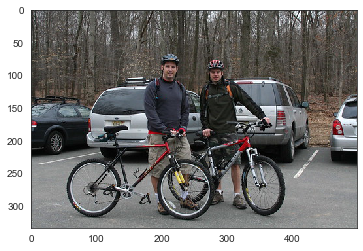

In [11]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.preprocessing import image

img_path = 'Mountain_bike/bike.jpg'
img = mpimg.imread (img_path)
plt.imshow (img)

activatiol_layer = model.get_layer('conv2_13')
 
new_model = Model(inputs=model.input, outputs=activatiol_layer.output)
#get the feature map weights
final_dense = model.get_layer('predictions')
W = final_dense.get_weights()[0]

import scipy as sp

img = image.load_img (img_path, target_size=(224, 224))
x = image.img_to_array (img)
x = np.expand_dims (x, axis=0)
x = preprocess_input (x)

layer_name: conv2_13
PREDICTION: mountain_bike


Text(0.5, 1.0, 'Top 5 Predictions:')

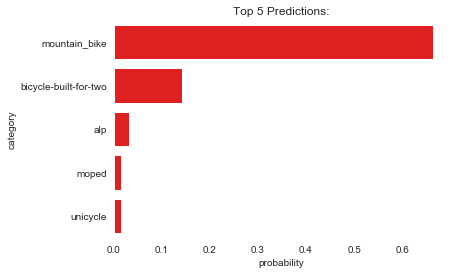

In [12]:
activatiol_layer = model.get_layer('conv2_13')
print('layer_name:', activatiol_layer.name)
filters= activatiol_layer.get_weights()[0]
num_filters_Layer = len (filters[0, 0, 0, :])

new_model = Model(inputs=model.input, outputs=activatiol_layer.output)
preds = model.predict(x)
predictions = pd.DataFrame(decode_predictions(preds, top=5)[0],columns=['col1','category','probability']).iloc[:,1:]
print('PREDICTION:',predictions.loc[0,'category'])
import seaborn as sns
f = sns.barplot(x='probability',y='category',data=predictions,color="red")
sns.set_style(style='white')
f.grid(False)
f.spines["top"].set_visible(False)
f.spines["right"].set_visible(False)
f.spines["bottom"].set_visible(False)
f.spines["left"].set_visible(False)
f.set_title('Top 5 Predictions:')

In [13]:
fmaps = new_model.predict(x)[0] 
preds = model.predict(x)
classnames = decode_predictions(preds)[0]
#print(classnames)
classname = classnames[0][1]

# This cell represents the final step for generating heatmaps by highlighting only activations of the most responsible filters

(-0.5, 498.5, 332.5, -0.5)

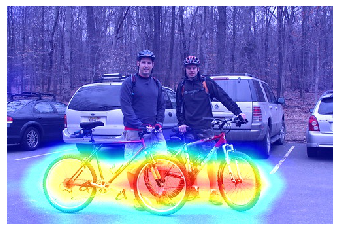

In [15]:
argmax = np.argmax(preds[0])
output = model.output[:, argmax]
grads = K.gradients(output, activatiol_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, activatiol_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# Filters probabilities multiplied by their resposnbilities to compute blame
for i in range(512):
    conv_layer_output_value[:, :, i] *= arryWeights_last_After[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
hif = .8
superimposed_img = heatmap * hif + img
output = 'output.jpeg'
cv2.imwrite(output, superimposed_img)
img=mpimg.imread(output)
plt.imshow(img)
plt.axis('off')